In [1]:
# pip install yfinance
# pip install mplfinance

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
from itertools import product
plt.style.use("seaborn")
pd.set_option('display.float_format', '{:,.5f}'.format)
import seaborn as sns
import tpqoa
from scipy.optimize import brute
from scipy.optimize import minimize
import keras
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
import time
import pickle
import random
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


/var/folders/xz/kv14_q0j6zjd09_t5rsqn1l80000gn/T/ipykernel_31624/3076192993.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
start = "2014-10-01"
end = "2023-06-21"

In [4]:
# downloading data from yahoo finance with start date and end date
# symbol here is the ticker symbol used for trading of stocks, currenct, cryptocurrency and commodities
# in this report I am showing we can download any kind of data from yahoo finance related to trade and work on it
# according to our preferences

#Ticker Symbols:
#BA: Boeing (US Stock) 
#MSFT : Microsoft Corp (US Stock)
#^DJI : Dow Jones Industrial Average (US Stock Index)
#EURUSD=X : Exchange Rate for Currency Pair EUR/USD (Forex)
#GC=F : Gold Price (Precious Metal / Commodity)
#BTC-USD : Bitcoin in USD (Cryptocurrency)
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  6 of 6 completed


Adj Close                                                           \
                  BA      BTC-USD EURUSD=X        GC=F      MSFT         ^DJI   
Date                                                                            
2014-10-01 108.40668    383.61499  1.26283 1,214.59998  39.53995 16,804.71094   
2014-10-02 107.97189    375.07199  1.26242 1,214.19995  39.41934 16,801.05078   
2014-10-03 109.87621    359.51199  1.26706 1,192.19995  39.70362 17,009.68945   
2014-10-04       NaN    328.86600      NaN         NaN       NaN          NaN   
2014-10-05       NaN    320.51001      NaN         NaN       NaN          NaN   
...              ...          ...      ...         ...       ...          ...   
2023-06-16 219.99001 26,327.46289  1.09459 1,958.40002 341.60672 34,299.12109   
2023-06-17       NaN 26,510.67578      NaN         NaN       NaN          NaN   
2023-06-18       NaN 26,336.21289      NaN         NaN       NaN          NaN   
2023-06-19       NaN 26,851.02930  1.09421         NaN       NaN          NaN   
2023-06-20 212.37000 28,327.48828  1.09243 1,935.50000 337.33578 34,053.87109   

               Close                                    ...     Open  \
                  BA      BTC-USD EURUSD=X        GC=F  ... EURUSD=X   
Date                                                    ...            
2014-10-01 124.67000    383.61499  1.26283 1,214.59998  ...  1.26291   
2014-10-02 124.17000    375.07199  1.26242 1,214.19995  ...  1.26250   
2014-10-03 126.36000    359.51199  1.26706 1,192.19995  ...  1.26699   
2014-10-04       NaN    328.86600      NaN         NaN  ...      NaN   
2014-10-05       NaN    320.51001      NaN         NaN  ...      NaN   
...              ...          ...      ...         ...  ...      ...   
2023-06-16 219.99001 26,327.46289  1.09459 1,958.40002  ...  1.09459   
2023-06-17       NaN 26,510.67578      NaN         NaN  ...      NaN   
2023-06-18       NaN 26,336.21289      NaN         NaN  ...      NaN   
2023-06-19       NaN 26,851.02930  1.09421         NaN  ...  1.09421   
2023-06-20 212.37000 28,327.48828  1.09243 1,935.50000  ...  1.09243   

                                                       Volume               \
                  GC=F      MSFT         ^DJI              BA      BTC-USD   
Date                                                                         
2014-10-01 1,207.69995  46.27000 17,040.46094 5,265,200.00000     26229400   
2014-10-02 1,215.30005  45.83000 16,808.26953 3,204,500.00000     21777700   
2014-10-03 1,212.40002  45.98000 16,802.19922 3,075,900.00000     30901200   
2014-10-04         NaN       NaN          NaN             NaN     47236500   
2014-10-05         NaN       NaN          NaN             NaN     83308096   
...                ...       ...          ...             ...          ...   
2023-06-16 1,961.40002 351.32001 34,464.01953 7,799,500.00000  16324646965   
2023-06-17         NaN       NaN          NaN             NaN  11090276850   
2023-06-18         NaN       NaN          NaN             NaN   9565695129   
2023-06-19         NaN       NaN          NaN             NaN  12826986222   
2023-06-20 1,958.59998 339.31000 34,206.66016 8,226,400.00000  22211859147   

                                                                  
           EURUSD=X      GC=F             MSFT              ^DJI  
Date                                                              
2014-10-01  0.00000 178.00000 38,088,400.00000 104,240,000.00000  
2014-10-02  0.00000 176.00000 25,119,400.00000  75,490,000.00000  
2014-10-03  0.00000 499.00000 32,453,200.00000  87,940,000.00000  
2014-10-04      NaN       NaN              NaN               NaN  
2014-10-05      NaN       NaN              NaN               NaN  
...             ...       ...              ...               ...  
2023-06-16  0.00000 119.00000 46,533,600.00000 595,230,000.00000  
2023-06-17      NaN       NaN              NaN               NaN  
2023-06-18      NaN       NaN        

### Inital EDA

In [5]:
# to check the general data type of each coloumn, how many non-null values are there and how many columns are
# there in total
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3185 entries, 2014-10-01 to 2023-06-20
Freq: D
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        2194 non-null   float64
 1   (Adj Close, BTC-USD)   3185 non-null   float64
 2   (Adj Close, EURUSD=X)  2272 non-null   float64
 3   (Adj Close, GC=F)      2191 non-null   float64
 4   (Adj Close, MSFT)      2194 non-null   float64
 5   (Adj Close, ^DJI)      2194 non-null   float64
 6   (Close, BA)            2194 non-null   float64
 7   (Close, BTC-USD)       3185 non-null   float64
 8   (Close, EURUSD=X)      2272 non-null   float64
 9   (Close, GC=F)          2191 non-null   float64
 10  (Close, MSFT)          2194 non-null   float64
 11  (Close, ^DJI)          2194 non-null   float64
 12  (High, BA)             2194 non-null   float64
 13  (High, BTC-USD)        3185 non-null   float64
 14  (High, EURUSD=X)       2272 no

In [6]:
# exporting the data into csv file
df.to_csv("multi-assets.csv")

In [7]:
pd.options.display.float_format = '{:.4f}'.format

In [8]:
df = pd.read_csv("multi-assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

Adj Close                                                    \
                  BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                     
2014-10-01  108.4067   383.6150   1.2628 1214.6000  39.5399 16804.7109   
2014-10-02  107.9719   375.0720   1.2624 1214.2000  39.4193 16801.0508   
2014-10-03  109.8762   359.5120   1.2671 1192.2000  39.7036 17009.6895   
2014-10-04       NaN   328.8660      NaN       NaN      NaN        NaN   
2014-10-05       NaN   320.5100      NaN       NaN      NaN        NaN   
...              ...        ...      ...       ...      ...        ...   
2023-06-16  219.9900 26327.4629   1.0946 1958.4000 341.6067 34299.1211   
2023-06-17       NaN 26510.6758      NaN       NaN      NaN        NaN   
2023-06-18       NaN 26336.2129      NaN       NaN      NaN        NaN   
2023-06-19       NaN 26851.0293   1.0942       NaN      NaN        NaN   
2023-06-20  212.3700 28327.4883   1.0924 1935.5000 337.3358 34053.8711   

              Close                                ...     Open            \
                 BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-10-01 124.6700   383.6150   1.2628 1214.6000  ...   1.2629 1207.7000   
2014-10-02 124.1700   375.0720   1.2624 1214.2000  ...   1.2625 1215.3000   
2014-10-03 126.3600   359.5120   1.2671 1192.2000  ...   1.2670 1212.4000   
2014-10-04      NaN   328.8660      NaN       NaN  ...      NaN       NaN   
2014-10-05      NaN   320.5100      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2023-06-16 219.9900 26327.4629   1.0946 1958.4000  ...   1.0946 1961.4000   
2023-06-17      NaN 26510.6758      NaN       NaN  ...      NaN       NaN   
2023-06-18      NaN 26336.2129      NaN       NaN  ...      NaN       NaN   
2023-06-19      NaN 26851.0293   1.0942       NaN  ...   1.0942       NaN   
2023-06-20 212.3700 28327.4883   1.0924 1935.5000  ...   1.0924 1958.6000   

                                     Volume                                 \
               MSFT       ^DJI           BA      BTC-USD EURUSD=X     GC=F   
Date                                                                         
2014-10-01  46.2700 17040.4609 5265200.0000     26229400   0.0000 178.0000   
2014-10-02  45.8300 16808.2695 3204500.0000     21777700   0.0000 176.0000   
2014-10-03  45.9800 16802.1992 3075900.0000     30901200   0.0000 499.0000   
2014-10-04      NaN        NaN          NaN     47236500      NaN      NaN   
2014-10-05      NaN        NaN          NaN     83308096      NaN      NaN   
...             ...        ...          ...          ...      ...      ...   
2023-06-16 351.3200 34464.0195 7799500.0000  16324646965   0.0000 119.0000   
2023-06-17      NaN        NaN          NaN  11090276850      NaN      NaN   
2023-06-18      NaN        NaN          NaN   9565695129      NaN      NaN   
2023-06-19      NaN        NaN          NaN  12826986222   0.0000      NaN   
2023-06-20 339.3100 34206.6602 8226400.0000  22211859147   0.0000 193.0000   

                                         
                    MSFT           ^DJI  
Date                                     
2014-10-01 38088400.0000 104240000.0000  
2014-10-02 25119400.0000  75490000.0000  
2014-10-03 32453200.0000  87940000.0000  
2014-10-04           NaN            NaN  
2014-10-05           NaN            NaN  
...                  ...            ...  
2023-06-16 46533600.0000 595230000.0000  
2023-06-17           NaN            NaN  
2023-06-18           NaN            NaN  
2023-06-19           NaN            NaN  
2023-06-20 26375400.0000 334810000.0000  

[3185 rows x 36 columns]

In [9]:
close = df.Close.copy()

In [10]:
close

BA    BTC-USD  EURUSD=X      GC=F     MSFT       ^DJI
Date                                                                  
2014-10-01 124.6700   383.6150    1.2628 1214.6000  45.9000 16804.7109
2014-10-02 124.1700   375.0720    1.2624 1214.2000  45.7600 16801.0508
2014-10-03 126.3600   359.5120    1.2671 1192.2000  46.0900 17009.6895
2014-10-04      NaN   328.8660       NaN       NaN      NaN        NaN
2014-10-05      NaN   320.5100       NaN       NaN      NaN        NaN
...             ...        ...       ...       ...      ...        ...
2023-06-16 219.9900 26327.4629    1.0946 1958.4000 342.3300 34299.1211
2023-06-17      NaN 26510.6758       NaN       NaN      NaN        NaN
2023-06-18      NaN 26336.2129       NaN       NaN      NaN        NaN
2023-06-19      NaN 26851.0293    1.0942       NaN      NaN        NaN
2023-06-20 212.3700 28327.4883    1.0924 1935.5000 338.0500 34053.8711

[3185 rows x 6 columns]

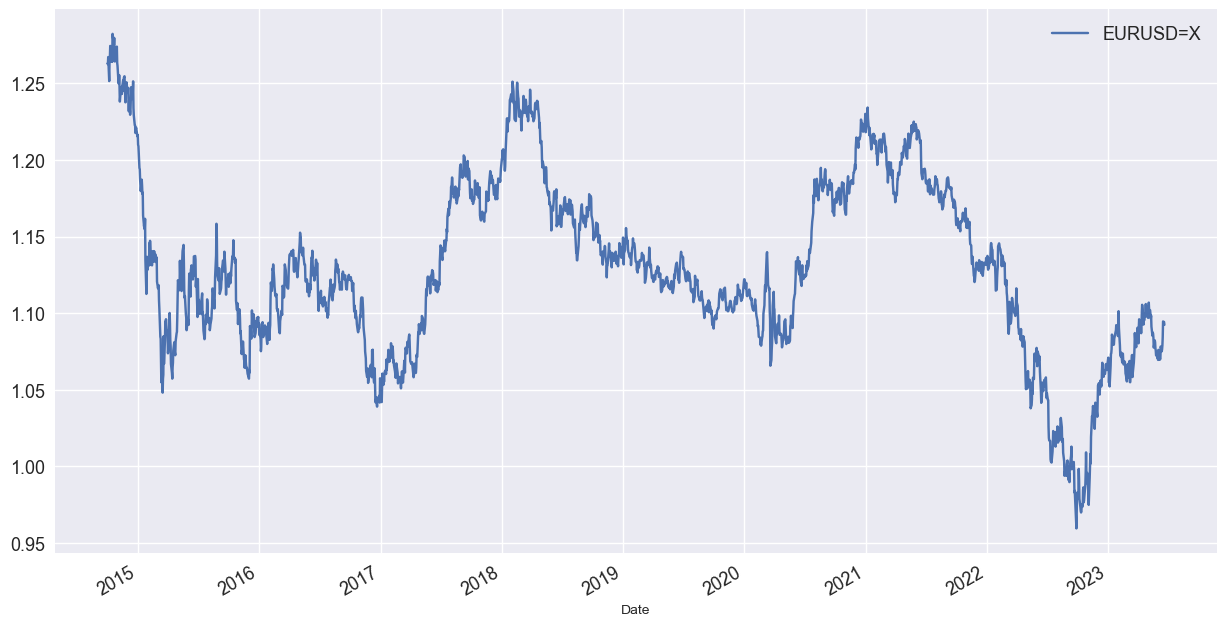

In [11]:
# visualisation of close data of EUR to USD for the given time frame.
close["EURUSD=X"].dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

#### Data Cleaning

In [12]:
all_days = pd.date_range(start = "2014-10-01", end = "2023-06-21", freq = "D")

In [13]:
close = close.reindex(all_days)

In [14]:
close.head()

BA  BTC-USD  EURUSD=X      GC=F    MSFT       ^DJI
2014-10-01 124.6700 383.6150    1.2628 1214.6000 45.9000 16804.7109
2014-10-02 124.1700 375.0720    1.2624 1214.2000 45.7600 16801.0508
2014-10-03 126.3600 359.5120    1.2671 1192.2000 46.0900 17009.6895
2014-10-04      NaN 328.8660       NaN       NaN     NaN        NaN
2014-10-05      NaN 320.5100       NaN       NaN     NaN        NaN

In [15]:
# add weekday in the data to check why we have missing value
close['Day'] = close.index.strftime('%A')

In [16]:
close.head()

BA  BTC-USD  EURUSD=X      GC=F    MSFT       ^DJI        Day
2014-10-01 124.6700 383.6150    1.2628 1214.6000 45.9000 16804.7109  Wednesday
2014-10-02 124.1700 375.0720    1.2624 1214.2000 45.7600 16801.0508   Thursday
2014-10-03 126.3600 359.5120    1.2671 1192.2000 46.0900 17009.6895     Friday
2014-10-04      NaN 328.8660       NaN       NaN     NaN        NaN   Saturday
2014-10-05      NaN 320.5100       NaN       NaN     NaN        NaN     Sunday

In [17]:
# add quarter in the data
close["Quarter"] = close.index.quarter
close.head()

BA  BTC-USD  EURUSD=X      GC=F    MSFT       ^DJI  \
2014-10-01 124.6700 383.6150    1.2628 1214.6000 45.9000 16804.7109   
2014-10-02 124.1700 375.0720    1.2624 1214.2000 45.7600 16801.0508   
2014-10-03 126.3600 359.5120    1.2671 1192.2000 46.0900 17009.6895   
2014-10-04      NaN 328.8660       NaN       NaN     NaN        NaN   
2014-10-05      NaN 320.5100       NaN       NaN     NaN        NaN   

                  Day  Quarter  
2014-10-01  Wednesday        4  
2014-10-02   Thursday        4  
2014-10-03     Friday        4  
2014-10-04   Saturday        4  
2014-10-05     Sunday        4

In [18]:
# converting timezone into worldwide used timeone that is the UTC timezone with localize method so that the
# timezone is converted to the timezone of your system timezone but in UTC
close.tz_localize("UTC")

BA    BTC-USD  EURUSD=X      GC=F     MSFT  \
2014-10-01 00:00:00+00:00 124.6700   383.6150    1.2628 1214.6000  45.9000   
2014-10-02 00:00:00+00:00 124.1700   375.0720    1.2624 1214.2000  45.7600   
2014-10-03 00:00:00+00:00 126.3600   359.5120    1.2671 1192.2000  46.0900   
2014-10-04 00:00:00+00:00      NaN   328.8660       NaN       NaN      NaN   
2014-10-05 00:00:00+00:00      NaN   320.5100       NaN       NaN      NaN   
...                            ...        ...       ...       ...      ...   
2023-06-17 00:00:00+00:00      NaN 26510.6758       NaN       NaN      NaN   
2023-06-18 00:00:00+00:00      NaN 26336.2129       NaN       NaN      NaN   
2023-06-19 00:00:00+00:00      NaN 26851.0293    1.0942       NaN      NaN   
2023-06-20 00:00:00+00:00 212.3700 28327.4883    1.0924 1935.5000 338.0500   
2023-06-21 00:00:00+00:00      NaN        NaN       NaN       NaN      NaN   

                                ^DJI        Day  Quarter  
2014-10-01 00:00:00+00:00 16804.7109  Wednesday        4  
2014-10-02 00:00:00+00:00 16801.0508   Thursday        4  
2014-10-03 00:00:00+00:00 17009.6895     Friday        4  
2014-10-04 00:00:00+00:00        NaN   Saturday        4  
2014-10-05 00:00:00+00:00        NaN     Sunday        4  
...                              ...        ...      ...  
2023-06-17 00:00:00+00:00        NaN   Saturday        2  
2023-06-18 00:00:00+00:00        NaN     Sunday        2  
2023-06-19 00:00:00+00:00        NaN     Monday        2  
2023-06-20 00:00:00+00:00 34053.8711    Tuesday        2  
2023-06-21 00:00:00+00:00        NaN  Wednesday        2  

[3186 rows x 8 columns]

In [19]:
# replacing the missing value with interpolate method where missing value is replaced on the basis of
# surrounding data points, wwe have used linear interpolation as we are assuming we have linear relationship
# between known data points. However, it's important to note that interpolation assumes a 
# certain level of continuity in the data, which may not always be the case in forex data that can have 
#sudden gaps or outliers.

close.interpolate()

BA    BTC-USD  EURUSD=X      GC=F     MSFT       ^DJI  \
2014-10-01 124.6700   383.6150    1.2628 1214.6000  45.9000 16804.7109   
2014-10-02 124.1700   375.0720    1.2624 1214.2000  45.7600 16801.0508   
2014-10-03 126.3600   359.5120    1.2671 1192.2000  46.0900 17009.6895   
2014-10-04 126.3267   328.8660    1.2618 1197.0333  46.0900 17003.7630   
2014-10-05 126.2933   320.5100    1.2566 1201.8666  46.0900 16997.8366   
...             ...        ...       ...       ...      ...        ...   
2023-06-17 218.0850 26510.6758    1.0945 1952.6750 341.2600 34237.8086   
2023-06-18 216.1800 26336.2129    1.0943 1946.9500 340.1900 34176.4961   
2023-06-19 214.2750 26851.0293    1.0942 1941.2250 339.1200 34115.1836   
2023-06-20 212.3700 28327.4883    1.0924 1935.5000 338.0500 34053.8711   
2023-06-21 212.3700 28327.4883    1.0924 1935.5000 338.0500 34053.8711   

                  Day  Quarter  
2014-10-01  Wednesday        4  
2014-10-02   Thursday        4  
2014-10-03     Friday        4  
2014-10-04   Saturday        4  
2014-10-05     Sunday        4  
...               ...      ...  
2023-06-17   Saturday        2  
2023-06-18     Sunday        2  
2023-06-19     Monday        2  
2023-06-20    Tuesday        2  
2023-06-21  Wednesday        2  

[3186 rows x 8 columns]

#### Commands to install Oanda Packages in python

In [20]:
 # conda install ujson

In [21]:
# pip install v20

In [22]:
# pip install --index-url https://test.pypi.org/simple/ tpqoa

#### Connecting to Oanda API

In [23]:
api = tpqoa.tpqoa("oanda.cfg")

In [24]:
api.get_account_summary()

{'id': '101-004-26161627-001',
 'alias': 'Primary',
 'currency': 'GBP',
 'balance': '102651.3893',
 'createdByUserID': 26161627,
 'createdTime': '2023-06-26T02:38:35.030869583Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '2564.1528',
 'resettablePL': '2564.1528',
 'resettablePLTime': '0',
 'financing': '87.2365',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.03333333333333',
 'openTradeCount': 5,
 'openPositionCount': 1,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '1255.8804',
 'NAV': '103907.2697',
 'marginUsed': '14225.3333',
 'marginAvailable': '89688.1531',
 'positionValue': '426760.0',
 'marginCloseoutUnrealizedPL': '1283.3847',
 'marginCloseoutNAV': '103934.774',
 'marginCloseoutMarginUsed': '14225.3333',
 'marginCloseoutPercent': '0.06843',
 'marginCloseoutPositionValue': '426760.0',
 'withdrawalLimit': '89688.1531',
 'marginCallMarginUsed': '14225.3333',
 'marginCallPercent': '0.13687',
 'lastTransactionID': '369'}

In [25]:
api.get_instruments()

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('Australia 200', 'AU200_AUD'),
 ('Brent Crude Oil', 'BCO_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY'),
 ('CAD/SGD', 'CAD_SGD'),
 ('CHF/HKD', 'CHF_HKD'),
 ('CHF/JPY', 'CHF_JPY'),
 ('CHF/ZAR', 'CHF_ZAR'),
 ('China A50', 'CN50_USD'),
 ('China H Shares', 'CHINAH_HKD'),
 ('Copper', 'XCU_USD'),
 ('Corn', 'CORN_USD'),
 ('EUR/AUD', 'EUR_AUD'),
 ('EUR/CAD', 'EUR_CAD'),
 ('EUR/CHF', 'EUR_CHF'),
 ('EUR/CZK', 'EUR_CZK'),
 ('EUR/DKK', 'EUR_DKK'),
 ('EUR/GBP', 'EUR_GBP'),
 ('EUR/HKD', 'EUR_HKD'),
 ('EUR/HUF', 'EUR_HUF'),
 ('EUR/JPY', 'EUR_JPY'),
 ('EUR/NOK', 'EUR_NOK'),
 ('EUR/NZD', 'EUR_NZD'),
 ('EUR/PLN', 'EUR_PLN'),
 ('EUR/SEK', 'EUR_SEK'),
 ('EUR/SGD', 'EUR_SGD'),
 ('EUR/TRY', 'EUR_TRY'),
 ('EUR/USD', 'EUR_USD'),
 ('EUR/ZAR', 'EUR_ZAR'),
 ('Europe 50', 'EU50_EUR

In [26]:
instrument = api.get_instruments()

In [27]:
len(instrument)

124

#### Getting historical data from Oanda API

In [28]:
api.get_history(instrument = "EUR_USD", start = "2020-07-01", end = "2020-07-31",
                granularity = "D", price = "B")

df = api.get_history(instrument = "EUR_USD", start = "2020-07-01", end = "2020-07-31",
                granularity = "D", price = "B")

df.info()

api.get_history(instrument = "EUR_USD", start = "2020-07-01", end = "2020-07-01",
                granularity = "D", price = "A")

api.get_history(instrument = "EUR_USD", start = "2020-07-01", end = "2020-07-01",
                granularity = "D", price = "B")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-06-30 21:00:00 to 2020-07-30 21:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         23 non-null     float64
 1   h         23 non-null     float64
 2   l         23 non-null     float64
 3   c         23 non-null     float64
 4   volume    23 non-null     int64  
 5   complete  23 non-null     bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 1.1 KB


o      h      l      c  volume  complete
time                                                             
2020-06-30 21:00:00 1.1229 1.1274 1.1184 1.1250   90252      True

In [29]:
help(api.get_history)

Help on method get_history in module tpqoa.tpqoa:

get_history(instrument, start, end, granularity, price, localize=True) method of tpqoa.tpqoa.tpqoa instance
    Retrieves historical data for instrument.
    
    Parameters
    instrument: string
        valid instrument name
    start, end: datetime, str
        Python datetime or string objects for start and end
    granularity: string
        a string like 'S5', 'M1' or 'D'
    price: string
        one of 'A' (ask), 'B' (bid) or 'M' (middle)
    
    Returns
    data: pd.DataFrame
        pandas DataFrame object with data



In [30]:
api.get_history(instrument = "EUR_USD", start = "2020-07-01", end = "2023-07-17",
                granularity = "D", price = "B")

o      h      l      c  volume  complete
time                                                             
2020-06-30 21:00:00 1.1229 1.1274 1.1184 1.1250   90252      True
2020-07-01 21:00:00 1.1250 1.1302 1.1219 1.1238   90789      True
2020-07-02 21:00:00 1.1238 1.1249 1.1219 1.1243   59036      True
2020-07-05 21:00:00 1.1242 1.1345 1.1239 1.1308   81756      True
2020-07-06 21:00:00 1.1307 1.1332 1.1258 1.1273   92426      True
...                    ...    ...    ...    ...     ...       ...
2023-07-10 21:00:00 1.1000 1.1027 1.0976 1.1008   69116      True
2023-07-11 21:00:00 1.1000 1.1140 1.0998 1.1131   90474      True
2023-07-12 21:00:00 1.1128 1.1227 1.1126 1.1225   88719      True
2023-07-13 21:00:00 1.1210 1.1244 1.1203 1.1224   88321      True
2023-07-16 21:00:00 1.1233 1.1248 1.1202 1.1239   76645      True

[791 rows x 6 columns]

In [31]:
api.stream_data("EUR_USD", stop=15)

2023-08-20T23:40:07.614801711Z 1.0873 1.08741
2023-08-20T23:40:08.369752600Z 1.08728 1.08738
2023-08-20T23:40:13.913822819Z 1.08728 1.08739
2023-08-20T23:41:07.072352157Z 1.08724 1.08735
2023-08-20T23:41:13.540976738Z 1.08723 1.08735
2023-08-20T23:41:50.416386092Z 1.08724 1.08735
2023-08-20T23:42:48.854023257Z 1.08719 1.08731
2023-08-20T23:42:50.838716210Z 1.08718 1.08731
2023-08-20T23:42:51.358863304Z 1.08716 1.08727
2023-08-20T23:42:51.628712817Z 1.08717 1.08727
2023-08-20T23:42:54.132600958Z 1.08716 1.08727
2023-08-20T23:42:54.442525538Z 1.08717 1.08727
2023-08-20T23:42:55.201708692Z 1.08714 1.08724
2023-08-20T23:43:02.310336407Z 1.08714 1.08725
2023-08-20T23:43:02.659948116Z 1.08711 1.08723


In [32]:
# api.stop_stream()

In [33]:
# creating a demo order

api.create_order(instrument="EUR_USD", units=100000, sl_distance=0.1)



 {'id': '371', 'time': '2023-08-20T23:43:03.070418816Z', 'userID': 26161627, 'accountID': '101-004-26161627-001', 'batchID': '370', 'requestID': '79156768062646901', 'type': 'ORDER_FILL', 'orderID': '370', 'instrument': 'EUR_USD', 'units': '100000.0', 'gainQuoteHomeConversionFactor': '0.781154935157', 'lossQuoteHomeConversionFactor': '0.789005738525', 'price': 1.08723, 'fullVWAP': 1.08723, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.08711, 'liquidity': '1000000'}, {'price': 1.0871, 'liquidity': '2000000'}, {'price': 1.08709, 'liquidity': '2000000'}, {'price': 1.08707, 'liquidity': '5000000'}], 'asks': [{'price': 1.08723, 'liquidity': '1000000'}, {'price': 1.08725, 'liquidity': '2000000'}, {'price': 1.08726, 'liquidity': '2000000'}, {'price': 1.08727, 'liquidity': '5000000'}], 'closeoutBid': 1.08707, 'closeoutAsk': 1.08727}, 'reason': 'MARKET_ORDER', 'pl': '266.3738', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '102917.7631', 'tr

In [34]:
# stoping a demo order

api.create_order(instrument="EUR_USD", units=-100000, sl_distance=0.1)



 {'id': '373', 'time': '2023-08-20T23:43:03.212797145Z', 'userID': 26161627, 'accountID': '101-004-26161627-001', 'batchID': '372', 'requestID': '79156768062647009', 'type': 'ORDER_FILL', 'orderID': '372', 'instrument': 'EUR_USD', 'units': '-100000.0', 'gainQuoteHomeConversionFactor': '0.781154935157', 'lossQuoteHomeConversionFactor': '0.789005738525', 'price': 1.08711, 'fullVWAP': 1.08711, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.08711, 'liquidity': '1000000'}, {'price': 1.0871, 'liquidity': '2000000'}, {'price': 1.08709, 'liquidity': '2000000'}, {'price': 1.08707, 'liquidity': '5000000'}], 'asks': [{'price': 1.08723, 'liquidity': '900000'}, {'price': 1.08725, 'liquidity': '2000000'}, {'price': 1.08726, 'liquidity': '2000000'}, {'price': 1.08727, 'liquidity': '5000000'}], 'closeoutBid': 1.08707, 'closeoutAsk': 1.08727}, 'reason': 'MARKET_ORDER', 'pl': '0.0', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '102917.7631', 'tradeOp

## Trading Strategies with historical data

In [35]:
symbol = ["EURUSD=X"]
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  1 of 1 completed


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2014-10-01 1.2629 1.2640 1.2586 1.2628     1.2628       0
2014-10-02 1.2625 1.2691 1.2616 1.2624     1.2624       0
2014-10-03 1.2670 1.2670 1.2502 1.2671     1.2671       0
2014-10-06 1.2515 1.2593 1.2515 1.2514     1.2514       0
2014-10-07 1.2644 1.2664 1.2585 1.2646     1.2646       0
...           ...    ...    ...    ...        ...     ...
2023-06-14 1.0789 1.0858 1.0776 1.0789     1.0789       0
2023-06-15 1.0843 1.0939 1.0804 1.0843     1.0843       0
2023-06-16 1.0946 1.0971 1.0920 1.0946     1.0946       0
2023-06-19 1.0942 1.0949 1.0911 1.0942     1.0942       0
2023-06-20 1.0924 1.0945 1.0895 1.0924     1.0924       0

[2272 rows x 6 columns]

In [36]:
df.to_csv("EURUSD.csv")

### SMA Crossover Strategy

In [37]:
data = pd.read_csv("EURUSD.csv",parse_dates=["Date"], index_col="Date")

In [38]:
data

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2014-10-01 1.2629 1.2640 1.2586 1.2628     1.2628       0
2014-10-02 1.2625 1.2691 1.2616 1.2624     1.2624       0
2014-10-03 1.2670 1.2670 1.2502 1.2671     1.2671       0
2014-10-06 1.2515 1.2593 1.2515 1.2514     1.2514       0
2014-10-07 1.2644 1.2664 1.2585 1.2646     1.2646       0
...           ...    ...    ...    ...        ...     ...
2023-06-14 1.0789 1.0858 1.0776 1.0789     1.0789       0
2023-06-15 1.0843 1.0939 1.0804 1.0843     1.0843       0
2023-06-16 1.0946 1.0971 1.0920 1.0946     1.0946       0
2023-06-19 1.0942 1.0949 1.0911 1.0942     1.0942       0
2023-06-20 1.0924 1.0945 1.0895 1.0924     1.0924       0

[2272 rows x 6 columns]

In [39]:
# pip install mplfinance

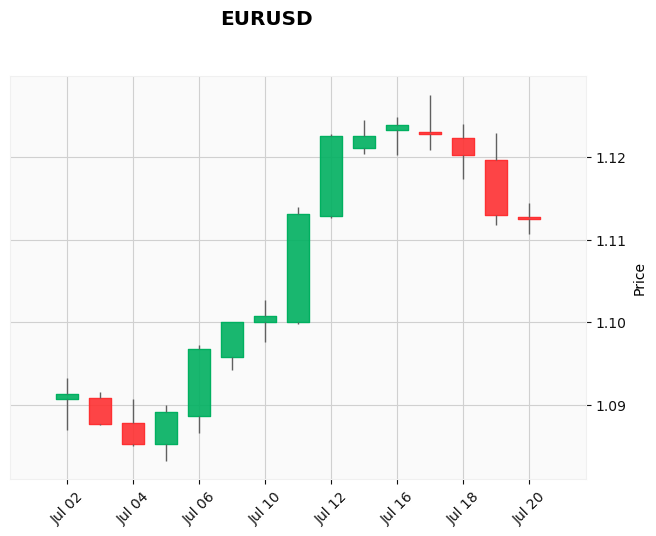

In [40]:
# Loading data for last 21 days to show the candlestick plot as still plot cannot handle hughe amount of data.
# Load the data into a DataFrame
df = api.get_history(instrument = "EUR_USD", start = "2023-07-01", end = "2023-07-21",
                granularity = "D", price = "B")
df.to_csv("eurusd.csv")
temp_data = pd.read_csv("eurusd.csv", parse_dates=['time'], index_col="time")

# Remove 'Volume' and 'Adj Close' as they're not needed for the plot
temp_data = temp_data.drop(['volume','complete'], axis=1)

# Rename columns to match the names required by mplfinance
temp_data = temp_data.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'time':'Date'})

# Create the candlestick chart
mpf.plot(temp_data, type='candle', style='yahoo', title='EURUSD', mav=(50,200), volume=False)

##### getting the data from Oanda to develop SMA strategy which need date and mid price

In [41]:
df1 = api.get_history(instrument = "EUR_USD", start = "2010-01-02", end = "2023-07-21",
                granularity = "D", price = "B")

In [42]:
df1.to_csv('eurusd_bid.csv')

In [43]:
df2 = api.get_history(instrument = "EUR_USD", start = "2010-01-02", end = "2023-07-21",
                granularity = "D", price = "A")

In [44]:
df2.to_csv('eurusd_ask.csv')

In [45]:
df1 = pd.read_csv("eurusd_bid.csv",parse_dates=["time"], index_col="time")

In [46]:
df2 = pd.read_csv("eurusd_bid.csv",parse_dates=["time"], index_col="time")

In [47]:
final_data = pd.DataFrame()
final_data['time'] = df1.index
mid_price = (df1['c']+df2['c'])/2
final_data['Price'] = mid_price.reset_index(drop=True)

In [48]:
final_data = final_data.rename(columns={'time':'Date'})
final_data

Date  Price
0    2010-01-02 22:00:00 1.4302
1    2010-01-03 22:00:00 1.4412
2    2010-01-04 22:00:00 1.4364
3    2010-01-05 22:00:00 1.4407
4    2010-01-06 22:00:00 1.4307
...                  ...    ...
3804 2023-07-16 21:00:00 1.1239
3805 2023-07-17 21:00:00 1.1227
3806 2023-07-18 21:00:00 1.1202
3807 2023-07-19 21:00:00 1.1129
3808 2023-07-20 21:00:00 1.1125

[3809 rows x 2 columns]

In [49]:
final_data['Date'] = pd.to_datetime(final_data['Date'])
final_data['Date'] = final_data['Date'].dt.date
final_data.to_csv("final_eurusd.csv")

#### SMA Strategy

In [50]:
data = pd.read_csv("final_eurusd.csv", parse_dates=['Date'], index_col="Date")
sma_s = 50
sma_l = 200
data = data.drop(['Unnamed: 0'], axis=1)

In [51]:
data
data.Price.rolling(50).mean()

Date
2010-01-02      NaN
2010-01-03      NaN
2010-01-04      NaN
2010-01-05      NaN
2010-01-06      NaN
              ...  
2023-07-16   1.0873
2023-07-17   1.0879
2023-07-18   1.0883
2023-07-19   1.0887
2023-07-20   1.0893
Name: Price, Length: 3809, dtype: float64

In [52]:
data['SMA_S'] = data.Price.rolling(sma_s).mean()
data['SMA_L'] = data.Price.rolling(sma_l).mean()

In [53]:
data

Price  SMA_S  SMA_L
Date                           
2010-01-02 1.4302    NaN    NaN
2010-01-03 1.4412    NaN    NaN
2010-01-04 1.4364    NaN    NaN
2010-01-05 1.4407    NaN    NaN
2010-01-06 1.4307    NaN    NaN
...           ...    ...    ...
2023-07-16 1.1239 1.0873 1.0655
2023-07-17 1.1227 1.0879 1.0662
2023-07-18 1.1202 1.0883 1.0670
2023-07-19 1.1129 1.0887 1.0677
2023-07-20 1.1125 1.0893 1.0684

[3809 rows x 3 columns]

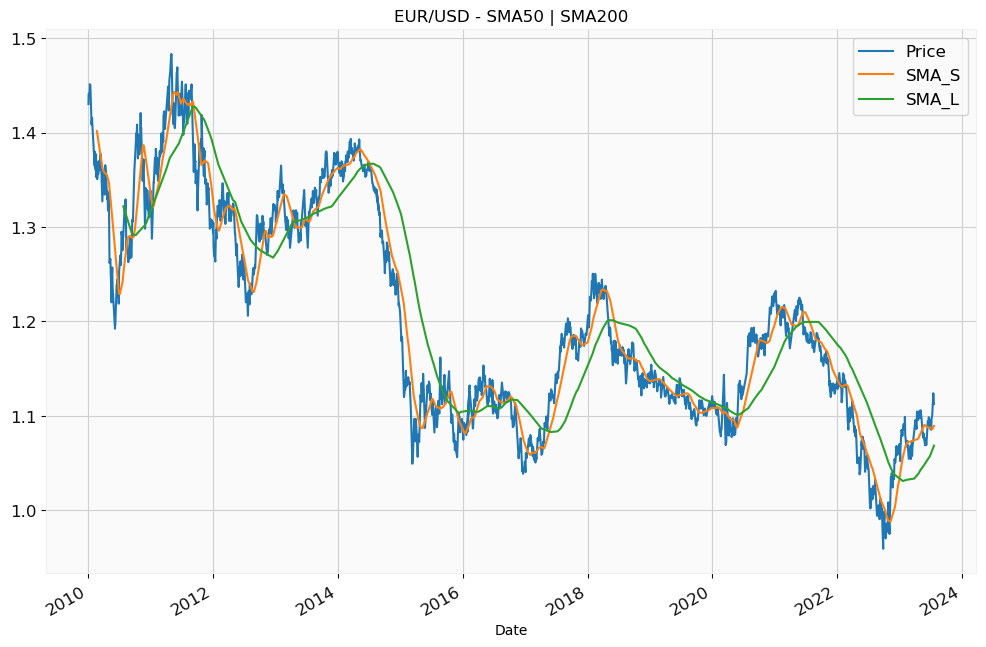

In [54]:
data.plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [55]:
data.dropna(inplace = True)

In [56]:
data

Price  SMA_S  SMA_L
Date                           
2010-07-25 1.2994 1.2486 1.3218
2010-07-26 1.2995 1.2507 1.3211
2010-07-27 1.2993 1.2528 1.3204
2010-07-28 1.3078 1.2551 1.3197
2010-07-29 1.3046 1.2573 1.3191
...           ...    ...    ...
2023-07-16 1.1239 1.0873 1.0655
2023-07-17 1.1227 1.0879 1.0662
2023-07-18 1.1202 1.0883 1.0670
2023-07-19 1.1129 1.0887 1.0677
2023-07-20 1.1125 1.0893 1.0684

[3610 rows x 3 columns]

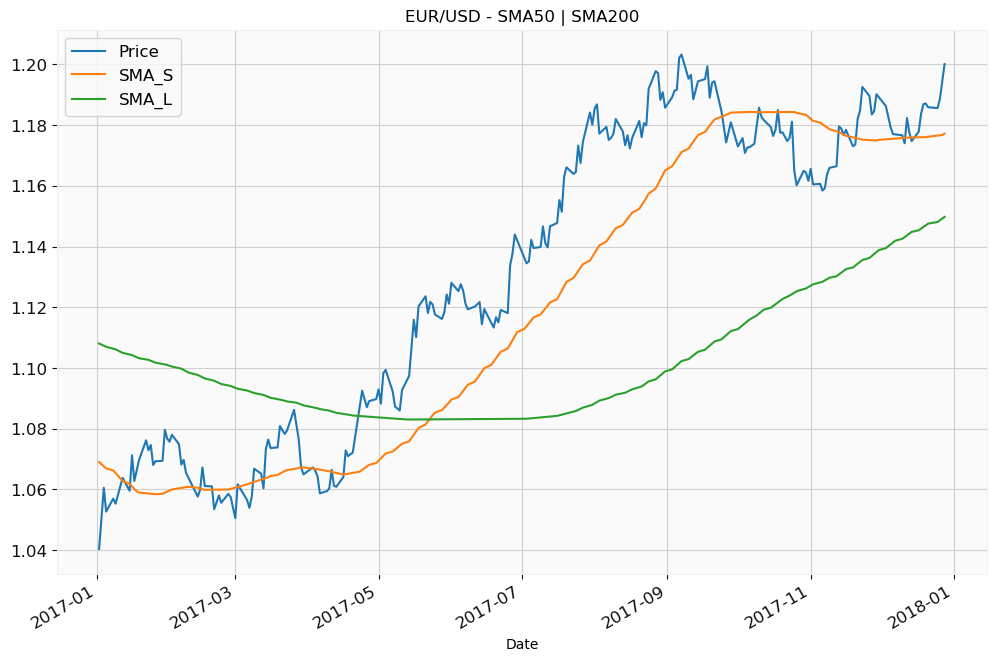

In [57]:
data.loc['2017'].plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [58]:
data['position'] = np.where(data["SMA_S"] > data["SMA_L"],1,-1)

In [59]:
data

Price  SMA_S  SMA_L  position
Date                                     
2010-07-25 1.2994 1.2486 1.3218        -1
2010-07-26 1.2995 1.2507 1.3211        -1
2010-07-27 1.2993 1.2528 1.3204        -1
2010-07-28 1.3078 1.2551 1.3197        -1
2010-07-29 1.3046 1.2573 1.3191        -1
...           ...    ...    ...       ...
2023-07-16 1.1239 1.0873 1.0655         1
2023-07-17 1.1227 1.0879 1.0662         1
2023-07-18 1.1202 1.0883 1.0670         1
2023-07-19 1.1129 1.0887 1.0677         1
2023-07-20 1.1125 1.0893 1.0684         1

[3610 rows x 4 columns]

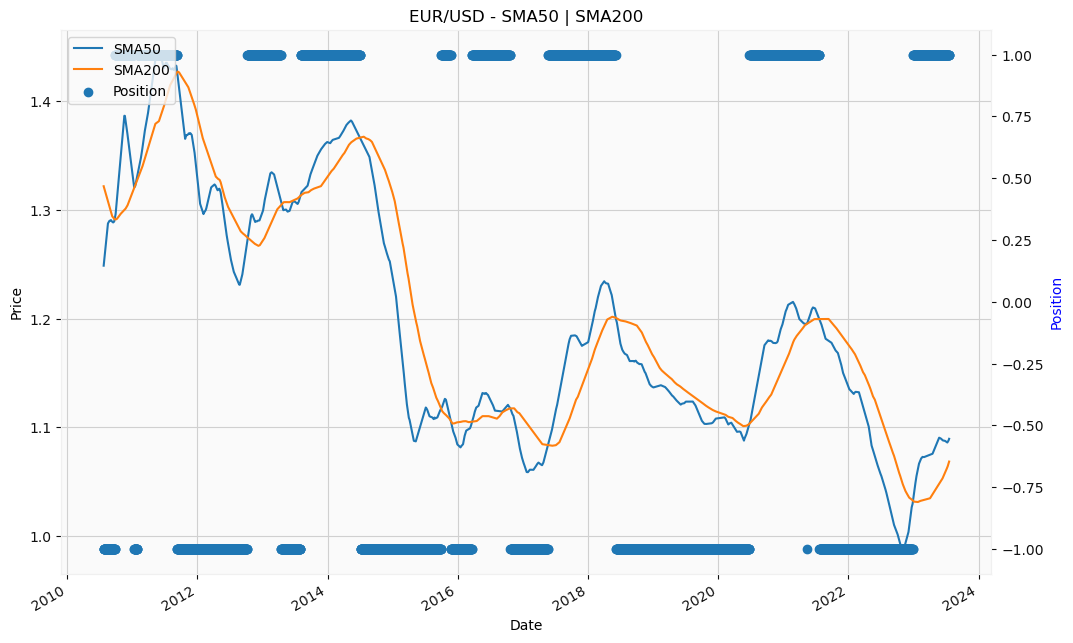

In [60]:
# Create the position plot with separate line and SMA lines
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_title("EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)

# Plot SMA lines as lines
data['SMA_S'].plot(ax=ax1, label='SMA{}'.format(sma_s))
data['SMA_L'].plot(ax=ax1, label='SMA{}'.format(sma_l))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot positions as a separate line on the secondary y-axis
ax2.scatter(data.index, data['position'], marker='o', label='Position')

ax2.set_ylabel('Position')
ax2.yaxis.label.set_color('blue')  # set the color of the position axis label


ax2.grid(False)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


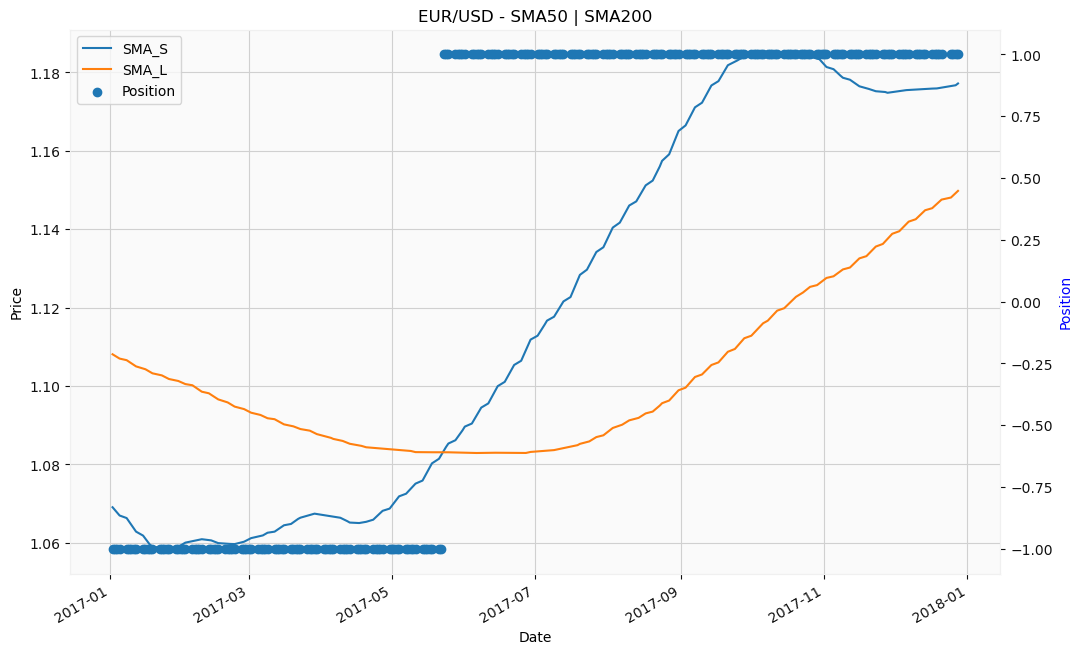

In [61]:
# Filter to 2017 data
data2017 = data.loc["2017",["SMA_S","SMA_L", "position"]]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12,8)) 

# Plot SMA lines
data2017['SMA_S'].plot(ax=ax1, label='SMA_S')  
data2017['SMA_L'].plot(ax=ax1, label='SMA_L')

# Twin axis for position
ax2 = ax1.twinx()    

# Plot positions  
ax2.scatter(data2017.index, data2017['position'], marker='o', label='Position')

# Format plots  
ax1.set_title("EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('Position')
ax2.yaxis.label.set_color('blue')

# Remove grid and legend
ax2.grid(False)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='upper left')

plt.show()

#### Optimizing the Strategy

In [62]:
plt.style.use('seaborn')

df = pd.read_csv("final_eurusd.csv", parse_dates=['Date'], index_col="Date")
df

/var/folders/xz/kv14_q0j6zjd09_t5rsqn1l80000gn/T/ipykernel_31624/3480793216.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Unnamed: 0  Price
Date                         
2010-01-02           0 1.4302
2010-01-03           1 1.4412
2010-01-04           2 1.4364
2010-01-05           3 1.4407
2010-01-06           4 1.4307
...                ...    ...
2023-07-16        3804 1.1239
2023-07-17        3805 1.1227
2023-07-18        3806 1.1202
2023-07-19        3807 1.1129
2023-07-20        3808 1.1125

[3809 rows x 2 columns]

In [63]:
class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end, tc, filename):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        start: str
            start date for data import
        end: str
            end date for data import
        '''
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        self.prepare_data()
        self.tc=tc
        self.filename = filename
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from forex_pairs.csv (source can be changed).
        '''
        raw = pd.read_csv(filename, parse_dates = ["Date"], index_col = "Date")
        raw = raw.drop(['Unnamed: 0'], axis=1)
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        '''Prepares the data for strategy backtesting (strategy-specific).
        '''
        data = self.data.copy()
        data["SMA_S"] = data["Price"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["Price"].rolling(self.SMA_L).mean()
        self.data = data
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["Price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["Price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8),
                                                                              color=("#708EBB","#439C5E","#fc9272"))
            
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["SMA_S", "SMA_L", "Price"]].plot(title=title, figsize=(12, 8),
                                                           color=("#708EBB","#439C5E","#fc9272"))
            
            fig, ax1 = plt.subplots(figsize=(12,8))

            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            ax1.set_title(title)

            self.results['SMA_S'].plot(ax=ax1, color='#708EBB')
            self.results['SMA_L'].plot(ax=ax1, color='#439C5E')

            ax2 = ax1.twinx()

            ax2.scatter(self.results.index, self.results['position'], color='#fc9272')

            ax2.set_ylabel('Position')
            ax2.yaxis.label.set_color('blue')

            lines1, labels1 = ax1.get_legend_handles_labels()  
            lines2, labels2 = ax2.get_legend_handles_labels()

            ax2.legend(lines1+lines2, labels1+labels2)
            
            
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        ''' Finds the optimal strategy (global maximum) given the SMA parameter ranges.

        Parameters
        ----------
        SMA_S_range, SMA_L_range: tuple
            tuples of the form (start, end, step size)
        '''
        
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf


In [64]:
filename = "final_eurusd.csv"
trading_cost = 0.00007
tester = SMABacktester("EUR/USD", 50, 200, "2010-01-02", "2023-07-21", trading_cost ,filename)

In [65]:
tester

SMABacktester(symbol = EUR/USD, SMA_S = 50, SMA_L = 200, start = 2010-01-02, end = 2023-07-21)

In [66]:
tester.test_strategy()

(1.369757, 0.513617)

In [67]:
tester.results

Price  returns  SMA_S  SMA_L  position  strategy  trades  \
Date                                                                   
2010-07-26 1.2995   0.0001 1.2507 1.3211        -1   -0.0001  0.0000   
2010-07-27 1.2993  -0.0002 1.2528 1.3204        -1    0.0002  0.0000   
2010-07-28 1.3078   0.0065 1.2551 1.3197        -1   -0.0065  0.0000   
2010-07-29 1.3046  -0.0025 1.2573 1.3191        -1    0.0025  0.0000   
2010-07-30 1.3047   0.0001 1.2594 1.3184        -1   -0.0001  0.0000   
...           ...      ...    ...    ...       ...       ...     ...   
2023-07-16 1.1239   0.0013 1.0873 1.0655         1    0.0013  0.0000   
2023-07-17 1.1227  -0.0010 1.0879 1.0662         1   -0.0010  0.0000   
2023-07-18 1.1202  -0.0023 1.0883 1.0670         1   -0.0023  0.0000   
2023-07-19 1.1129  -0.0065 1.0887 1.0677         1   -0.0065  0.0000   
2023-07-20 1.1125  -0.0004 1.0893 1.0684         1   -0.0004  0.0000   

            creturns  cstrategy  
Date                             
2010-07-26    1.0001     0.9999  
2010-07-27    0.9999     1.0001  
2010-07-28    1.0064     0.9936  
2010-07-29    1.0040     0.9960  
2010-07-30    1.0041     0.9960  
...              ...        ...  
2023-07-16    0.8649     1.3838  
2023-07-17    0.8640     1.3824  
2023-07-18    0.8621     1.3793  
2023-07-19    0.8565     1.3703  
2023-07-20    0.8561     1.3698  

[3609 rows x 9 columns]

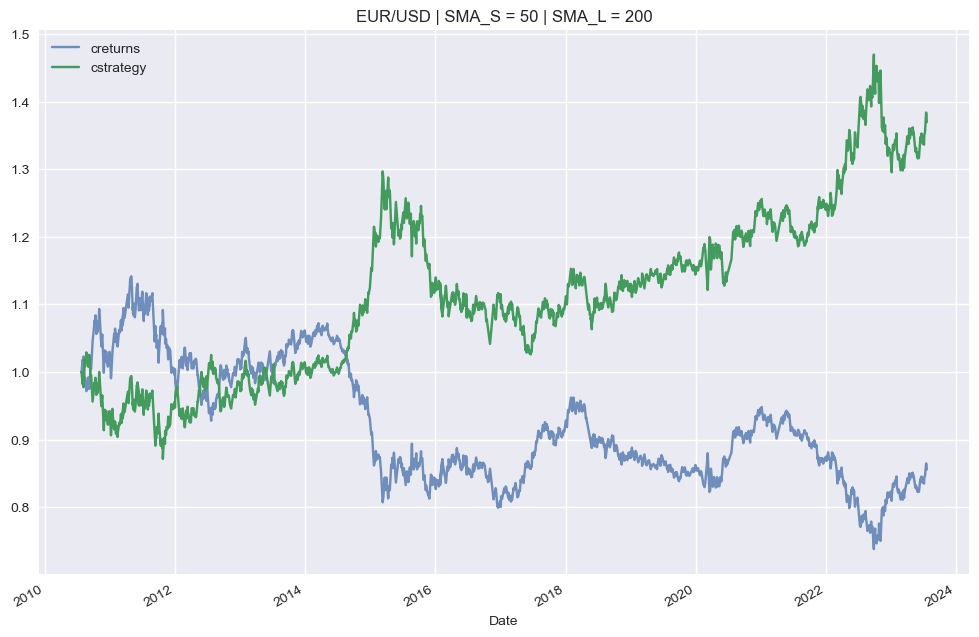

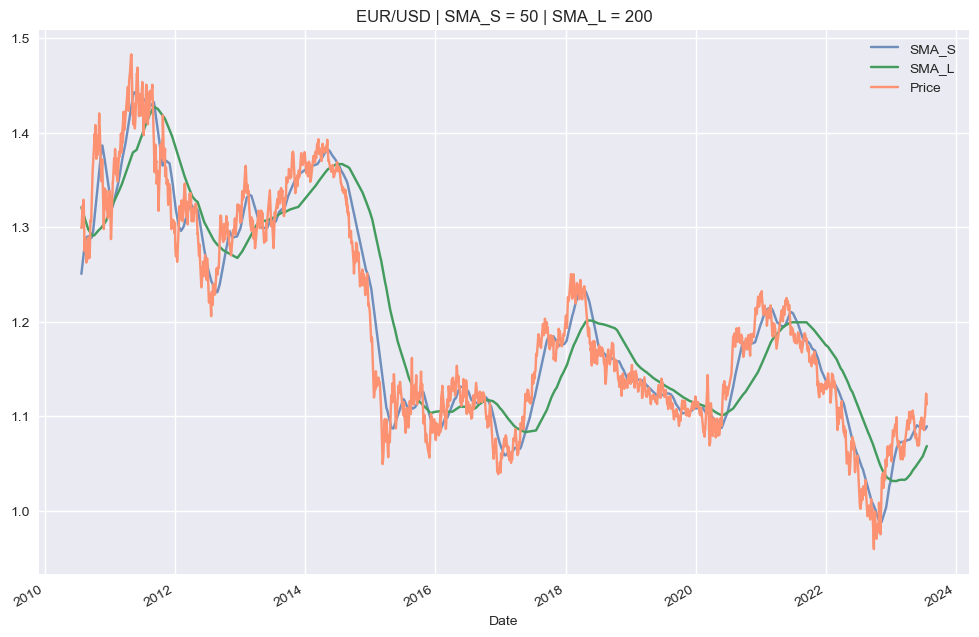

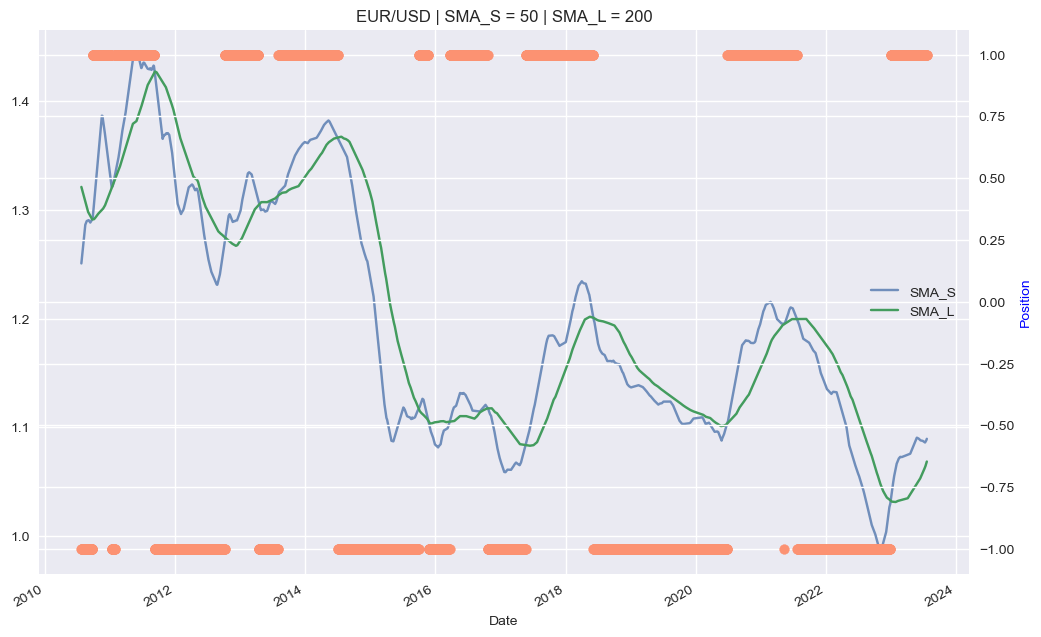

In [68]:
tester.plot_results()

In [69]:
tester.optimize_parameters((25,50,1),(100,200,1))

((32, 106), 1.708369)

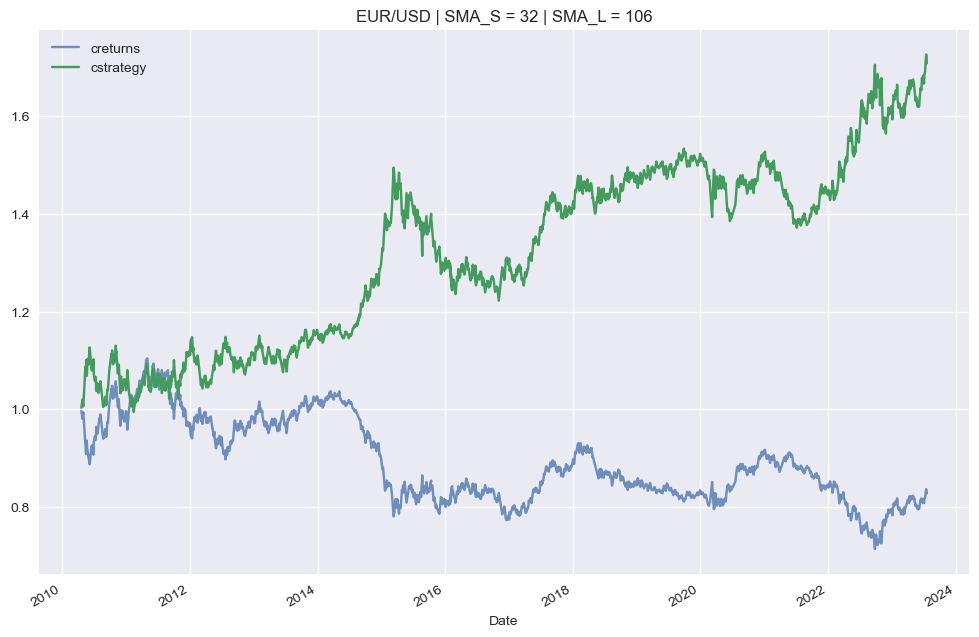

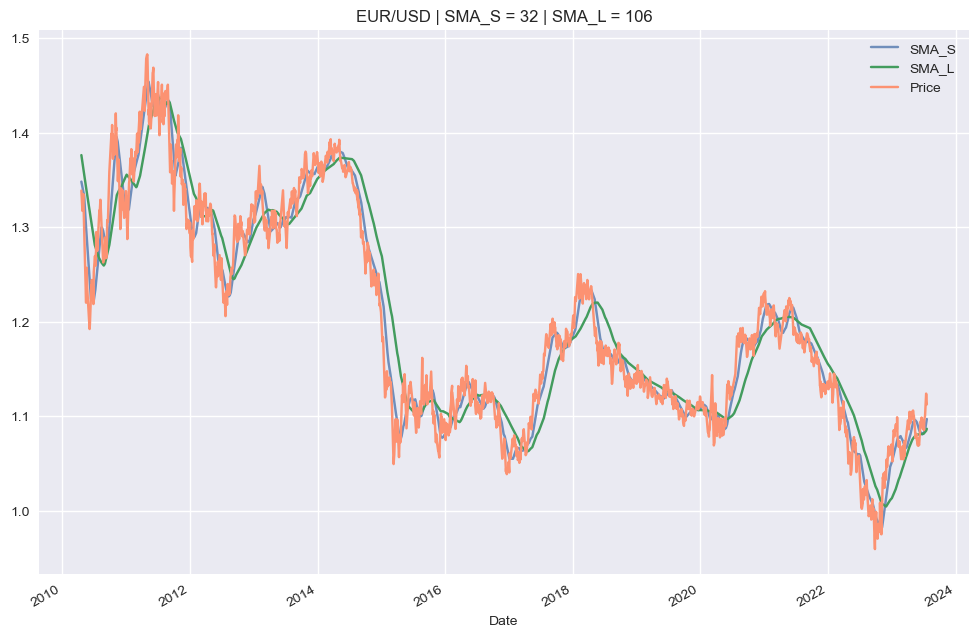

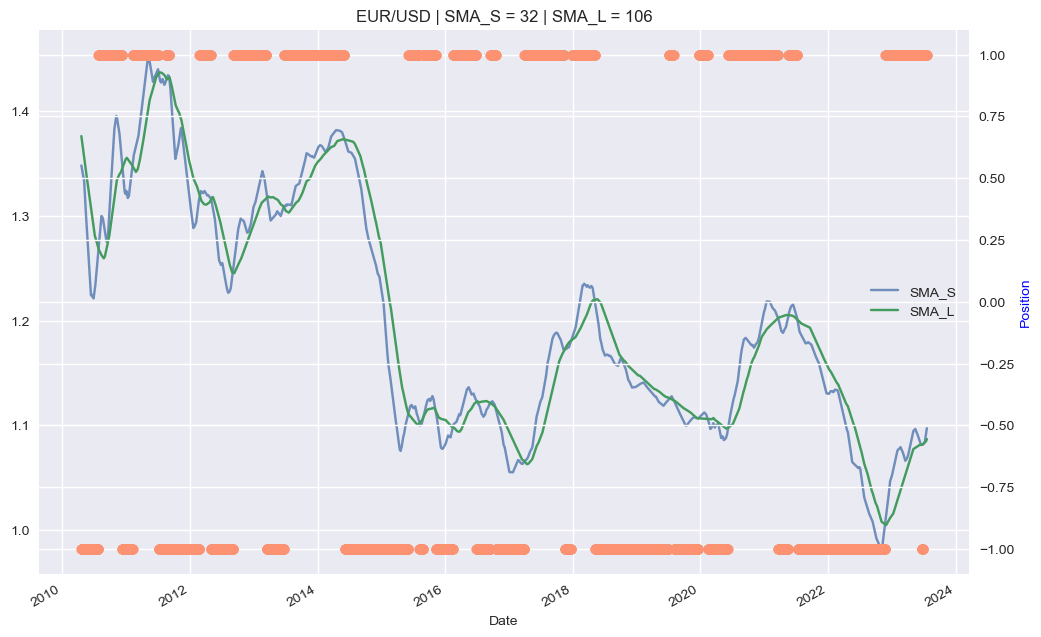

In [70]:
tester.plot_results()

In [71]:
tester.results_overview

SMA_S  SMA_L  performance
0        25    100       1.3610
1        25    101       1.3737
2        25    102       1.4785
3        25    103       1.5050
4        25    104       1.4683
...     ...    ...          ...
2495     49    195       1.2082
2496     49    196       1.2134
2497     49    197       1.2460
2498     49    198       1.2403
2499     49    199       1.2439

[2500 rows x 3 columns]

#### Back testing and forward testing

In [72]:
train = SMABacktester("price", 50, 200, "2010-01-02", "2015-12-31", 0.00007, "final_eurusd.csv")
train.optimize_parameters((25,50,1),(100,200,1)) # optimizing the strategy and backtesting also know as in-sample

((27, 101), 1.423961)

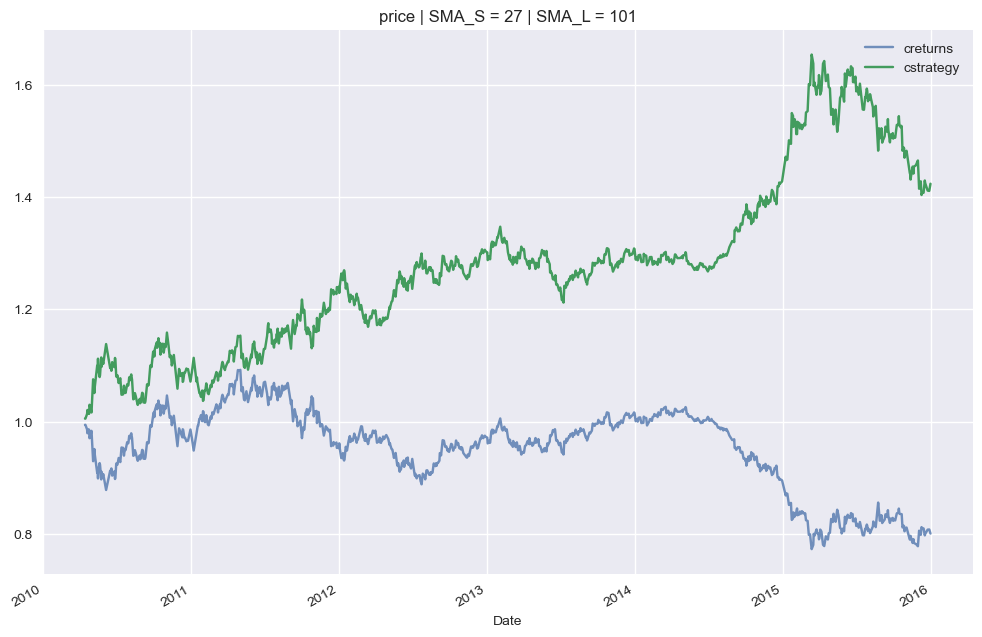

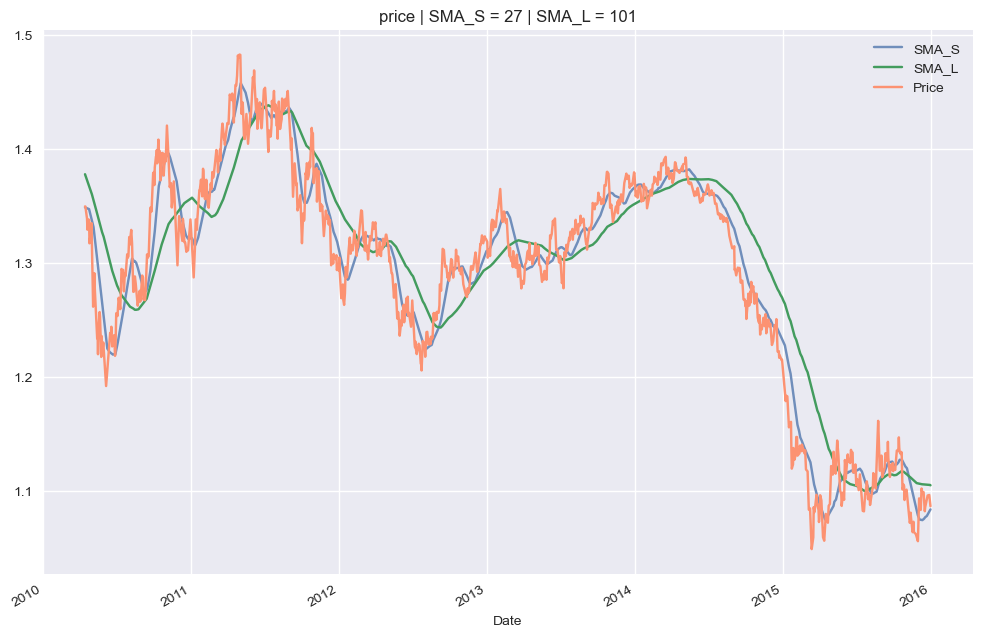

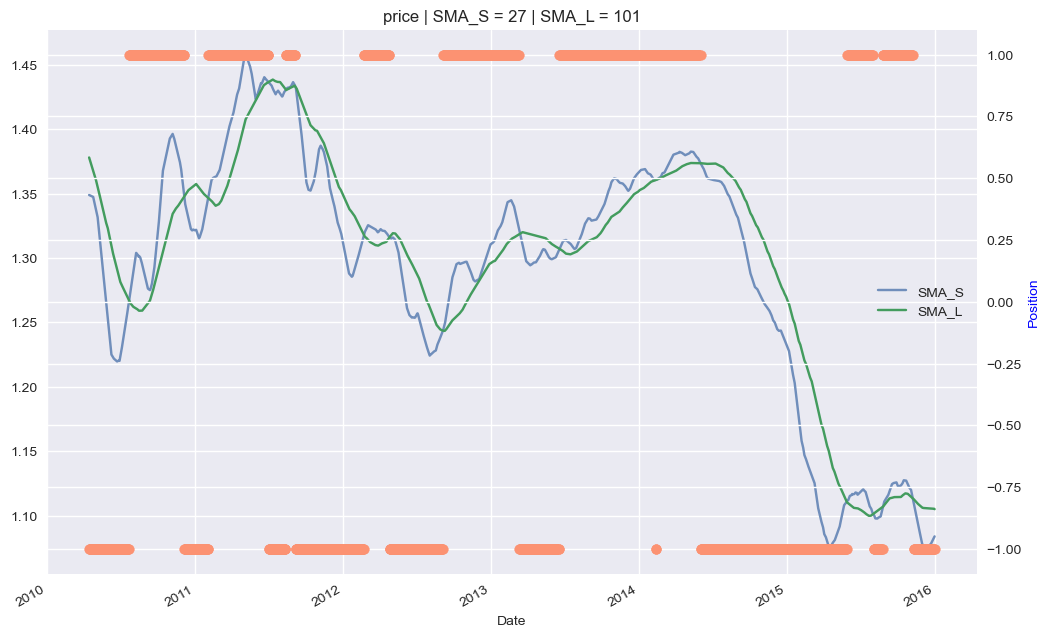

In [73]:
train.plot_results()

In [74]:
tester = SMABacktester("price", 50, 200, "2016-01-01", "2023-07-21", 0.00007, "final_eurusd.csv")


In [75]:
tester.test_strategy() # forward testing also called as out sample 

(1.24819, 0.254718)

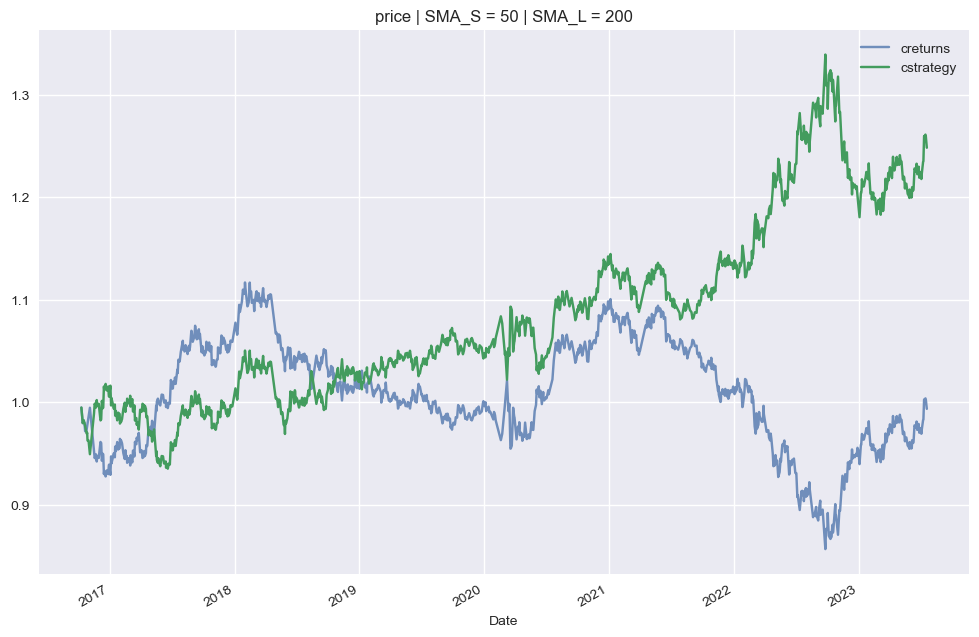

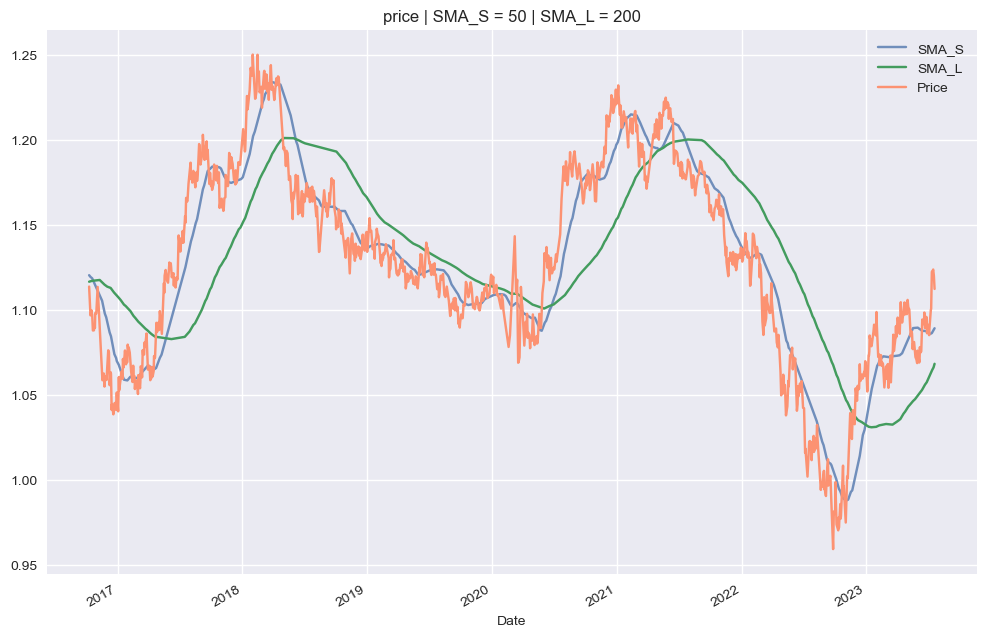

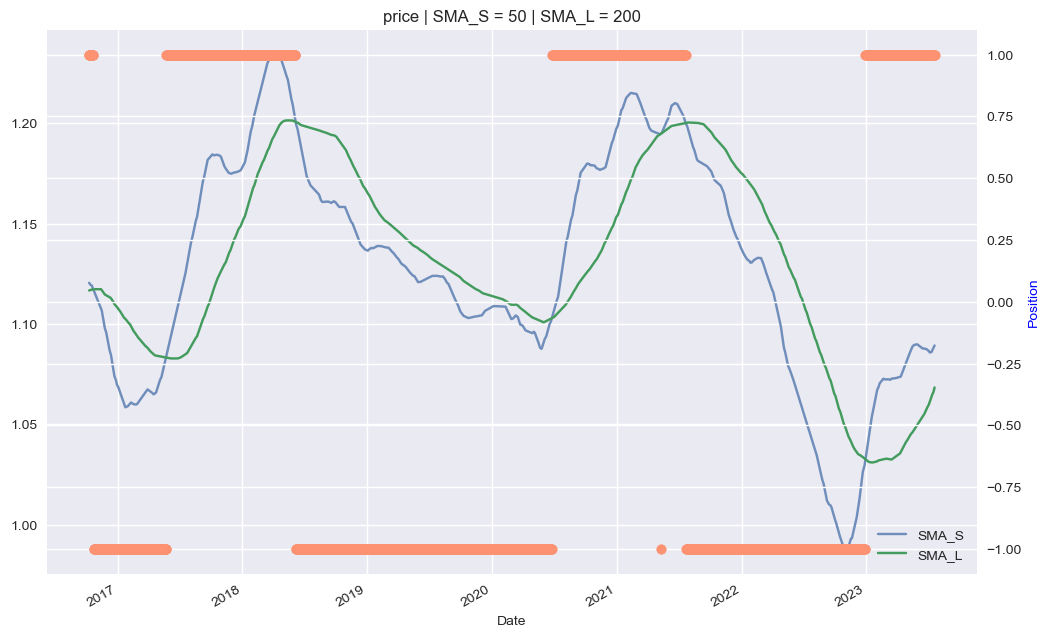

In [76]:
tester.plot_results()

### Simple Contrarian Strategy

In [77]:
# getting the intraday data for this strategy
intraday_df1 = api.get_history(instrument = "EUR_USD", start = "2021-01-01", end = "2023-07-21",
                granularity = "H6", price = "B")

intraday_df1.to_csv('intraday_bid.csv', float_format='%.9f')

intraday_df2 = api.get_history(instrument = "EUR_USD", start = "2021-01-01", end = "2023-07-21",
                granularity = "H6", price = "A")

intraday_df2.to_csv('intraday_ask.csv', float_format='%.9f')

df1 = pd.read_csv("intraday_bid.csv",parse_dates=["time"], index_col="time")

df2 = pd.read_csv("intraday_ask.csv",parse_dates=["time"], index_col="time")

final_data = pd.DataFrame()
final_data['time'] = df1.index
mid_price = (df1['c']+df2['c'])/2
final_data['Price'] = mid_price.reset_index(drop=True).round(9)

final_data = final_data.rename(columns={'time':'Date'})
final_data.to_csv("intraday.csv", float_format='%.9f')

data = pd.read_csv("intraday.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

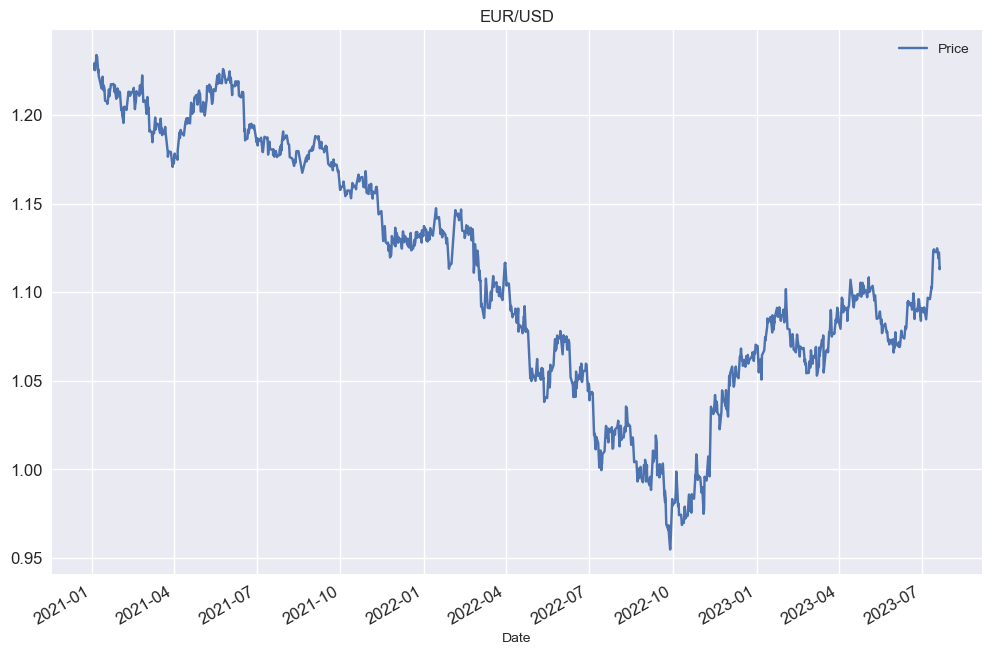

In [78]:
data.plot(figsize = (12,8), title = "EUR/USD", fontsize = 12)
plt.show()

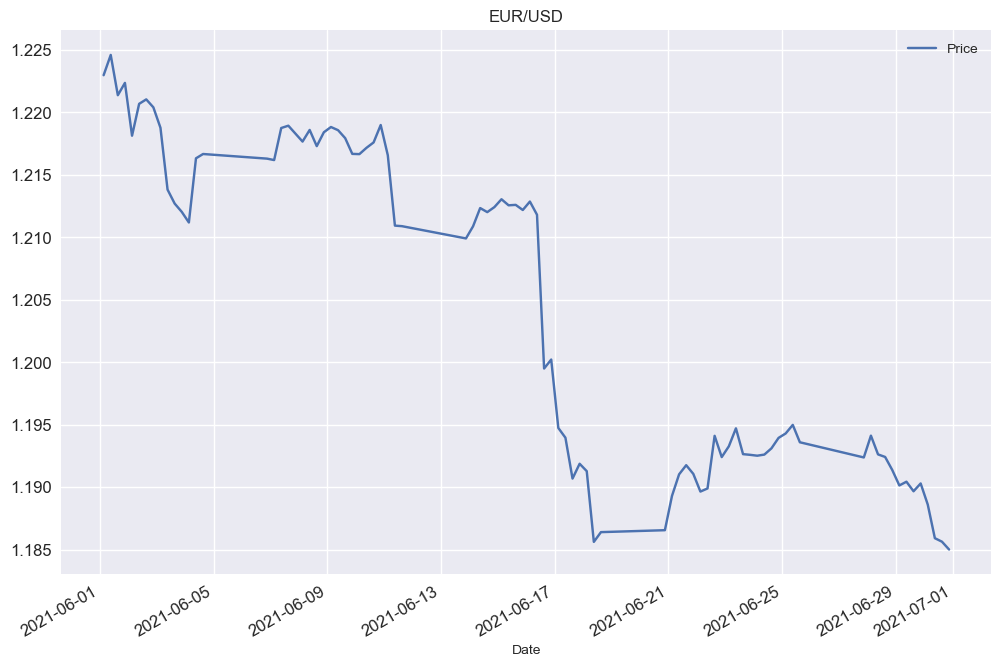

In [79]:
data.loc["2021-06"].plot(figsize = (12,8), title = "EUR/USD", fontsize = 12)
plt.show()

In [80]:
data["returns"]=np.log(data.div(data.shift(1)))

In [81]:
data.dropna(inplace = True)

In [82]:
# for window = 3
window = 3
data["returns"].rolling(window).mean()

Date
2021-01-04 04:00:00       NaN
2021-01-04 10:00:00       NaN
2021-01-04 16:00:00   -0.0001
2021-01-04 22:00:00   -0.0006
2021-01-05 04:00:00    0.0000
                        ...  
2023-07-19 21:00:00   -0.0002
2023-07-20 03:00:00    0.0005
2023-07-20 09:00:00   -0.0017
2023-07-20 15:00:00   -0.0028
2023-07-20 21:00:00   -0.0020
Name: returns, Length: 2686, dtype: float64

In [83]:
# contrarium will always have -ve sign
data["position"] = -np.sign(data['returns'].rolling(window).mean())

In [84]:
data

Price  returns  position
Date                                         
2021-01-04 04:00:00 1.2293   0.0031       NaN
2021-01-04 10:00:00 1.2272  -0.0018       NaN
2021-01-04 16:00:00 1.2252  -0.0016    1.0000
2021-01-04 22:00:00 1.2273   0.0017    1.0000
2021-01-05 04:00:00 1.2272  -0.0000   -1.0000
...                    ...      ...       ...
2023-07-19 21:00:00 1.1225   0.0020    1.0000
2023-07-20 03:00:00 1.1208  -0.0015   -1.0000
2023-07-20 09:00:00 1.1147  -0.0055    1.0000
2023-07-20 15:00:00 1.1130  -0.0015    1.0000
2023-07-20 21:00:00 1.1140   0.0009    1.0000

[2686 rows x 3 columns]

In [85]:
# vectorized strategy backtesting

data["strategy"] = data.position.shift(1)*data["returns"]
data.dropna(inplace = True)
data

Price  returns  position  strategy
Date                                                   
2021-01-04 22:00:00 1.2273   0.0017    1.0000    0.0017
2021-01-05 04:00:00 1.2272  -0.0000   -1.0000   -0.0000
2021-01-05 10:00:00 1.2276   0.0003   -1.0000   -0.0003
2021-01-05 16:00:00 1.2299   0.0019   -1.0000   -0.0019
2021-01-05 22:00:00 1.2286  -0.0010   -1.0000    0.0010
...                    ...      ...       ...       ...
2023-07-19 21:00:00 1.1225   0.0020    1.0000    0.0020
2023-07-20 03:00:00 1.1208  -0.0015   -1.0000   -0.0015
2023-07-20 09:00:00 1.1147  -0.0055    1.0000    0.0055
2023-07-20 15:00:00 1.1130  -0.0015    1.0000   -0.0015
2023-07-20 21:00:00 1.1140   0.0009    1.0000    0.0009

[2683 rows x 4 columns]

In [86]:
# absolute performance
data[["returns","strategy"]].sum()

# for more then 2.5 years the buy and hold return of the actual data stands at -9% and 
# our strategy with rolling window as 3 stands at +11%

returns    -0.0952
strategy    0.0982
dtype: float64

In [87]:
# absolute performance for investing just $1 over time
data[["returns","strategy"]].sum().apply(np.exp)

# for more then 2.5 years the buy and hold return of the actual data we end up at $ 0.9 which is a loss as
# we invested $1 whereas our strategy with rolling window as 3 ends up with profit at $1.118

returns    0.9092
strategy   1.1032
dtype: float64

In [88]:
data["cummulative_returns"] = data["returns"].cumsum().apply(np.exp)
data["cummulative_strategy"] = data["strategy"].cumsum().apply(np.exp)

In [89]:
data

Price  returns  position  strategy  cummulative_returns  \
Date                                                                           
2021-01-04 22:00:00 1.2273   0.0017    1.0000    0.0017               1.0017   
2021-01-05 04:00:00 1.2272  -0.0000   -1.0000   -0.0000               1.0016   
2021-01-05 10:00:00 1.2276   0.0003   -1.0000   -0.0003               1.0019   
2021-01-05 16:00:00 1.2299   0.0019   -1.0000   -0.0019               1.0038   
2021-01-05 22:00:00 1.2286  -0.0010   -1.0000    0.0010               1.0027   
...                    ...      ...       ...       ...                  ...   
2023-07-19 21:00:00 1.1225   0.0020    1.0000    0.0020               0.9161   
2023-07-20 03:00:00 1.1208  -0.0015   -1.0000   -0.0015               0.9148   
2023-07-20 09:00:00 1.1147  -0.0055    1.0000    0.0055               0.9098   
2023-07-20 15:00:00 1.1130  -0.0015    1.0000   -0.0015               0.9084   
2023-07-20 21:00:00 1.1140   0.0009    1.0000    0.0009               0.9092   

                     cummulative_strategy  
Date                                       
2021-01-04 22:00:00                1.0017  
2021-01-05 04:00:00                1.0016  
2021-01-05 10:00:00                1.0014  
2021-01-05 16:00:00                0.9995  
2021-01-05 22:00:00                1.0005  
...                                   ...  
2023-07-19 21:00:00                1.0995  
2023-07-20 03:00:00                1.0978  
2023-07-20 09:00:00                1.1039  
2023-07-20 15:00:00                1.1022  
2023-07-20 21:00:00                1.1032  

[2683 rows x 6 columns]

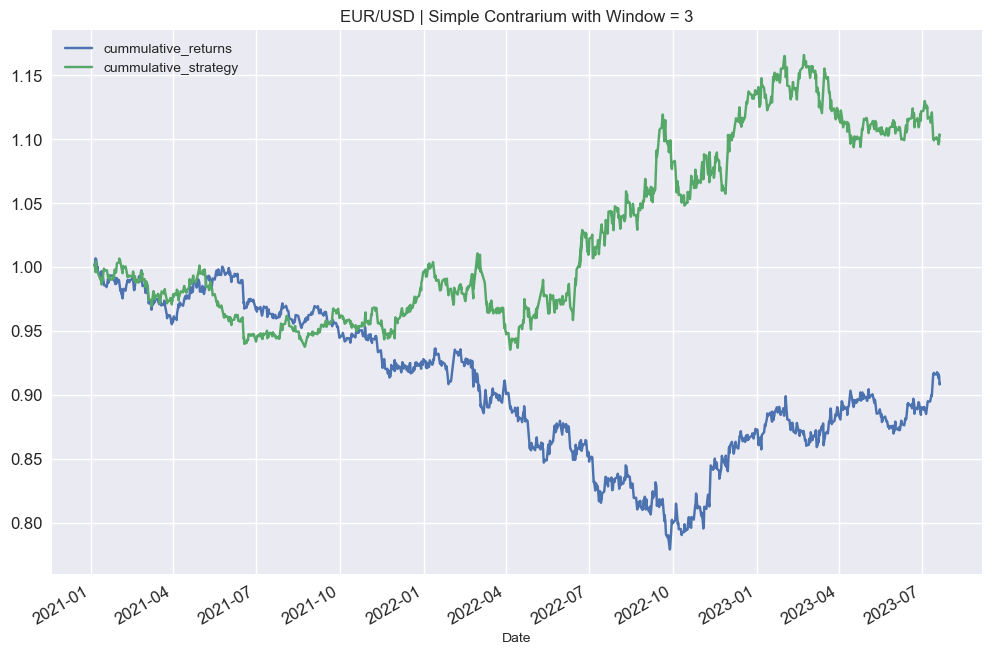

In [90]:
data[["cummulative_returns", "cummulative_strategy"]].plot(figsize = (12,8),
                                                          title = "EUR/USD | Simple Contrarium with Window = {}".format(window),
                                                          fontsize = 12)

plt.show()

In [91]:
data = pd.read_csv("intraday.csv", parse_dates = ["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [92]:
data

Price
Date                      
2021-01-03 22:00:00 1.2255
2021-01-04 04:00:00 1.2293
2021-01-04 10:00:00 1.2272
2021-01-04 16:00:00 1.2252
2021-01-04 22:00:00 1.2273
...                    ...
2023-07-19 21:00:00 1.1225
2023-07-20 03:00:00 1.1208
2023-07-20 09:00:00 1.1147
2023-07-20 15:00:00 1.1130
2023-07-20 21:00:00 1.1140

[2687 rows x 1 columns]

In [93]:
data["returns"] = np.log(data.div(data.shift(1)))

data.dropna(inplace = True)

In [94]:
to_plot = ["returns"]

for w in [1,2,3,5,10]:
    data["position{}".format(w)] = -np.sign(data["returns"].rolling(w).mean())
    data["strategy{}".format(w)] = data["position{}".format(w)].shift(1) * data["returns"]
    to_plot.append("strategy{}".format(w))


In [95]:
data

Price  returns  position1  strategy1  position2  \
Date                                                                   
2021-01-04 04:00:00 1.2293   0.0031    -1.0000        NaN        NaN   
2021-01-04 10:00:00 1.2272  -0.0018     1.0000     0.0018    -1.0000   
2021-01-04 16:00:00 1.2252  -0.0016     1.0000    -0.0016     1.0000   
2021-01-04 22:00:00 1.2273   0.0017    -1.0000     0.0017    -1.0000   
2021-01-05 04:00:00 1.2272  -0.0000     1.0000     0.0000    -1.0000   
...                    ...      ...        ...        ...        ...   
2023-07-19 21:00:00 1.1225   0.0020    -1.0000    -0.0020    -1.0000   
2023-07-20 03:00:00 1.1208  -0.0015     1.0000     0.0015    -1.0000   
2023-07-20 09:00:00 1.1147  -0.0055     1.0000    -0.0055     1.0000   
2023-07-20 15:00:00 1.1130  -0.0015     1.0000    -0.0015     1.0000   
2023-07-20 21:00:00 1.1140   0.0009    -1.0000     0.0009     1.0000   

                     strategy2  position3  strategy3  position5  strategy5  \
Date                                                                         
2021-01-04 04:00:00        NaN        NaN        NaN        NaN        NaN   
2021-01-04 10:00:00        NaN        NaN        NaN        NaN        NaN   
2021-01-04 16:00:00     0.0016     1.0000        NaN        NaN        NaN   
2021-01-04 22:00:00     0.0017     1.0000     0.0017        NaN        NaN   
2021-01-05 04:00:00     0.0000    -1.0000    -0.0000    -1.0000        NaN   
...                        ...        ...        ...        ...        ...   
2023-07-19 21:00:00     0.0020     1.0000     0.0020     1.0000     0.0020   
2023-07-20 03:00:00     0.0015    -1.0000    -0.0015     1.0000    -0.0015   
2023-07-20 09:00:00     0.0055     1.0000     0.0055     1.0000    -0.0055   
2023-07-20 15:00:00    -0.0015     1.0000    -0.0015     1.0000    -0.0015   
2023-07-20 21:00:00     0.0009     1.0000     0.0009     1.0000     0.0009   

                     position10  strategy10  
Date                                         
2021-01-04 04:00:00         NaN         NaN  
2021-01-04 10:00:00         NaN         NaN  
2021-01-04 16:00:00         NaN         NaN  
2021-01-04 22:00:00         NaN         NaN  
2021-01-05 04:00:00         NaN         NaN  
...                         ...         ...  
2023-07-19 21:00:00      1.0000      0.0020  
2023-07-20 03:00:00      1.0000     -0.0015  
2023-07-20 09:00:00      1.0000     -0.0055  
2023-07-20 15:00:00      1.0000     -0.0015  
2023-07-20 21:00:00      1.0000      0.0009  

[2686 rows x 12 columns]

In [96]:
to_plot

['returns', 'strategy1', 'strategy2', 'strategy3', 'strategy5', 'strategy10']

<function matplotlib.pyplot.show(close=None, block=None)>

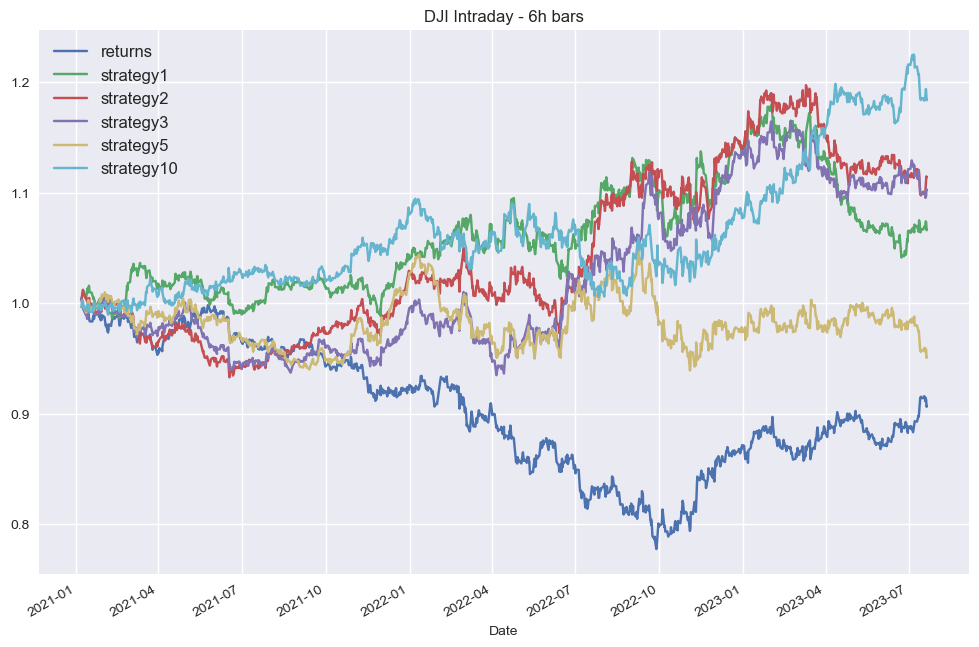

In [97]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize = (12,8))
plt.title("DJI Intraday - 6h bars", fontsize = 12)
plt.legend(fontsize = 12)
plt.show

In [98]:
### including trading cost in the strategy

data = pd.read_csv("intraday.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

# for window = 3
window = 3
data["returns"]=np.log(data.div(data.shift(1)))
data.dropna(inplace = True)
data["position"] = -np.sign(data['returns'].rolling(window).mean())
data["strategy"] = data.position.shift(1)*data["returns"]
data.dropna(inplace = True)
data["cummulative_returns"] = data["returns"].cumsum().apply(np.exp)
data["cummulative_strategy"] = data["strategy"].cumsum().apply(np.exp)

data


Price  returns  position  strategy  cummulative_returns  \
Date                                                                           
2021-01-04 22:00:00 1.2273   0.0017    1.0000    0.0017               1.0017   
2021-01-05 04:00:00 1.2272  -0.0000   -1.0000   -0.0000               1.0016   
2021-01-05 10:00:00 1.2276   0.0003   -1.0000   -0.0003               1.0019   
2021-01-05 16:00:00 1.2299   0.0019   -1.0000   -0.0019               1.0038   
2021-01-05 22:00:00 1.2286  -0.0010   -1.0000    0.0010               1.0027   
...                    ...      ...       ...       ...                  ...   
2023-07-19 21:00:00 1.1225   0.0020    1.0000    0.0020               0.9161   
2023-07-20 03:00:00 1.1208  -0.0015   -1.0000   -0.0015               0.9148   
2023-07-20 09:00:00 1.1147  -0.0055    1.0000    0.0055               0.9098   
2023-07-20 15:00:00 1.1130  -0.0015    1.0000   -0.0015               0.9084   
2023-07-20 21:00:00 1.1140   0.0009    1.0000    0.0009               0.9092   

                     cummulative_strategy  
Date                                       
2021-01-04 22:00:00                1.0017  
2021-01-05 04:00:00                1.0016  
2021-01-05 10:00:00                1.0014  
2021-01-05 16:00:00                0.9995  
2021-01-05 22:00:00                1.0005  
...                                   ...  
2023-07-19 21:00:00                1.0995  
2023-07-20 03:00:00                1.0978  
2023-07-20 09:00:00                1.1039  
2023-07-20 15:00:00                1.1022  
2023-07-20 21:00:00                1.1032  

[2683 rows x 6 columns]

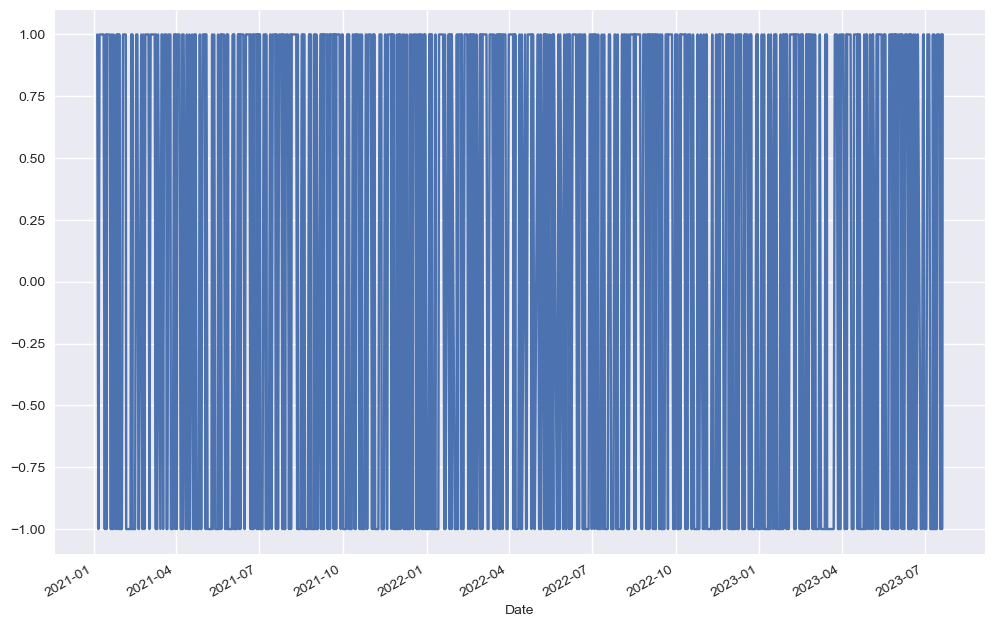

In [99]:
data.loc[:,"position"].plot(figsize = (12,8))
plt.show()

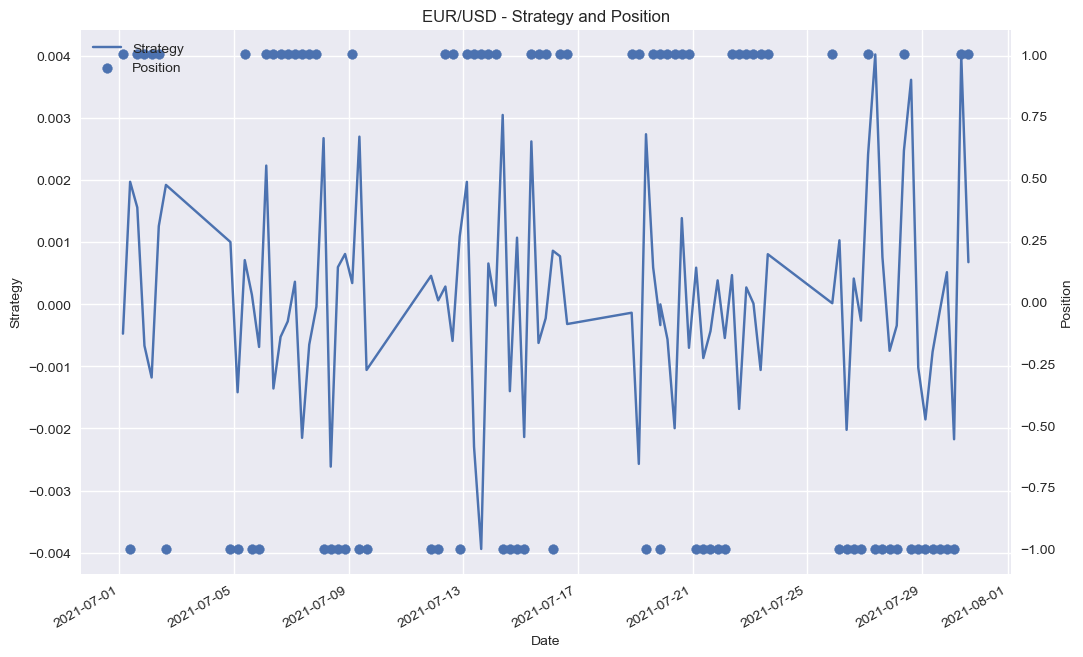

In [100]:
# Filter to 2017 data
data2017 = data.loc["2021-07", ["strategy", "position"]]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot strategy line
data2017['strategy'].plot(ax=ax1, label='Strategy')

# Twin axis for position
ax2 = ax1.twinx()

# Plot positions
ax2.scatter(data2017.index, data2017['position'], marker='o', label='Position')

# Format plots
ax1.set_title("EUR/USD - Strategy and Position", fontsize=12)
ax1.set_xlabel('Date')
ax1.set_ylabel('Strategy')
ax2.set_ylabel('Position')

# Remove grid and legend
ax2.grid(False)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()

In [101]:
##### Trading/ Transaction cost

spread = 1.5 * 0.0001 # pips == fourth price decimal to buy 1 euro we have to pay this much as trading cost

half_spread = spread/2 # absolute trading cost per trade ( position change is either 1 or -1)

ptc = half_spread / data.Price.mean() # proportional trading cost per trade ( position change is +1/-1)

ptc

6.753852896868307e-05

In [102]:
ptc = 0.00007 # approximated to 5 decimal point

data["trades"] = data.position.diff().fillna(0).abs()

In [103]:
data

Price  returns  position  strategy  cummulative_returns  \
Date                                                                           
2021-01-04 22:00:00 1.2273   0.0017    1.0000    0.0017               1.0017   
2021-01-05 04:00:00 1.2272  -0.0000   -1.0000   -0.0000               1.0016   
2021-01-05 10:00:00 1.2276   0.0003   -1.0000   -0.0003               1.0019   
2021-01-05 16:00:00 1.2299   0.0019   -1.0000   -0.0019               1.0038   
2021-01-05 22:00:00 1.2286  -0.0010   -1.0000    0.0010               1.0027   
...                    ...      ...       ...       ...                  ...   
2023-07-19 21:00:00 1.1225   0.0020    1.0000    0.0020               0.9161   
2023-07-20 03:00:00 1.1208  -0.0015   -1.0000   -0.0015               0.9148   
2023-07-20 09:00:00 1.1147  -0.0055    1.0000    0.0055               0.9098   
2023-07-20 15:00:00 1.1130  -0.0015    1.0000   -0.0015               0.9084   
2023-07-20 21:00:00 1.1140   0.0009    1.0000    0.0009               0.9092   

                     cummulative_strategy  trades  
Date                                               
2021-01-04 22:00:00                1.0017  0.0000  
2021-01-05 04:00:00                1.0016  2.0000  
2021-01-05 10:00:00                1.0014  0.0000  
2021-01-05 16:00:00                0.9995  0.0000  
2021-01-05 22:00:00                1.0005  0.0000  
...                                   ...     ...  
2023-07-19 21:00:00                1.0995  0.0000  
2023-07-20 03:00:00                1.0978  2.0000  
2023-07-20 09:00:00                1.1039  2.0000  
2023-07-20 15:00:00                1.1022  0.0000  
2023-07-20 21:00:00                1.1032  0.0000  

[2683 rows x 7 columns]

In [104]:
data.trades.value_counts()

0.0000    1955
2.0000     728
Name: trades, dtype: int64

In [105]:
data["strategy_net"] = data.strategy - data.trades * ptc
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [106]:
data

Price  returns  position  strategy  cummulative_returns  \
Date                                                                           
2021-01-04 22:00:00 1.2273   0.0017    1.0000    0.0017               1.0017   
2021-01-05 04:00:00 1.2272  -0.0000   -1.0000   -0.0000               1.0016   
2021-01-05 10:00:00 1.2276   0.0003   -1.0000   -0.0003               1.0019   
2021-01-05 16:00:00 1.2299   0.0019   -1.0000   -0.0019               1.0038   
2021-01-05 22:00:00 1.2286  -0.0010   -1.0000    0.0010               1.0027   
...                    ...      ...       ...       ...                  ...   
2023-07-19 21:00:00 1.1225   0.0020    1.0000    0.0020               0.9161   
2023-07-20 03:00:00 1.1208  -0.0015   -1.0000   -0.0015               0.9148   
2023-07-20 09:00:00 1.1147  -0.0055    1.0000    0.0055               0.9098   
2023-07-20 15:00:00 1.1130  -0.0015    1.0000   -0.0015               0.9084   
2023-07-20 21:00:00 1.1140   0.0009    1.0000    0.0009               0.9092   

                     cummulative_strategy  trades  strategy_net  cstrategy_net  
Date                                                                            
2021-01-04 22:00:00                1.0017  0.0000        0.0017         1.0017  
2021-01-05 04:00:00                1.0016  2.0000       -0.0002         1.0015  
2021-01-05 10:00:00                1.0014  0.0000       -0.0003         1.0012  
2021-01-05 16:00:00                0.9995  0.0000       -0.0019         0.9993  
2021-01-05 22:00:00                1.0005  0.0000        0.0010         1.0004  
...                                   ...     ...           ...            ...  
2023-07-19 21:00:00                1.0995  0.0000        0.0020         0.9932  
2023-07-20 03:00:00                1.0978  2.0000       -0.0016         0.9916  
2023-07-20 09:00:00                1.1039  2.0000        0.0053         0.9969  
2023-07-20 15:00:00                1.1022  0.0000       -0.0015         0.9954  
2023-07-20 21:00:00                1.1032  0.0000        0.0009         0.9963  

[2683 rows x 9 columns]

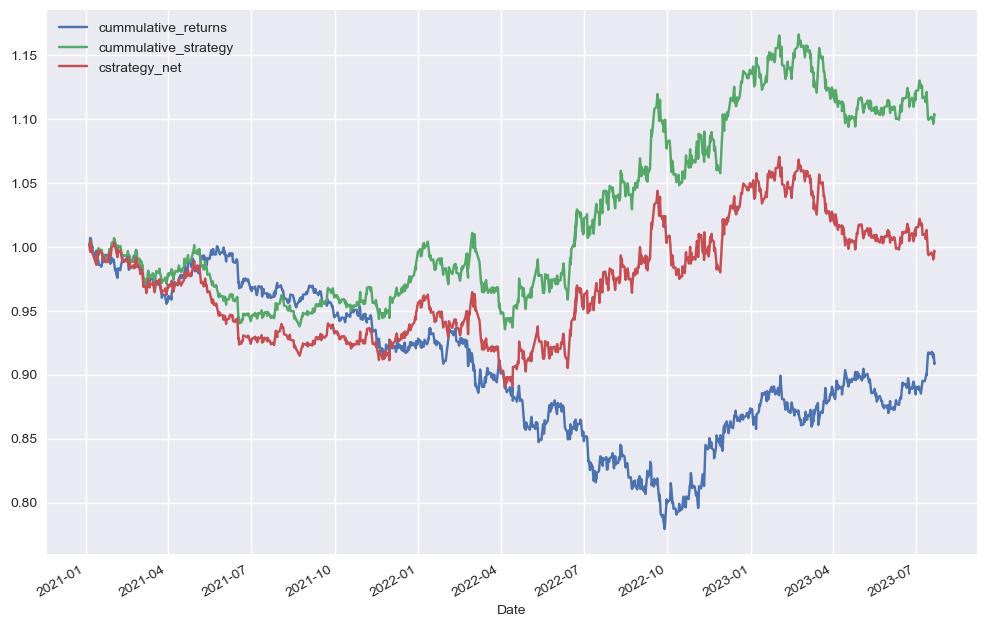

In [107]:
data[["cummulative_returns","cummulative_strategy","cstrategy_net"]].plot(figsize= (12,8))
plt.show()

In [108]:
class ConBacktester():
    ''' Class for the vectorized backtesting of simple contrarian trading strategies.
    '''    
    
    def __init__(self, symbol, start, end, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        start: str
            start date for data import
        end: str
            end date for data import
        tc: float
            proportional transaction/trading costs per trade
        '''
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        
    def __repr__(self):
        return "ConBacktester(symbol = {}, start = {}, end = {})".format(self.symbol, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from intraday_pairs.csv (source can be changed).
        '''
        raw = pd.read_csv("intraday.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw.drop(['Unnamed: 0'], axis=1)
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "Price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def test_strategy(self, window = 1):
        ''' Backtests the simple contrarian trading strategy.
        
        Parameters
        ----------
        window: int
            time window (number of bars) to be considered for the strategy.
        '''
        self.window = window
        data = self.data.copy().dropna()
        data["position"] = -np.sign(data["returns"].rolling(self.window).mean())
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine the number of trades in each bar
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | Window = {} | TC = {}".format(self.symbol, self.window, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
            fig, ax1 = plt.subplots(figsize=(12,8))

            title = "{} | Window = {} | TC = {}".format(self.symbol, self.window, self.tc)
            ax1.set_title(title)

            self.results['strategy'].plot(ax=ax1, color='#708EBB')

            ax2 = ax1.twinx()

            ax2.scatter(self.results.index, self.results['position'], color='#fc9272', label='position')

            ax1.set_xlabel('Date')
            ax1.set_ylabel('Strategy')
            ax2.set_ylabel('Position')

            # Remove grid and legend
            ax2.grid(False)

            
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
            
    def optimize_parameter(self, window_range):
        ''' Finds the optimal strategy (global maximum) given the window parameter range.

        Parameters
        ----------
        window_range: tuple
            tuples of the form (start, end, step size)
        '''
        
        windows = range(*window_range)
            
        results = []
        for window in windows:
            results.append(self.test_strategy(window)[0])
        
        best_perf = np.max(results) # best performance
        opt = windows[np.argmax(results)] # optimal parameter
        
        # run/set the optimal strategy
        self.test_strategy(opt)
        
        # create a df with many results
        many_results =  pd.DataFrame(data = {"window": windows, "performance": results})
        self.results_overview = many_results
        
        return opt, best_perf

In [109]:
tester = ConBacktester("EUR/USD","2021-01-01", "2023-07-21", 0)

In [110]:
tester

ConBacktester(symbol = EUR/USD, start = 2021-01-01, end = 2023-07-21)

In [111]:
tester.test_strategy()

(1.077696, 0.17154)

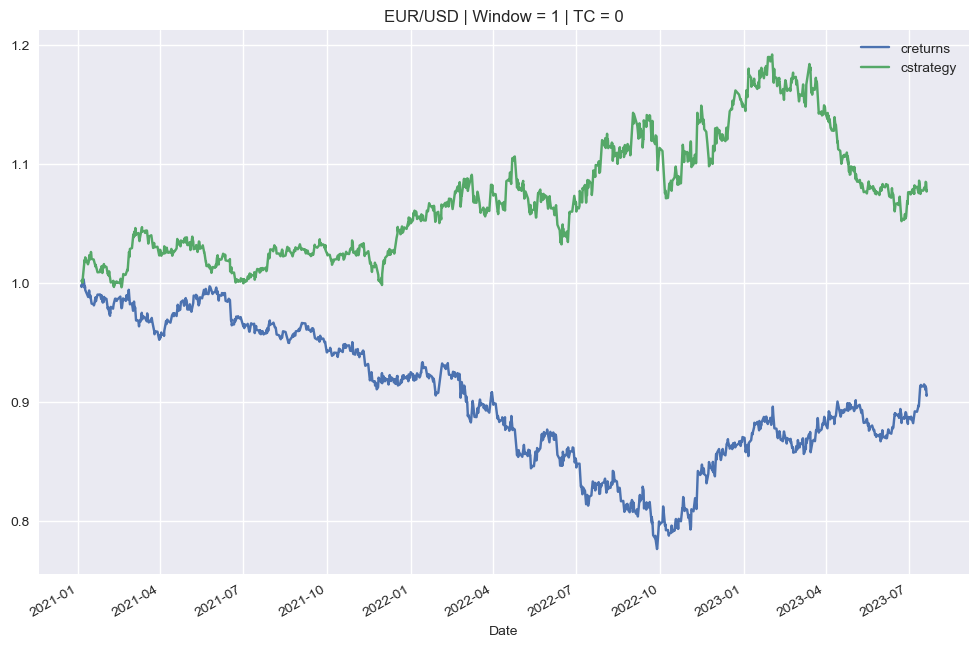

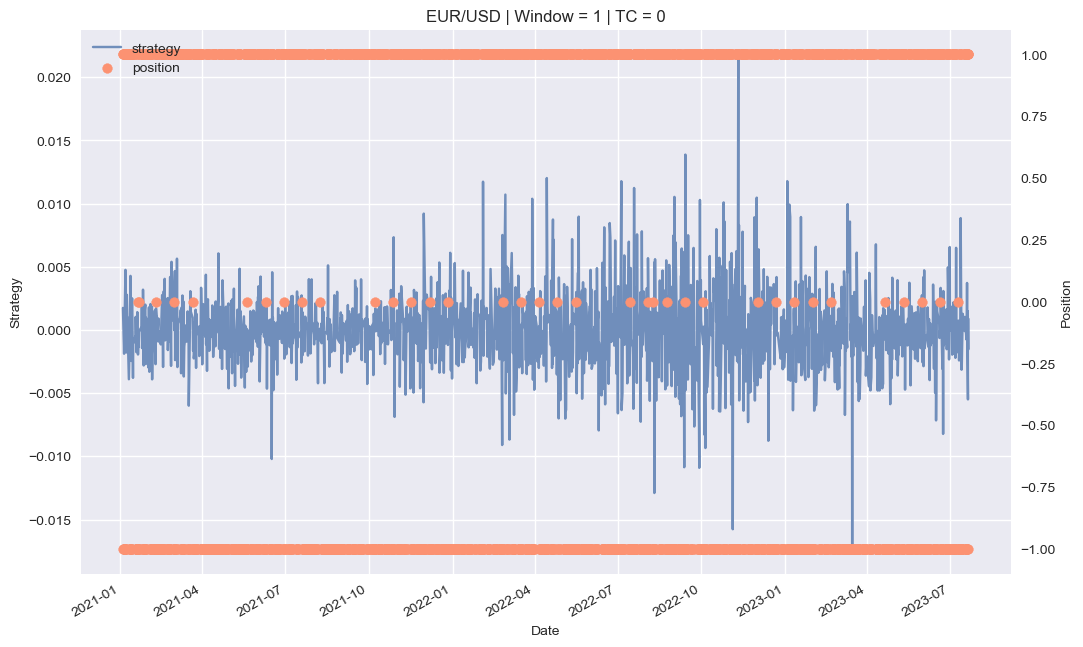

In [112]:
tester.plot_results()

In [113]:
tester.results

Price  returns  position  strategy  trades  creturns  \
Date                                                                        
2021-01-04 10:00:00 1.2272  -0.0018    1.0000    0.0018  0.0000    0.9983   
2021-01-04 16:00:00 1.2252  -0.0016    1.0000   -0.0016  0.0000    0.9967   
2021-01-04 22:00:00 1.2273   0.0017   -1.0000    0.0017  2.0000    0.9983   
2021-01-05 04:00:00 1.2272  -0.0000    1.0000    0.0000  2.0000    0.9983   
2021-01-05 10:00:00 1.2276   0.0003   -1.0000    0.0003  2.0000    0.9986   
...                    ...      ...       ...       ...     ...       ...   
2023-07-19 21:00:00 1.1225   0.0020   -1.0000   -0.0020  0.0000    0.9131   
2023-07-20 03:00:00 1.1208  -0.0015    1.0000    0.0015  2.0000    0.9117   
2023-07-20 09:00:00 1.1147  -0.0055    1.0000   -0.0055  0.0000    0.9068   
2023-07-20 15:00:00 1.1130  -0.0015    1.0000   -0.0015  0.0000    0.9054   
2023-07-20 21:00:00 1.1140   0.0009   -1.0000    0.0009  2.0000    0.9062   

                     cstrategy  
Date                            
2021-01-04 10:00:00     1.0018  
2021-01-04 16:00:00     1.0002  
2021-01-04 22:00:00     1.0018  
2021-01-05 04:00:00     1.0019  
2021-01-05 10:00:00     1.0021  
...                        ...  
2023-07-19 21:00:00     1.0827  
2023-07-20 03:00:00     1.0843  
2023-07-20 09:00:00     1.0784  
2023-07-20 15:00:00     1.0767  
2023-07-20 21:00:00     1.0777  

[2685 rows x 7 columns]

In [114]:
tester.optimize_parameter((1,500,1))

(8, 1.329092)

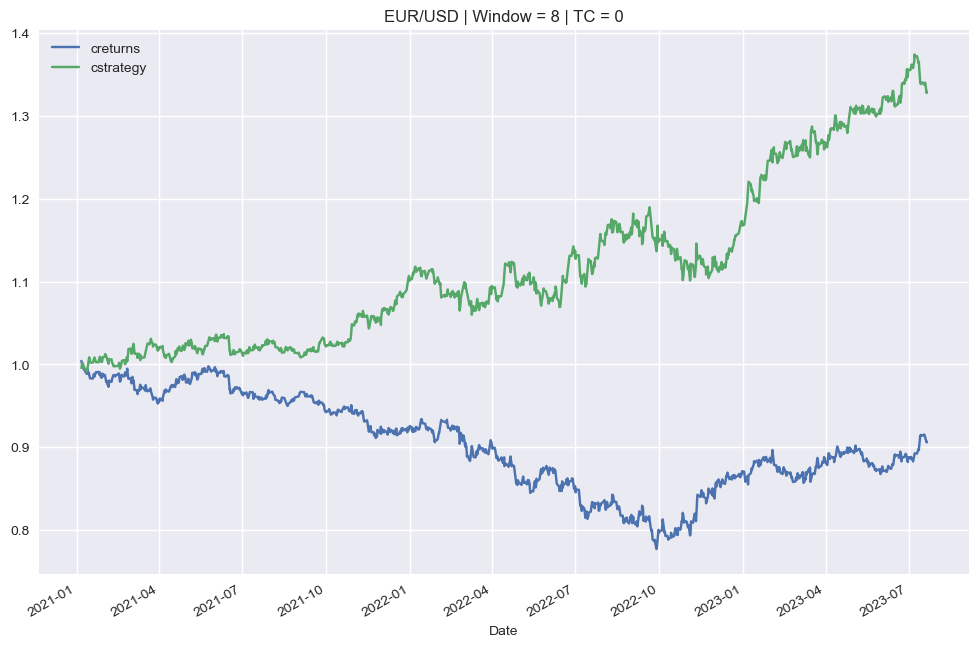

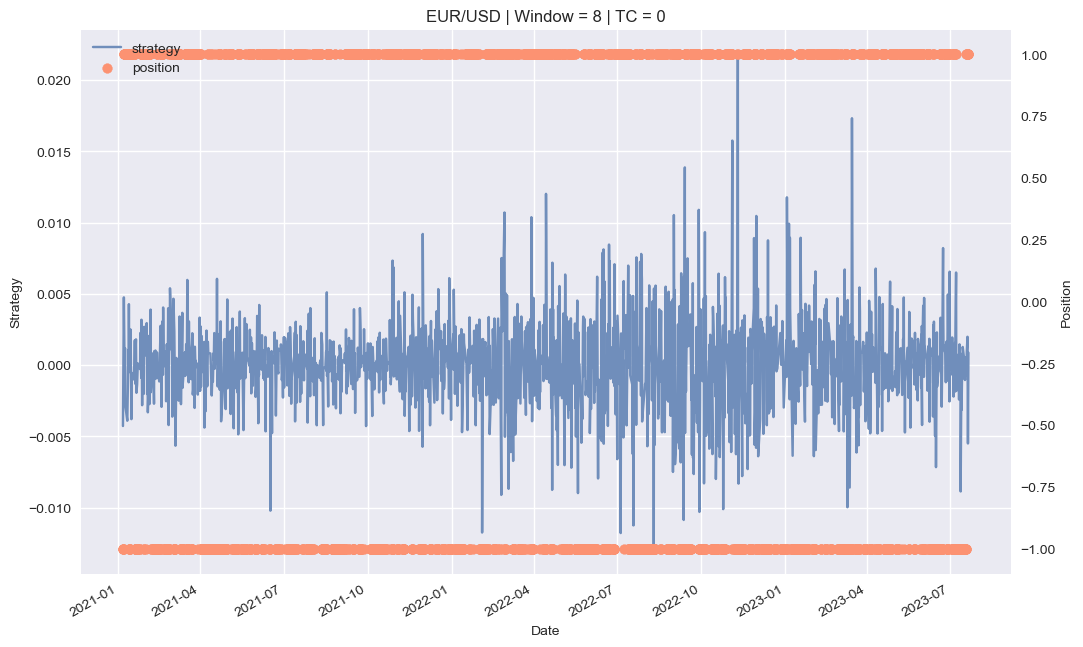

In [115]:
tester.plot_results()

In [116]:
tester.results_overview

window  performance
0         1       1.0777
1         2       1.1167
2         3       1.1032
3         4       1.1475
4         5       0.9541
..      ...          ...
494     495       0.8550
495     496       0.8484
496     497       0.8414
497     498       0.8509
498     499       0.8779

[499 rows x 2 columns]

In [117]:
tester.results_overview.nlargest(10,"performance")

window  performance
7        8       1.3291
28      29       1.2793
10      11       1.2658
8        9       1.2587
24      25       1.2537
26      27       1.2521
29      30       1.2503
27      28       1.2357
30      31       1.2253
11      12       1.2167

In [118]:
tester.results_overview.nsmallest(10,"performance")

window  performance
335     336       0.7540
336     337       0.7621
347     348       0.7703
353     354       0.7713
355     356       0.7783
346     347       0.7796
338     339       0.7813
351     352       0.7822
334     335       0.7833
339     340       0.7835

### Bollinger Strategy

In [119]:
# using the same data as simple contrarium strategy

data = pd.read_csv("intraday.csv", parse_dates = ["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1) 

In [120]:
data["returns"] = np.log(data.div(data.shift(1)))

In [121]:
data

Price  returns
Date                               
2021-01-03 22:00:00 1.2255      NaN
2021-01-04 04:00:00 1.2293   0.0031
2021-01-04 10:00:00 1.2272  -0.0018
2021-01-04 16:00:00 1.2252  -0.0016
2021-01-04 22:00:00 1.2273   0.0017
...                    ...      ...
2023-07-19 21:00:00 1.1225   0.0020
2023-07-20 03:00:00 1.1208  -0.0015
2023-07-20 09:00:00 1.1147  -0.0055
2023-07-20 15:00:00 1.1130  -0.0015
2023-07-20 21:00:00 1.1140   0.0009

[2687 rows x 2 columns]

#### Mean Reversion:
Financial Instruments are overbought/oversold from time to time and hence the revert back to mean price

#### Bollinger Bands:
Consist of SMA (eg:20) and upper and lower bands which is Standard Deviation (generally +/- 2 away from SMA)

In [122]:
SMA = 30
dev = 2

data["SMA"] = data["Price"].rolling(SMA).mean()

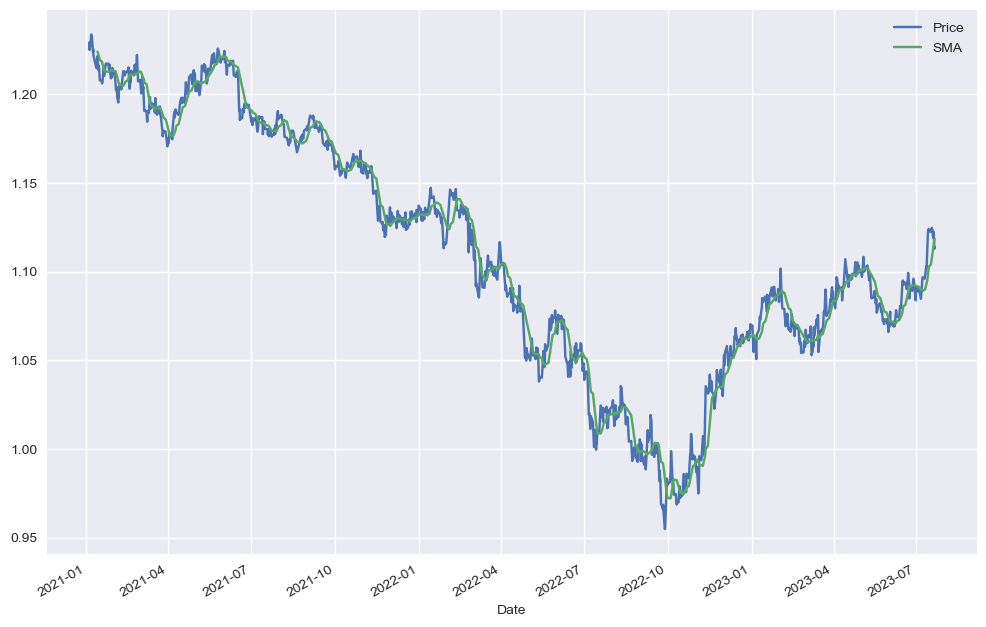

In [123]:
data[["Price", "SMA"]].plot(figsize = (12,8))
plt.show()

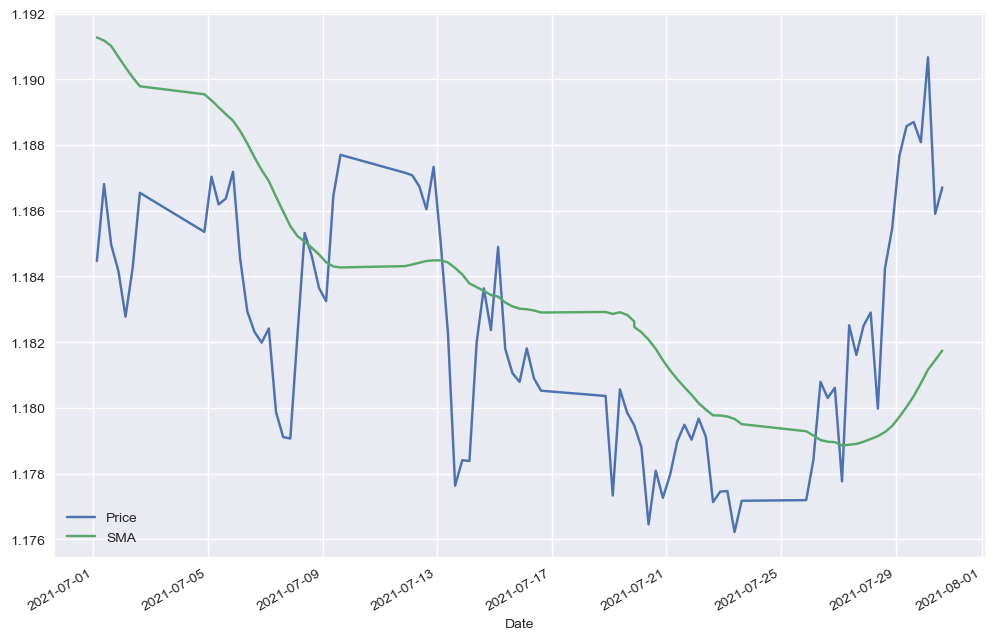

In [124]:
data.loc["2021-07", ["Price", "SMA"]].plot(figsize = (12,8))
plt.show()

In [125]:
data["Price"].rolling(SMA).std()

Date
2021-01-03 22:00:00      NaN
2021-01-04 04:00:00      NaN
2021-01-04 10:00:00      NaN
2021-01-04 16:00:00      NaN
2021-01-04 22:00:00      NaN
                       ...  
2023-07-19 21:00:00   0.0093
2023-07-20 03:00:00   0.0088
2023-07-20 09:00:00   0.0083
2023-07-20 15:00:00   0.0077
2023-07-20 21:00:00   0.0068
Name: Price, Length: 2687, dtype: float64

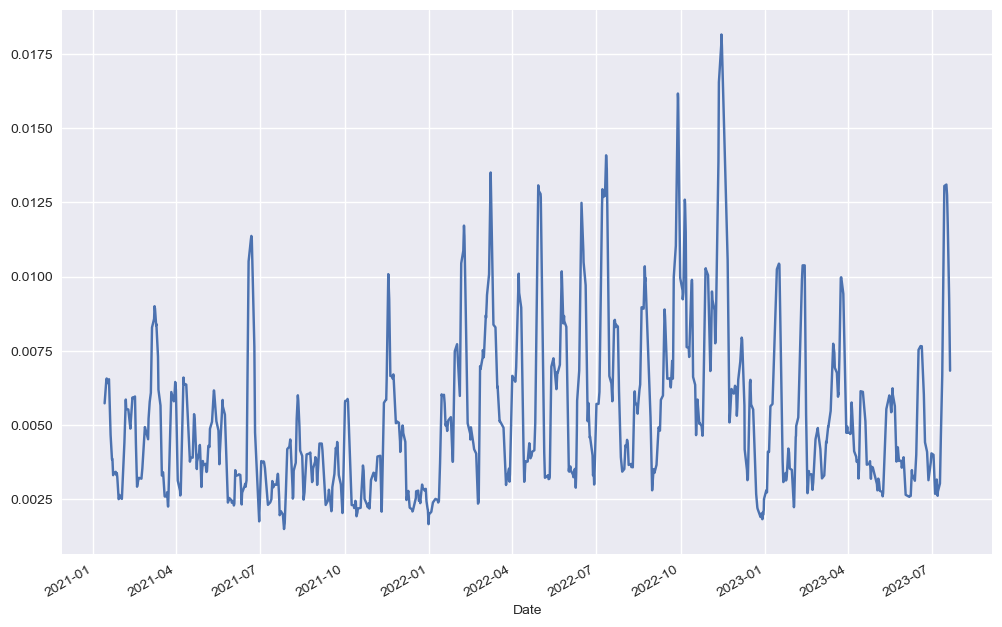

In [126]:
data["Price"].rolling(SMA).std().plot(figsize=(12,8))
plt.show()

In [127]:
# Lower band for Bollinger Bands
data["Lower"] = data["SMA"] - data["Price"].rolling(SMA).std() * dev 

In [128]:
# Upper band for Bollinger Bands
data["Upper"] = data["SMA"] + data["Price"].rolling(SMA).std() * dev 

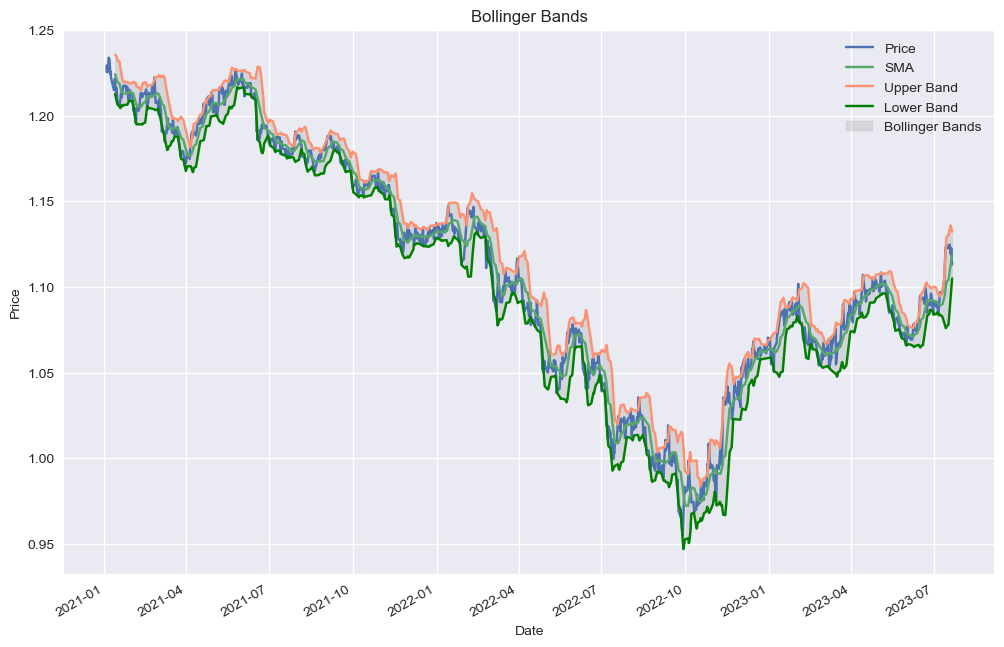

In [129]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Price and SMA
data[["Price", "SMA"]].plot(ax=ax)


# Plot Upper and Lower Bands as lines for July 2021
ax.plot(data.index, data["Upper"], color='#fc9272', label='Upper Band')
ax.plot(data.index, data["Lower"], color='green', label='Lower Band')


# Plot Upper and Lower Bands with fill_between
ax.fill_between(data.index, data["Lower"], data["Upper"], color='gray', alpha=0.2, label='Bollinger Bands')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Bollinger Bands')
ax.legend()

plt.show()

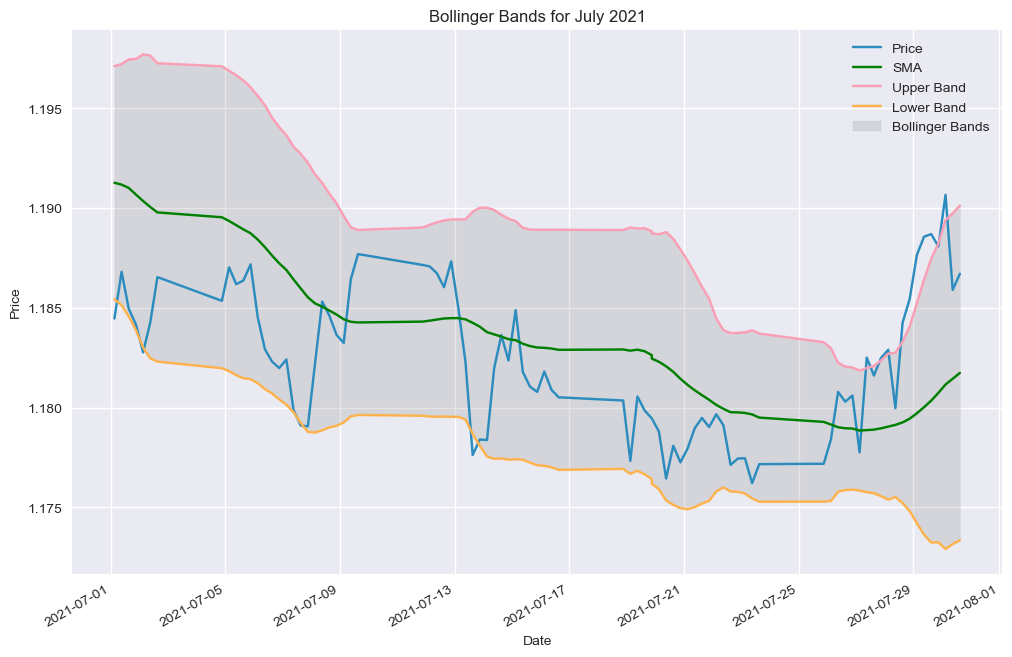

In [130]:
# Filter data for July 2021
data_month = data.loc["2021-07"]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Price and SMA for July 2021 on the primary y-axis
data_month[["Price", "SMA"]].plot(ax=ax, color=['#2b8cbe', 'green'])

# Plot Upper and Lower Bands as lines for July 2021
ax.plot(data_month.index, data_month["Upper"], color='#fa9fb5', label='Upper Band')
ax.plot(data_month.index, data_month["Lower"], color='#feb24c', label='Lower Band')


# Plot Upper and Lower Bands with fill_between for July 2021
ax.fill_between(data_month.index, data_month["Lower"], data_month["Upper"], color='gray', alpha=0.2, label='Bollinger Bands')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Bollinger Bands for July 2021')
ax.legend()

plt.show()

#### Defining the Mean-Reversion Bollinger Bands Strategy

In [131]:
data.dropna(inplace=True)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2658 entries, 2021-01-13 04:00:00 to 2023-07-20 21:00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    2658 non-null   float64
 1   returns  2658 non-null   float64
 2   SMA      2658 non-null   float64
 3   Lower    2658 non-null   float64
 4   Upper    2658 non-null   float64
dtypes: float64(5)
memory usage: 124.6 KB


In [133]:
# helper column
data["distance"] = data.Price - data.SMA

In [134]:
# if position is 1 then the forex is oversold which means we should go long or buy more forex
data["position"] = np.where(data.Price < data.Lower, 1 , np.nan)

In [135]:
# if position is -1 then the forex is overbought which means we should go short or sell forex
data["position"] = np.where(data.Price > data.Upper, -1 , data["position"])

In [136]:
# Middle band that is we go neutral no change in the trading strategy middle band is crossing SMA\

data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [137]:
data["position"] = data.position.ffill().fillna(0)

In [138]:
data.position.value_counts()

0.0000     1282
1.0000      750
-1.0000     626
Name: position, dtype: int64

/var/folders/xz/kv14_q0j6zjd09_t5rsqn1l80000gn/T/ipykernel_31624/3667109661.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(data_july.index, data_july["position"], 'ro', markersize=6, label='Positions', color = "#fc9272")


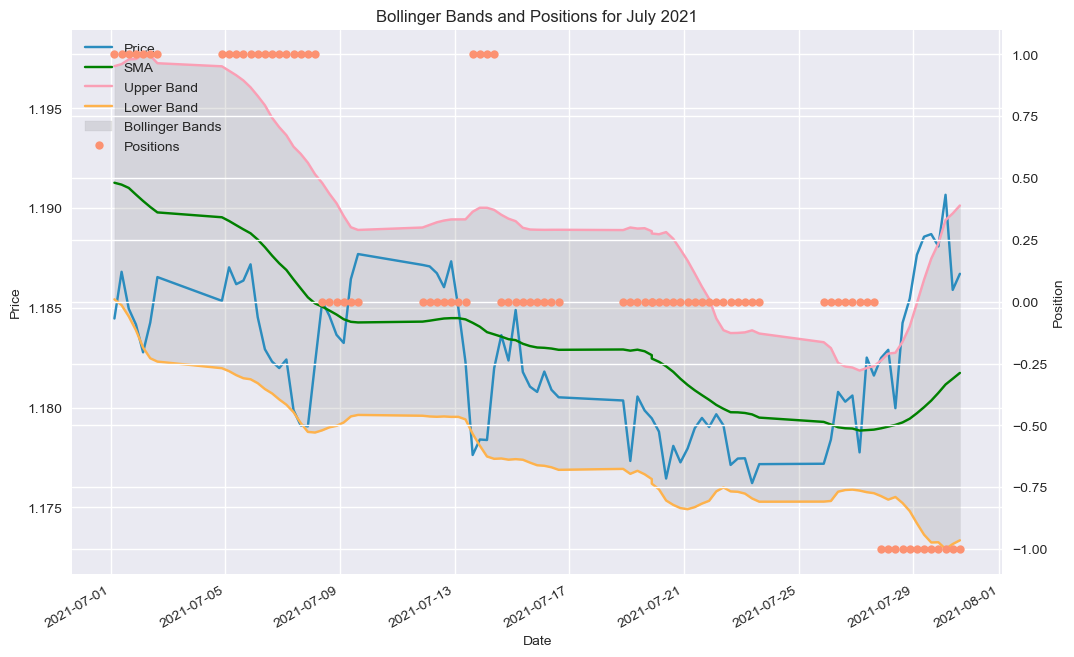

In [139]:
# Filter data for July 2021
data_july = data.loc["2021-07"]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Price and SMA for July 2021 on the primary y-axis
data_july[["Price", "SMA"]].plot(ax=ax1, color=['#2b8cbe', 'green'])

# Plot Upper and Lower Bands as lines for July 2021
ax1.plot(data_july.index, data_july["Upper"], color='#fa9fb5', label='Upper Band')
ax1.plot(data_july.index, data_july["Lower"], color='#feb24c', label='Lower Band')

# Fill the region between the bands with color
ax1.fill_between(data_july.index, data_july["Lower"], data_july["Upper"], color='gray', alpha=0.2, label='Bollinger Bands')

# Create a secondary y-axis for positions
ax2 = ax1.twinx()
ax2.plot(data_july.index, data_july["position"], 'ro', markersize=6, label='Positions', color = "#fc9272")

ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('Position')
ax1.set_title('Bollinger Bands and Positions for July 2021')

# Combine the legends from both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

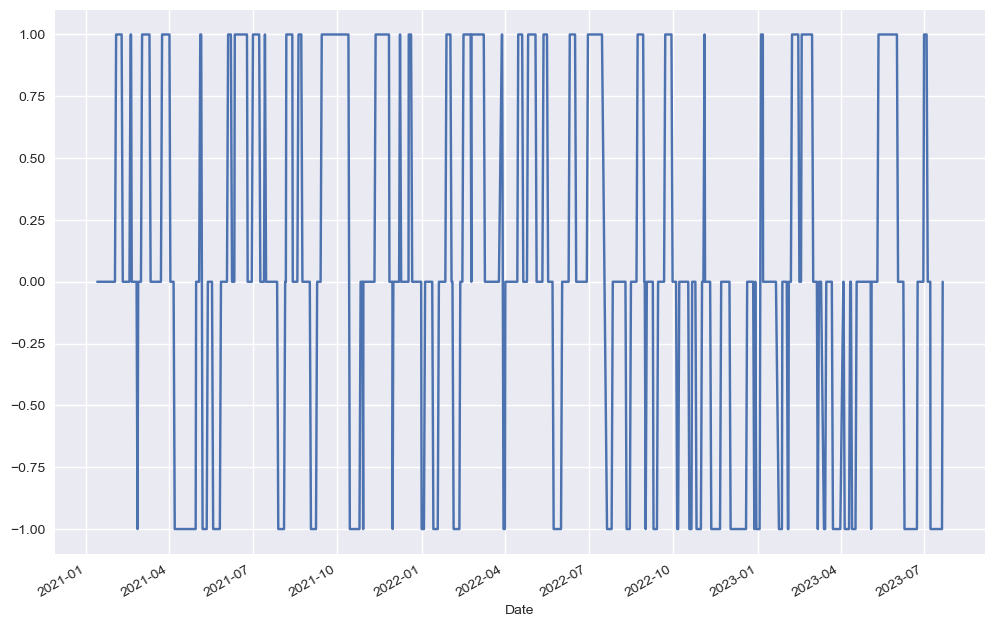

In [140]:
data.position.plot(figsize=(12,8))
plt.show()

#### Backtesting Bollinger Bands Strategy

In [141]:
data["strategy"] = data.position.shift(1) * data["returns"]
data.dropna(inplace = True)

In [142]:
data

Price  returns    SMA  Lower  Upper  distance  position  \
Date                                                                           
2021-01-13 10:00:00 1.2160  -0.0024 1.2238 1.2120 1.2357   -0.0079    0.0000   
2021-01-13 16:00:00 1.2158  -0.0001 1.2234 1.2114 1.2354   -0.0076    0.0000   
2021-01-13 22:00:00 1.2145  -0.0010 1.2230 1.2106 1.2353   -0.0084    0.0000   
2021-01-14 04:00:00 1.2166   0.0017 1.2227 1.2102 1.2352   -0.0060    0.0000   
2021-01-14 10:00:00 1.2136  -0.0025 1.2222 1.2094 1.2350   -0.0086    0.0000   
...                    ...      ...    ...    ...    ...       ...       ...   
2023-07-19 21:00:00 1.1225   0.0020 1.1165 1.0980 1.1350    0.0060   -1.0000   
2023-07-20 03:00:00 1.1208  -0.0015 1.1172 1.0997 1.1347    0.0036   -1.0000   
2023-07-20 09:00:00 1.1147  -0.0055 1.1176 1.1010 1.1342   -0.0029    0.0000   
2023-07-20 15:00:00 1.1130  -0.0015 1.1180 1.1027 1.1334   -0.0051    0.0000   
2023-07-20 21:00:00 1.1140   0.0009 1.1185 1.1049 1.1322   -0.0046    0.0000   

                     strategy  
Date                           
2021-01-13 10:00:00   -0.0000  
2021-01-13 16:00:00   -0.0000  
2021-01-13 22:00:00   -0.0000  
2021-01-14 04:00:00    0.0000  
2021-01-14 10:00:00   -0.0000  
...                       ...  
2023-07-19 21:00:00   -0.0020  
2023-07-20 03:00:00    0.0015  
2023-07-20 09:00:00    0.0055  
2023-07-20 15:00:00   -0.0000  
2023-07-20 21:00:00    0.0000  

[2657 rows x 8 columns]

In [143]:
data["cummulative_return"] = data["returns"].cumsum().apply(np.exp)
data["cummulative_strategy"] = data["strategy"].cumsum().apply(np.exp)

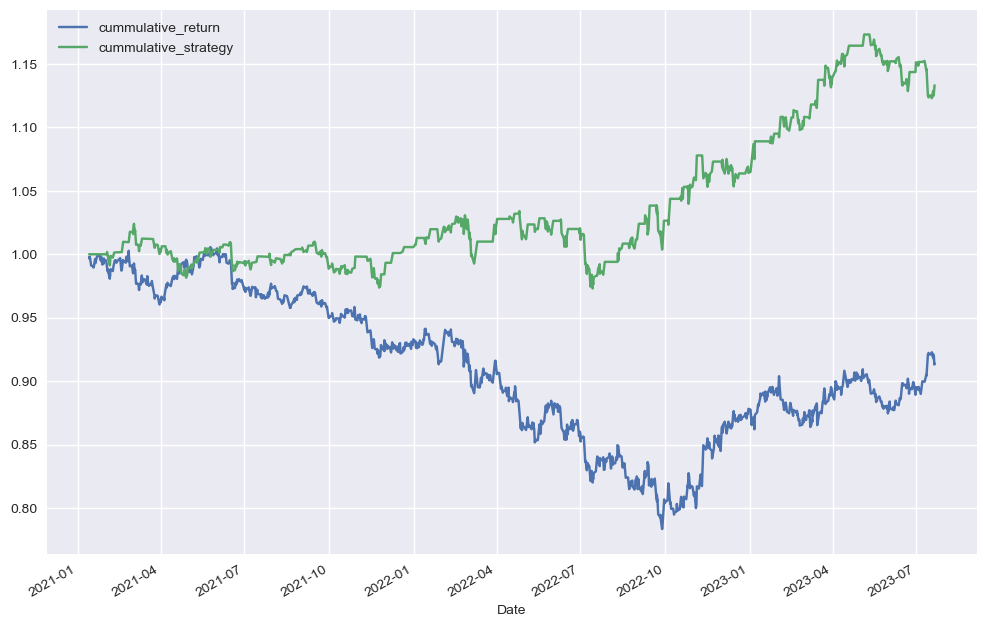

In [144]:
data[["cummulative_return","cummulative_strategy"]].plot(figsize=(12,8))
plt.show()

In [145]:
ptc = 0.00007

In [146]:
data["trades"] = data.position.diff().fillna(0).abs()

In [147]:
data

Price  returns    SMA  Lower  Upper  distance  position  \
Date                                                                           
2021-01-13 10:00:00 1.2160  -0.0024 1.2238 1.2120 1.2357   -0.0079    0.0000   
2021-01-13 16:00:00 1.2158  -0.0001 1.2234 1.2114 1.2354   -0.0076    0.0000   
2021-01-13 22:00:00 1.2145  -0.0010 1.2230 1.2106 1.2353   -0.0084    0.0000   
2021-01-14 04:00:00 1.2166   0.0017 1.2227 1.2102 1.2352   -0.0060    0.0000   
2021-01-14 10:00:00 1.2136  -0.0025 1.2222 1.2094 1.2350   -0.0086    0.0000   
...                    ...      ...    ...    ...    ...       ...       ...   
2023-07-19 21:00:00 1.1225   0.0020 1.1165 1.0980 1.1350    0.0060   -1.0000   
2023-07-20 03:00:00 1.1208  -0.0015 1.1172 1.0997 1.1347    0.0036   -1.0000   
2023-07-20 09:00:00 1.1147  -0.0055 1.1176 1.1010 1.1342   -0.0029    0.0000   
2023-07-20 15:00:00 1.1130  -0.0015 1.1180 1.1027 1.1334   -0.0051    0.0000   
2023-07-20 21:00:00 1.1140   0.0009 1.1185 1.1049 1.1322   -0.0046    0.0000   

                     strategy  cummulative_return  cummulative_strategy  \
Date                                                                      
2021-01-13 10:00:00   -0.0000              0.9976                1.0000   
2021-01-13 16:00:00   -0.0000              0.9974                1.0000   
2021-01-13 22:00:00   -0.0000              0.9964                1.0000   
2021-01-14 04:00:00    0.0000              0.9981                1.0000   
2021-01-14 10:00:00   -0.0000              0.9956                1.0000   
...                       ...                 ...                   ...   
2023-07-19 21:00:00   -0.0020              0.9209                1.1253   
2023-07-20 03:00:00    0.0015              0.9195                1.1270   
2023-07-20 09:00:00    0.0055              0.9145                1.1332   
2023-07-20 15:00:00   -0.0000              0.9131                1.1332   
2023-07-20 21:00:00    0.0000              0.9139                1.1332   

                     trades  
Date                         
2021-01-13 10:00:00  0.0000  
2021-01-13 16:00:00  0.0000  
2021-01-13 22:00:00  0.0000  
2021-01-14 04:00:00  0.0000  
2021-01-14 10:00:00  0.0000  
...                     ...  
2023-07-19 21:00:00  0.0000  
2023-07-20 03:00:00  0.0000  
2023-07-20 09:00:00  1.0000  
2023-07-20 15:00:00  0.0000  
2023-07-20 21:00:00  0.0000  

[2657 rows x 11 columns]

In [148]:
data.trades.value_counts()

0.0000    2523
1.0000     134
Name: trades, dtype: int64

In [149]:
data["strategy_net"] = data.strategy - data.trades * ptc
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [150]:
data

Price  returns    SMA  Lower  Upper  distance  position  \
Date                                                                           
2021-01-13 10:00:00 1.2160  -0.0024 1.2238 1.2120 1.2357   -0.0079    0.0000   
2021-01-13 16:00:00 1.2158  -0.0001 1.2234 1.2114 1.2354   -0.0076    0.0000   
2021-01-13 22:00:00 1.2145  -0.0010 1.2230 1.2106 1.2353   -0.0084    0.0000   
2021-01-14 04:00:00 1.2166   0.0017 1.2227 1.2102 1.2352   -0.0060    0.0000   
2021-01-14 10:00:00 1.2136  -0.0025 1.2222 1.2094 1.2350   -0.0086    0.0000   
...                    ...      ...    ...    ...    ...       ...       ...   
2023-07-19 21:00:00 1.1225   0.0020 1.1165 1.0980 1.1350    0.0060   -1.0000   
2023-07-20 03:00:00 1.1208  -0.0015 1.1172 1.0997 1.1347    0.0036   -1.0000   
2023-07-20 09:00:00 1.1147  -0.0055 1.1176 1.1010 1.1342   -0.0029    0.0000   
2023-07-20 15:00:00 1.1130  -0.0015 1.1180 1.1027 1.1334   -0.0051    0.0000   
2023-07-20 21:00:00 1.1140   0.0009 1.1185 1.1049 1.1322   -0.0046    0.0000   

                     strategy  cummulative_return  cummulative_strategy  \
Date                                                                      
2021-01-13 10:00:00   -0.0000              0.9976                1.0000   
2021-01-13 16:00:00   -0.0000              0.9974                1.0000   
2021-01-13 22:00:00   -0.0000              0.9964                1.0000   
2021-01-14 04:00:00    0.0000              0.9981                1.0000   
2021-01-14 10:00:00   -0.0000              0.9956                1.0000   
...                       ...                 ...                   ...   
2023-07-19 21:00:00   -0.0020              0.9209                1.1253   
2023-07-20 03:00:00    0.0015              0.9195                1.1270   
2023-07-20 09:00:00    0.0055              0.9145                1.1332   
2023-07-20 15:00:00   -0.0000              0.9131                1.1332   
2023-07-20 21:00:00    0.0000              0.9139                1.1332   

                     trades  strategy_net  cstrategy_net  
Date                                                      
2021-01-13 10:00:00  0.0000       -0.0000         1.0000  
2021-01-13 16:00:00  0.0000       -0.0000         1.0000  
2021-01-13 22:00:00  0.0000       -0.0000         1.0000  
2021-01-14 04:00:00  0.0000        0.0000         1.0000  
2021-01-14 10:00:00  0.0000       -0.0000         1.0000  
...                     ...           ...            ...  
2023-07-19 21:00:00  0.0000       -0.0020         1.1149  
2023-07-20 03:00:00  0.0000        0.0015         1.1166  
2023-07-20 09:00:00  1.0000        0.0054         1.1227  
2023-07-20 15:00:00  0.0000       -0.0000         1.1227  
2023-07-20 21:00:00  0.0000        0.0000         1.1227  

[2657 rows x 13 columns]

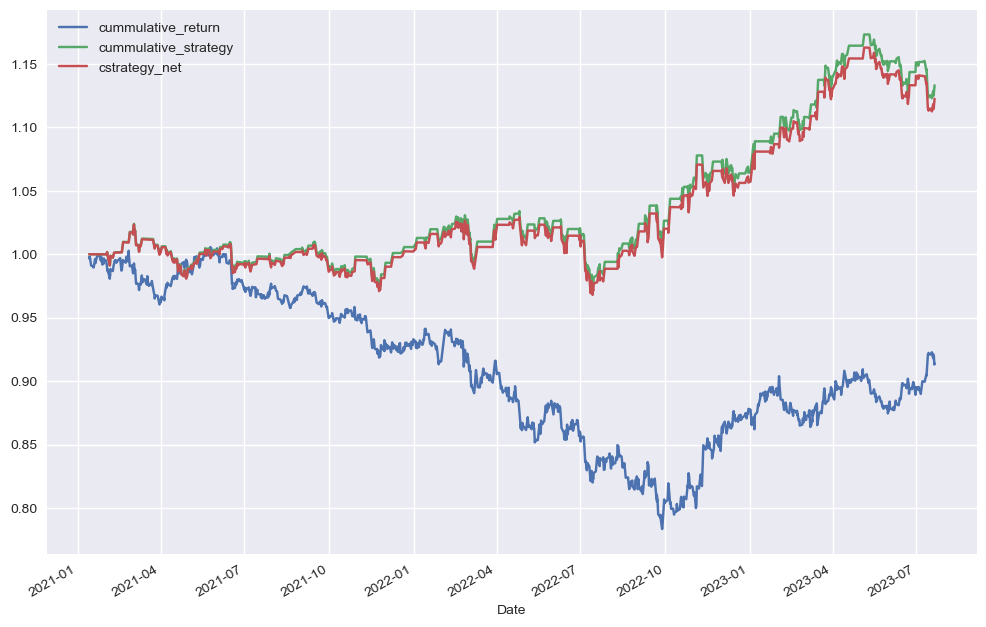

In [151]:
data[["cummulative_return", "cummulative_strategy","cstrategy_net"]].plot(figsize = (12,8))
plt.show()

In [152]:
# annualized return
data[["returns","strategy_net"]].mean() * (4 * 252)

returns        -0.0342
strategy_net    0.0439
dtype: float64

In [153]:
# annualized risk
data[["returns","strategy_net"]].std() * np.sqrt(4 * 252)

returns        0.0814
strategy_net   0.0598
dtype: float64

from the above data I can say that if I use Bollinger Bands Strategy I will have high return with low risk as compare to without using any strategy

In [154]:
class MeanRevBacktester():
    ''' Class for the vectorized backtesting of Mean Reversion-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA: int
        time window for SMA
    dev: int
        distance for Lower/Upper Bands in Standard Deviation units
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new parameters for SMA and dev
        
    test_strategy:
        runs the backtest for the Mean Reversion-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two parameters
    '''
    
    def __init__(self, symbol, SMA, dev, start, end, tc, filename):
        self.symbol = symbol
        self.SMA = SMA
        self.dev = dev
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.filename = filename
        self.get_data()
        
    def __repr__(self):
        rep = "MeanRevBacktester(symbol = {}, SMA = {}, dev = {}, start = {}, end = {})"
        return rep.format(self.symbol, self.SMA, self.dev, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv(filename, parse_dates = ["Date"], index_col = "Date")
        raw = raw.drop(['Unnamed: 0'], axis=1)
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "Price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA"] = raw["Price"].rolling(self.SMA).mean()
        raw["Lower"] = raw["SMA"] - raw["Price"].rolling(self.SMA).std() * self.dev
        raw["Upper"] = raw["SMA"] + raw["Price"].rolling(self.SMA).std() * self.dev
        self.data = raw
        return raw
        
    def set_parameters(self, SMA = None, dev = None):
        ''' Updates parameters and resp. time series.
        '''
        if SMA is not None:
            self.SMA = SMA
            self.data["SMA"] = self.data["Price"].rolling(self.SMA).mean()
            self.data["Lower"] = self.data["SMA"] - self.data["Price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["Price"].rolling(self.SMA).std() * self.dev
            
        if dev is not None:
            self.dev = dev
            self.data["Lower"] = self.data["SMA"] - self.data["Price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["Price"].rolling(self.SMA).std() * self.dev
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["distance"] = data.Price - data.SMA
        data["position"] = np.where(data.Price < data.Lower, 1, np.nan)
        data["position"] = np.where(data.Price > data.Upper, -1, data["position"])
        data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])
        data["position"] = data.position.ffill().fillna(0)
        data["strategy"] = data.position.shift(1) * data["returns"]
        data.dropna(inplace = True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA = {} | dev = {} | TC = {}".format(self.symbol, self.SMA, self.dev, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
            fig, ax = plt.subplots(figsize=(12, 8))

            # Plot Price and SMA
            data[["Price", "SMA"]].plot(ax=ax)


            # Plot Upper and Lower Bands as lines for July 2021
            ax.plot(data.index, data["Upper"], color='#fc9272', label='Upper Band')
            ax.plot(data.index, data["Lower"], color='green', label='Lower Band')


            # Plot Upper and Lower Bands with fill_between
            ax.fill_between(data.index, data["Lower"], data["Upper"], color='gray', alpha=0.2, label='Bollinger Bands')
            
            ax.set_xlabel('Date')
            ax.set_ylabel('Price')
            ax.set_title('Bollinger Bands')
            ax.legend()

            plt.show()
        
    def update_and_run(self, boll):
        ''' Updates parameters and returns the negative absolute performance (for minimazation algorithm).

        Parameters
        ==========
        Params: tuple
            parameter tuple with SMA and dist
        '''
        self.set_parameters(int(boll[0]), int(boll[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA_range, dev_range):
        ''' Finds global maximum given the parameter ranges.

        Parameters
        ==========
        SMA_range, dist_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA_range, dev_range), finish=None)
        return opt, -self.update_and_run(opt)


In [155]:
tester = MeanRevBacktester("EUR/USD", 30, 2, "2021-01-01","2023-07-21",0.00007, "intraday.csv")

In [156]:
tester

MeanRevBacktester(symbol = EUR/USD, SMA = 30, dev = 2, start = 2021-01-01, end = 2023-07-21)

In [157]:
tester.test_strategy()

(1.072597, 0.15465)

In [158]:
tester.results

Price  returns    SMA  Lower  Upper  distance  position  strategy  \
Date                                                                            
2021-02-14 1.2127   0.0006 1.2132 1.1975 1.2288   -0.0005    0.0000    0.0000   
2021-02-15 1.2104  -0.0019 1.2125 1.1982 1.2268   -0.0021    0.0000   -0.0000   
2021-02-16 1.2039  -0.0054 1.2116 1.1990 1.2241   -0.0076    0.0000   -0.0000   
2021-02-17 1.2092   0.0044 1.2110 1.1998 1.2222   -0.0018    0.0000    0.0000   
2021-02-18 1.2117   0.0021 1.2106 1.2002 1.2211    0.0011    0.0000    0.0000   
...           ...      ...    ...    ...    ...       ...       ...       ...   
2023-07-16 1.1239   0.0013 1.0924 1.0644 1.1204    0.0315   -1.0000   -0.0013   
2023-07-17 1.1227  -0.0010 1.0942 1.0655 1.1229    0.0285   -1.0000    0.0010   
2023-07-18 1.1202  -0.0023 1.0959 1.0672 1.1246    0.0243   -1.0000    0.0023   
2023-07-19 1.1129  -0.0065 1.0971 1.0686 1.1256    0.0158   -1.0000    0.0065   
2023-07-20 1.1125  -0.0004 1.0983 1.0706 1.1261    0.0141   -1.0000    0.0004   

            trades  creturns  cstrategy  
Date                                     
2021-02-14  0.0000    1.0006     1.0000  
2021-02-15  0.0000    0.9987     1.0000  
2021-02-16  0.0000    0.9934     1.0000  
2021-02-17  0.0000    0.9978     1.0000  
2021-02-18  0.0000    0.9999     1.0000  
...            ...       ...        ...  
2023-07-16  0.0000    0.9274     1.0617  
2023-07-17  0.0000    0.9264     1.0628  
2023-07-18  0.0000    0.9243     1.0652  
2023-07-19  0.0000    0.9183     1.0722  
2023-07-20  0.0000    0.9179     1.0726  

[634 rows x 11 columns]

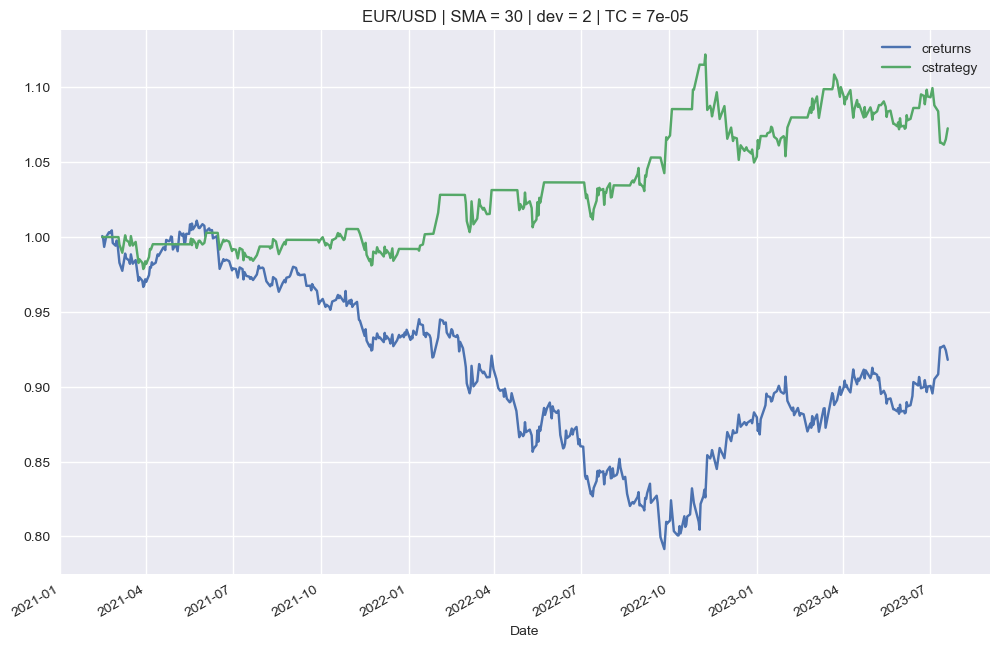

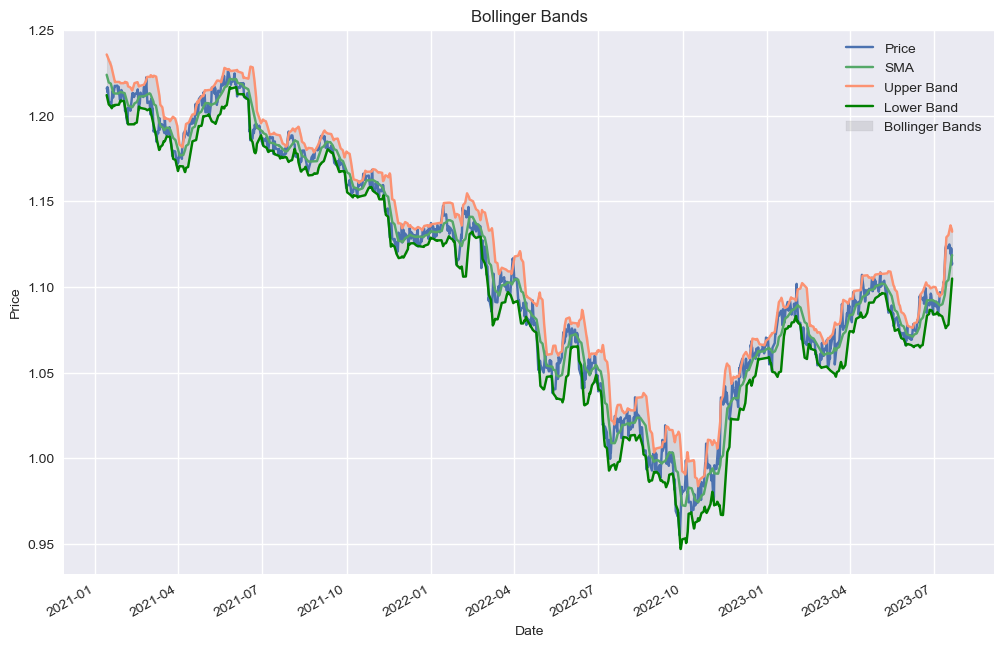

In [159]:
tester.plot_results()

In [160]:
tester.optimize_parameters((25,100,1),(1,5,1))

(array([31.,  2.]), 1.108973)

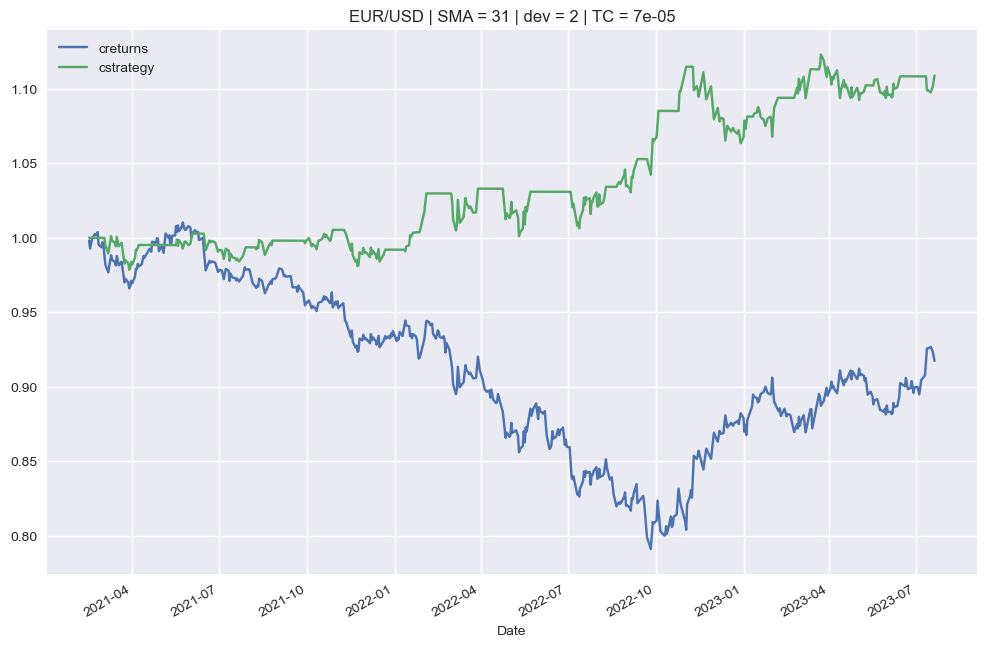

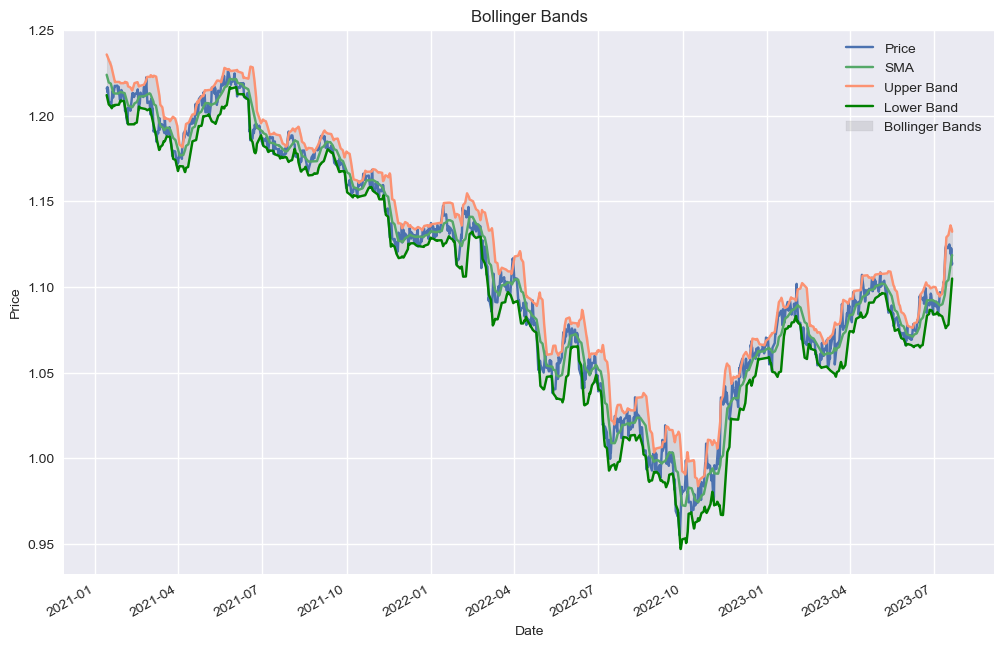

In [161]:
tester.plot_results()

In [162]:
tester.results

Price  returns    SMA  Lower  Upper  distance  position  strategy  \
Date                                                                            
2021-02-15 1.2104  -0.0019 1.2131 1.1977 1.2284   -0.0027    0.0000   -0.0000   
2021-02-16 1.2039  -0.0054 1.2122 1.1978 1.2267   -0.0083    0.0000   -0.0000   
2021-02-17 1.2092   0.0044 1.2115 1.1991 1.2239   -0.0023    0.0000    0.0000   
2021-02-18 1.2117   0.0021 1.2110 1.2000 1.2220    0.0007    0.0000    0.0000   
2021-02-21 1.2157   0.0033 1.2108 1.2004 1.2212    0.0049    0.0000    0.0000   
...           ...      ...    ...    ...    ...       ...       ...       ...   
2023-07-16 1.1239   0.0013 1.0917 1.0632 1.1203    0.0321   -1.0000   -0.0013   
2023-07-17 1.1227  -0.0010 1.0934 1.0638 1.1230    0.0293   -1.0000    0.0010   
2023-07-18 1.1202  -0.0023 1.0951 1.0654 1.1248    0.0251   -1.0000    0.0023   
2023-07-19 1.1129  -0.0065 1.0965 1.0676 1.1253    0.0165   -1.0000    0.0065   
2023-07-20 1.1125  -0.0004 1.0976 1.0690 1.1261    0.0149   -1.0000    0.0004   

            trades  creturns  cstrategy  
Date                                     
2021-02-15  0.0000    0.9981     1.0000  
2021-02-16  0.0000    0.9928     1.0000  
2021-02-17  0.0000    0.9971     1.0000  
2021-02-18  0.0000    0.9992     1.0000  
2021-02-21  0.0000    1.0025     1.0000  
...            ...       ...        ...  
2023-07-16  0.0000    0.9268     1.0977  
2023-07-17  0.0000    0.9258     1.0988  
2023-07-18  0.0000    0.9237     1.1013  
2023-07-19  0.0000    0.9177     1.1085  
2023-07-20  0.0000    0.9174     1.1090  

[633 rows x 11 columns]

#### Forward test the strategy to optimize the data

In [163]:
filename = "intraday.csv"
strategy_train = MeanRevBacktester("EUR/USD", 30, 2, "2021-01-01","2021-12-31", 0.00007, filename)

In [164]:
strategy_train.optimize_parameters((25,100,1),(1,5,1))

(array([36.,  1.]), 1.036494)

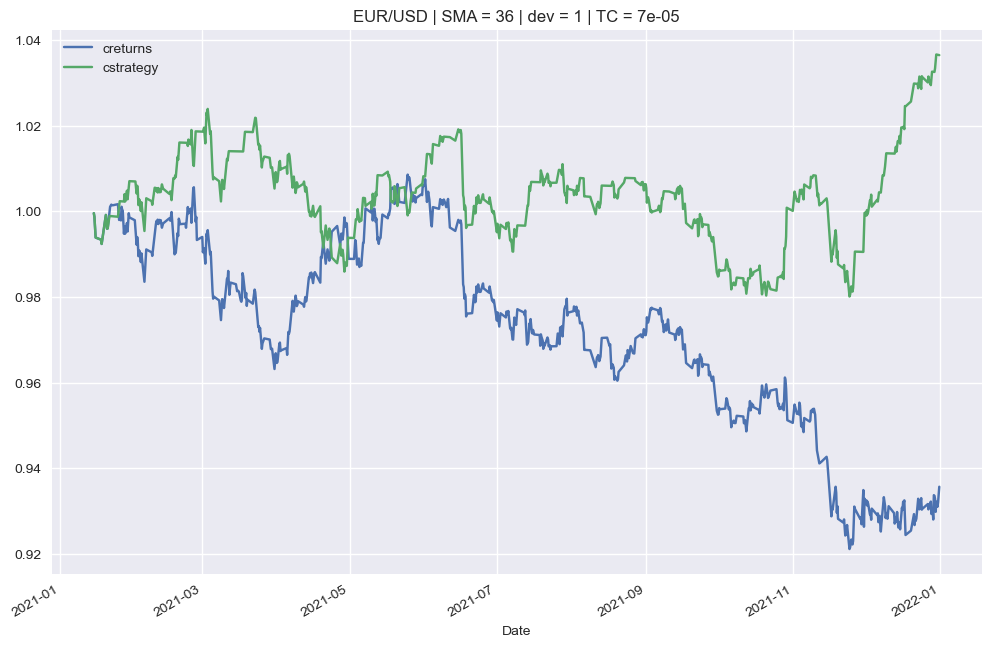

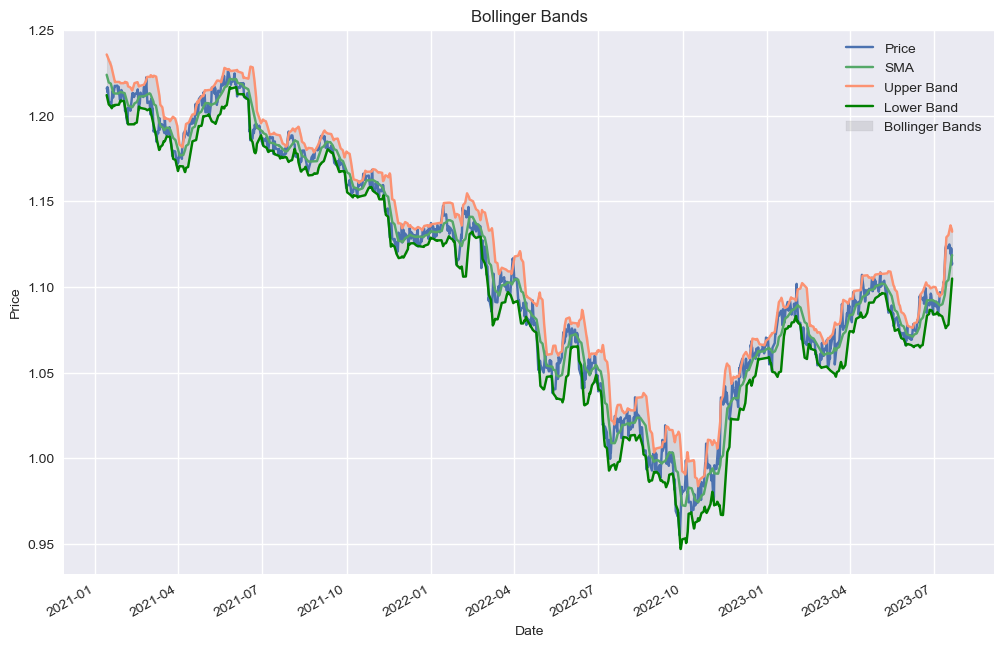

In [165]:
# in-sample
strategy_train.plot_results()

In [166]:
# out-sample
tester = MeanRevBacktester("EUR/USD",32,1,"2022-01-01","2023-07-21",0.00007,filename)

In [167]:
tester.test_strategy()

(1.0696, 0.095931)

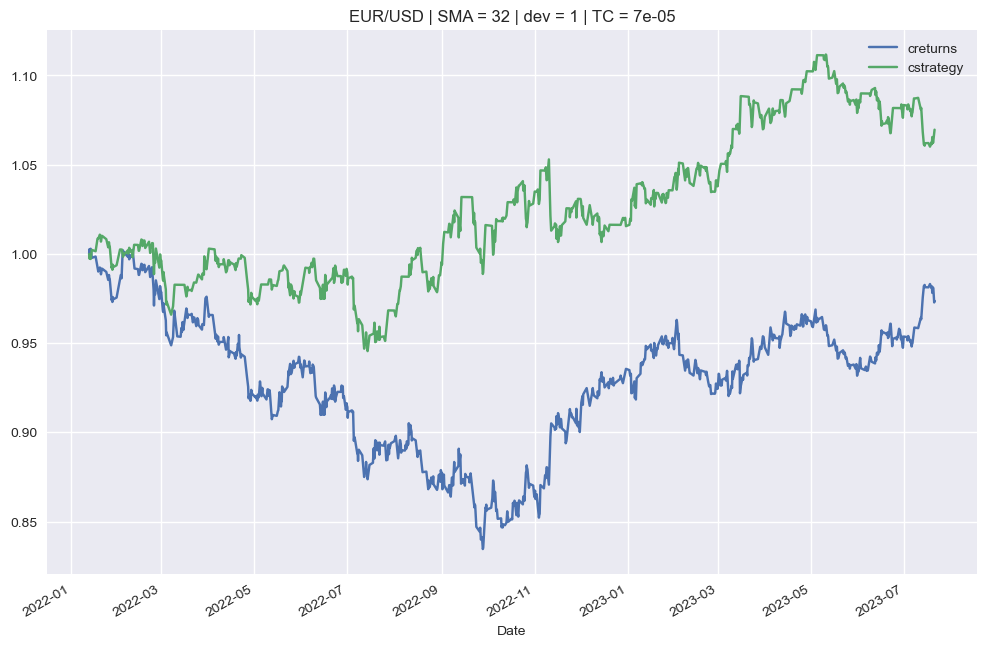

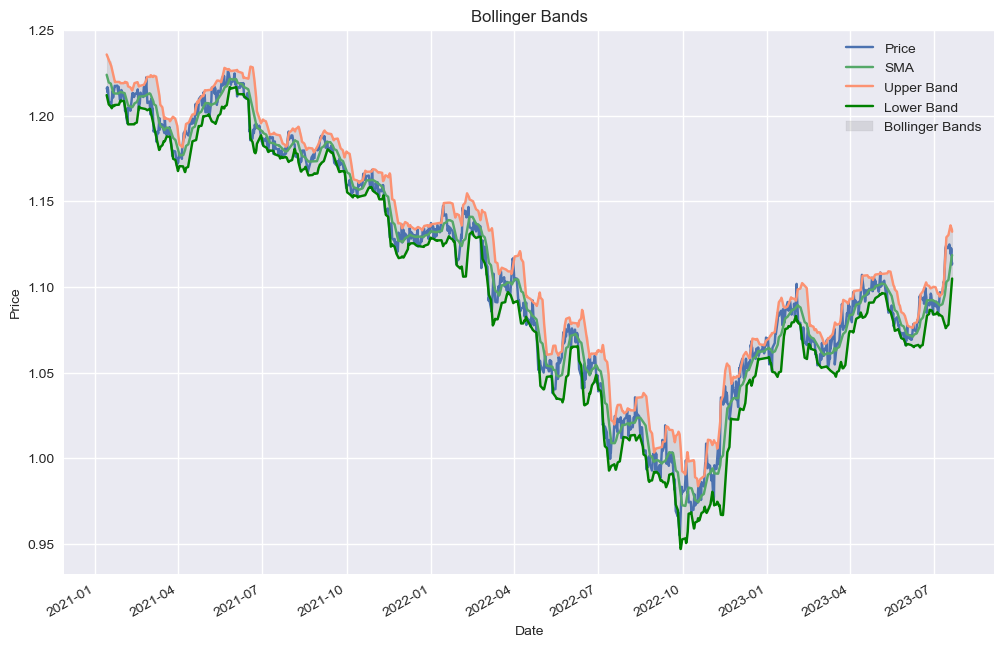

In [168]:
tester.plot_results()

### Combining two Strategies

In [169]:
start = "2021-01-01"
end = "2023-07-31"
sma_s = 50
sma_l = 150
trading_cost = 0.00007
filename = "twenty_minute.csv"

In [170]:
tester = SMABacktester("EURUSD",sma_s,sma_l,start,end,trading_cost,filename)
tester

SMABacktester(symbol = EURUSD, SMA_S = 50, SMA_L = 150, start = 2021-01-01, end = 2023-07-31)

In [171]:
tester.data

Price  returns  SMA_S  SMA_L
Date                                                   
2021-01-03 22:00:00+00:00 1.2233      NaN    NaN    NaN
2021-01-03 22:15:00+00:00 1.2239   0.0004    NaN    NaN
2021-01-03 22:30:00+00:00 1.2235  -0.0003    NaN    NaN
2021-01-03 22:45:00+00:00 1.2234  -0.0000    NaN    NaN
2021-01-03 23:00:00+00:00 1.2240   0.0004    NaN    NaN
...                          ...      ...    ...    ...
2023-07-30 22:45:00+00:00 1.1027   0.0001 1.1020 1.1007
2023-07-30 23:00:00+00:00 1.1027  -0.0000 1.1021 1.1007
2023-07-30 23:15:00+00:00 1.1025  -0.0001 1.1022 1.1006
2023-07-30 23:30:00+00:00 1.1027   0.0001 1.1022 1.1005
2023-07-30 23:45:00+00:00 1.1024  -0.0002 1.1022 1.1004

[64188 rows x 4 columns]

In [172]:
tester.test_strategy()

(0.84118, -0.056302)

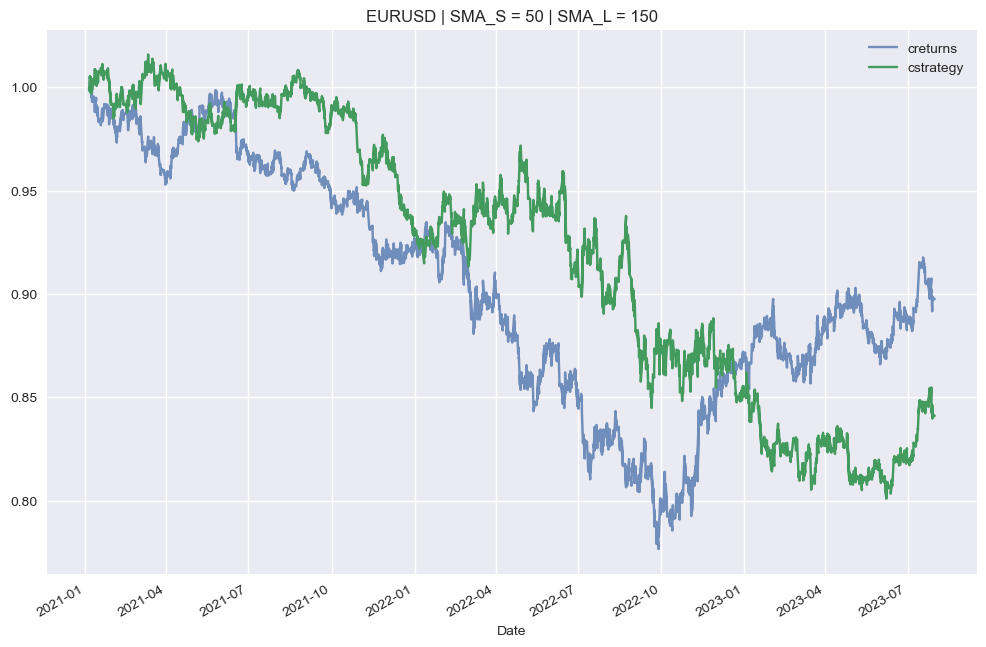

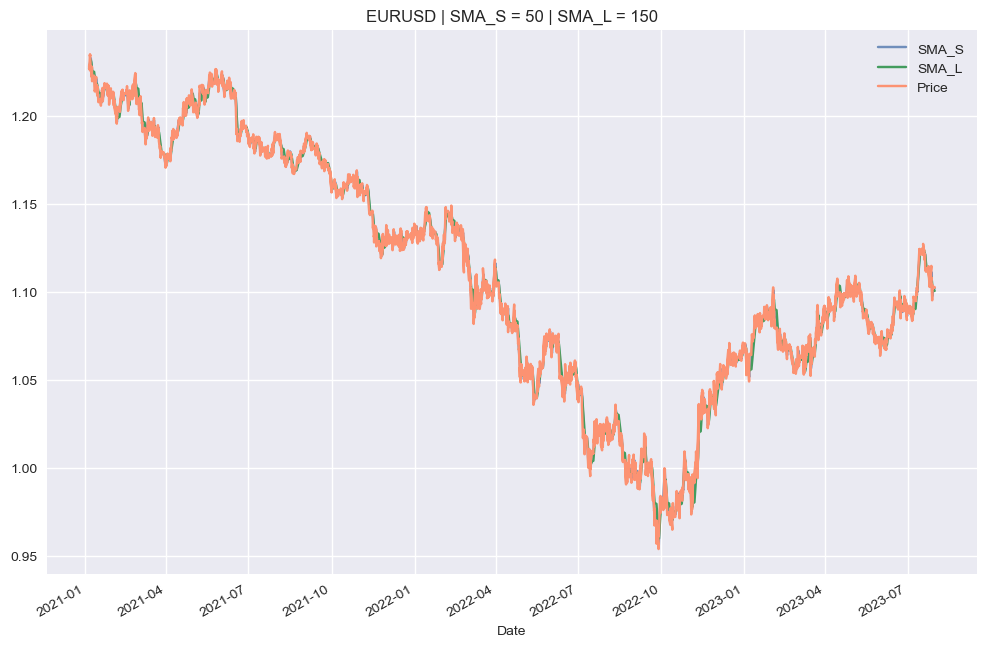

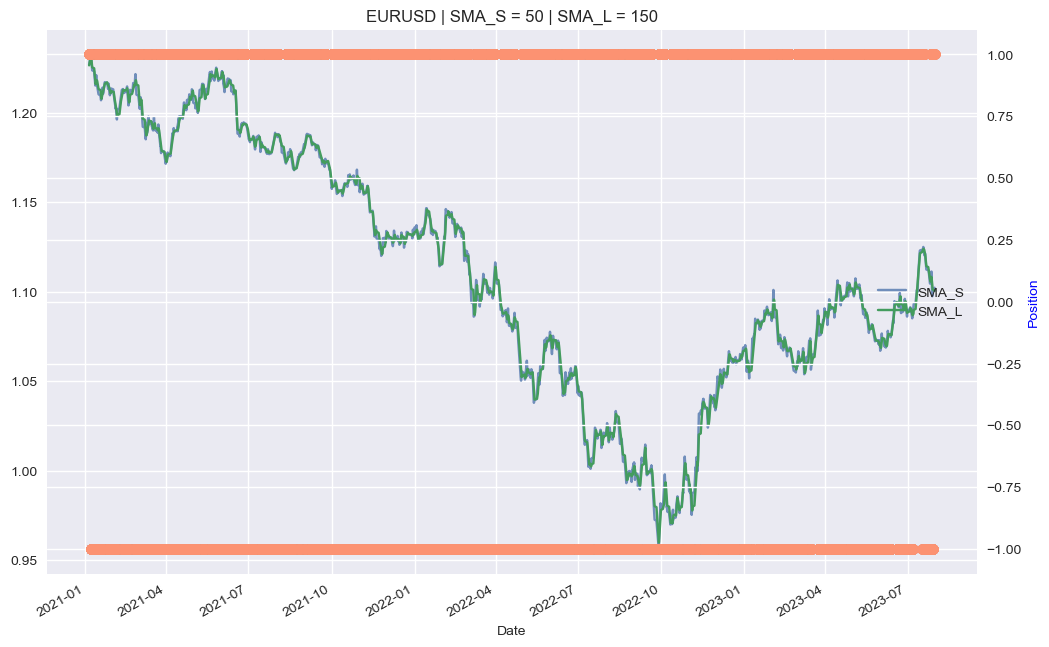

In [173]:
tester.plot_results()

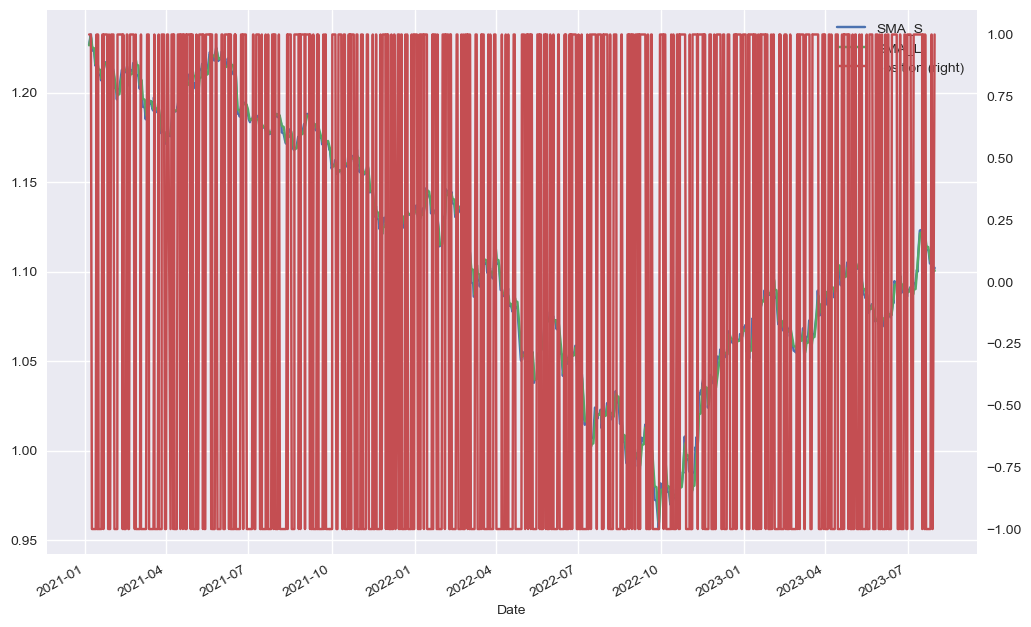

In [174]:
tester.results[["SMA_S","SMA_L","position"]].plot(secondary_y = "position", figsize = (12,8))
plt.show()

In [175]:
tester.results

Price  returns  SMA_S  SMA_L  position  strategy  \
Date                                                                          
2021-01-05 11:30:00+00:00 1.2283   0.0000 1.2268 1.2265         1    0.0000   
2021-01-05 11:45:00+00:00 1.2283  -0.0000 1.2269 1.2265         1   -0.0000   
2021-01-05 12:00:00+00:00 1.2278  -0.0004 1.2269 1.2266         1   -0.0004   
2021-01-05 12:15:00+00:00 1.2272  -0.0005 1.2270 1.2266         1   -0.0005   
2021-01-05 12:30:00+00:00 1.2271  -0.0000 1.2270 1.2266         1   -0.0000   
...                          ...      ...    ...    ...       ...       ...   
2023-07-30 22:45:00+00:00 1.1027   0.0001 1.1020 1.1007         1    0.0001   
2023-07-30 23:00:00+00:00 1.1027  -0.0000 1.1021 1.1007         1   -0.0000   
2023-07-30 23:15:00+00:00 1.1025  -0.0001 1.1022 1.1006         1   -0.0001   
2023-07-30 23:30:00+00:00 1.1027   0.0001 1.1022 1.1005         1    0.0001   
2023-07-30 23:45:00+00:00 1.1024  -0.0002 1.1022 1.1004         1   -0.0002   

                           trades  creturns  cstrategy  
Date                                                    
2021-01-05 11:30:00+00:00  0.0000    1.0000     1.0000  
2021-01-05 11:45:00+00:00  0.0000    1.0000     1.0000  
2021-01-05 12:00:00+00:00  0.0000    0.9996     0.9996  
2021-01-05 12:15:00+00:00  0.0000    0.9991     0.9991  
2021-01-05 12:30:00+00:00  0.0000    0.9990     0.9990  
...                           ...       ...        ...  
2023-07-30 22:45:00+00:00  0.0000    0.8978     0.8414  
2023-07-30 23:00:00+00:00  0.0000    0.8977     0.8414  
2023-07-30 23:15:00+00:00  0.0000    0.8976     0.8413  
2023-07-30 23:30:00+00:00  0.0000    0.8977     0.8414  
2023-07-30 23:45:00+00:00  0.0000    0.8975     0.8412  

[64038 rows x 9 columns]

In [176]:
tester.results.trades.value_counts()

0.0000    63544
2.0000      494
Name: trades, dtype: int64

In [177]:
sma = 75
dev = 3
tc = 0.00007

In [178]:
tester2 = MeanRevBacktester("EUR/USD", sma, dev, start, end,tc, filename)

In [179]:
tester2

MeanRevBacktester(symbol = EUR/USD, SMA = 75, dev = 3, start = 2021-01-01, end = 2023-07-31)

In [180]:
tester2.data

Price  returns    SMA  Lower  Upper
Date                                                          
2021-01-03 22:00:00+00:00 1.2233      NaN    NaN    NaN    NaN
2021-01-03 22:15:00+00:00 1.2239   0.0004    NaN    NaN    NaN
2021-01-03 22:30:00+00:00 1.2235  -0.0003    NaN    NaN    NaN
2021-01-03 22:45:00+00:00 1.2234  -0.0000    NaN    NaN    NaN
2021-01-03 23:00:00+00:00 1.2240   0.0004    NaN    NaN    NaN
...                          ...      ...    ...    ...    ...
2023-07-30 22:45:00+00:00 1.1027   0.0001 1.1003 1.0922 1.1083
2023-07-30 23:00:00+00:00 1.1027  -0.0000 1.1004 1.0924 1.1083
2023-07-30 23:15:00+00:00 1.1025  -0.0001 1.1005 1.0926 1.1083
2023-07-30 23:30:00+00:00 1.1027   0.0001 1.1005 1.0927 1.1084
2023-07-30 23:45:00+00:00 1.1024  -0.0002 1.1006 1.0928 1.1084

[64188 rows x 5 columns]

In [181]:
tester2.test_strategy()

(0.936958, 0.037987)

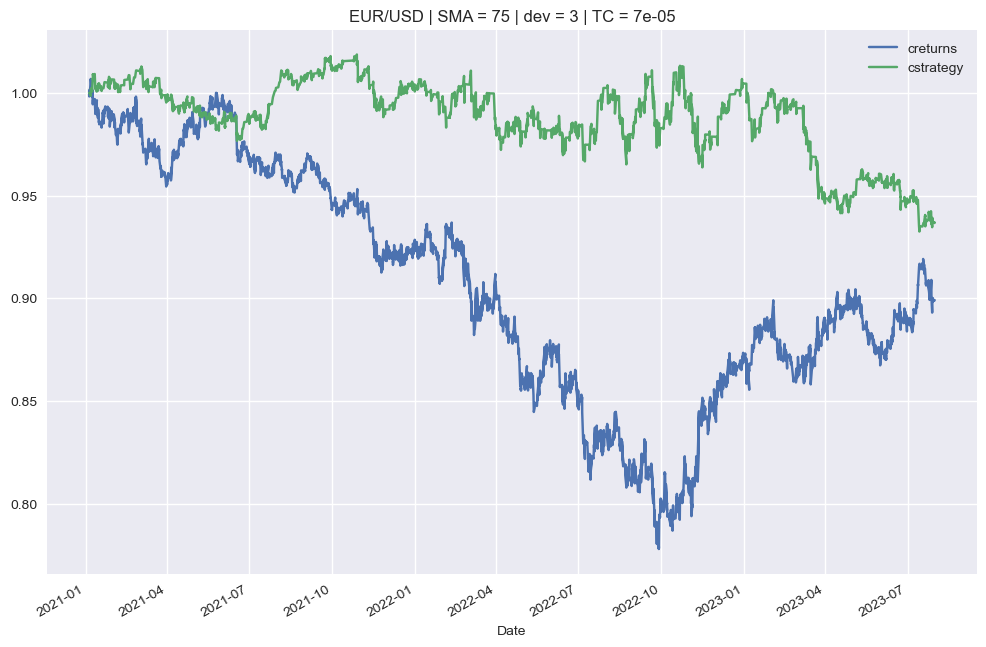

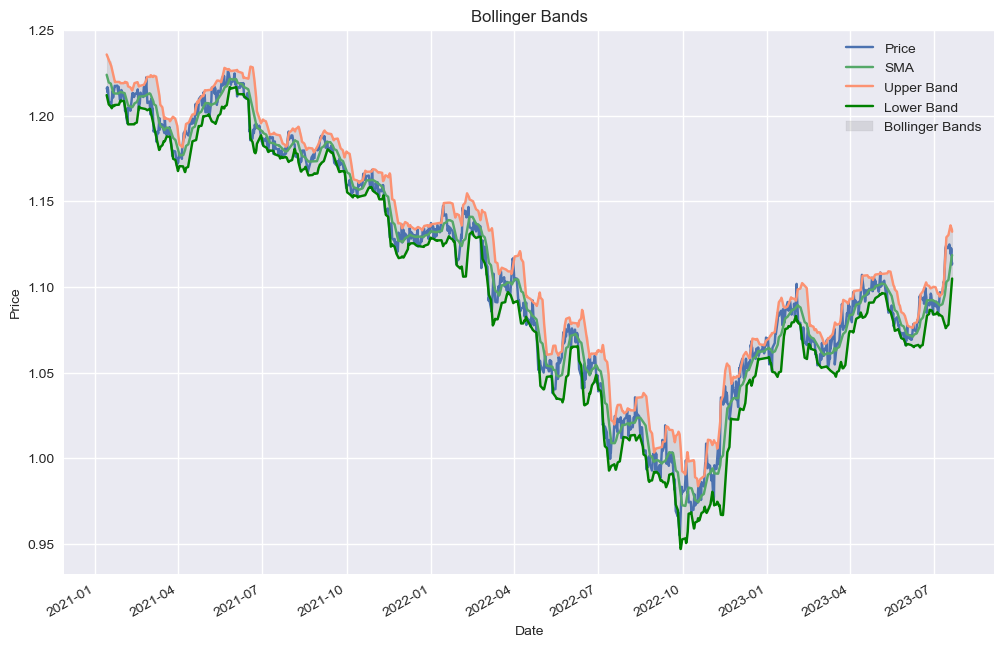

In [182]:
tester2.plot_results()

In [183]:
tester2.results

Price  returns    SMA  Lower  Upper  distance  \
Date                                                                       
2021-01-04 16:45:00+00:00 1.2254  -0.0007 1.2268 1.2203 1.2333   -0.0014   
2021-01-04 17:00:00+00:00 1.2253  -0.0001 1.2268 1.2203 1.2333   -0.0016   
2021-01-04 17:15:00+00:00 1.2259   0.0005 1.2268 1.2205 1.2332   -0.0009   
2021-01-04 17:30:00+00:00 1.2257  -0.0002 1.2269 1.2206 1.2332   -0.0012   
2021-01-04 17:45:00+00:00 1.2253  -0.0003 1.2269 1.2207 1.2331   -0.0016   
...                          ...      ...    ...    ...    ...       ...   
2023-07-30 22:45:00+00:00 1.1027   0.0001 1.1003 1.0922 1.1083    0.0024   
2023-07-30 23:00:00+00:00 1.1027  -0.0000 1.1004 1.0924 1.1083    0.0023   
2023-07-30 23:15:00+00:00 1.1025  -0.0001 1.1005 1.0926 1.1083    0.0021   
2023-07-30 23:30:00+00:00 1.1027   0.0001 1.1005 1.0927 1.1084    0.0021   
2023-07-30 23:45:00+00:00 1.1024  -0.0002 1.1006 1.0928 1.1084    0.0018   

                           position  strategy  trades  creturns  cstrategy  
Date                                                                        
2021-01-04 16:45:00+00:00    0.0000   -0.0000  0.0000    0.9993     1.0000  
2021-01-04 17:00:00+00:00    0.0000   -0.0000  0.0000    0.9992     1.0000  
2021-01-04 17:15:00+00:00    0.0000    0.0000  0.0000    0.9997     1.0000  
2021-01-04 17:30:00+00:00    0.0000   -0.0000  0.0000    0.9995     1.0000  
2021-01-04 17:45:00+00:00    0.0000   -0.0000  0.0000    0.9992     1.0000  
...                             ...       ...     ...       ...        ...  
2023-07-30 22:45:00+00:00   -1.0000   -0.0001  0.0000    0.8992     0.9367  
2023-07-30 23:00:00+00:00   -1.0000    0.0000  0.0000    0.8992     0.9367  
2023-07-30 23:15:00+00:00   -1.0000    0.0001  0.0000    0.8991     0.9368  
2023-07-30 23:30:00+00:00   -1.0000   -0.0001  0.0000    0.8992     0.9367  
2023-07-30 23:45:00+00:00   -1.0000    0.0002  0.0000    0.8990     0.9370  

[64113 rows x 11 columns]

<Axes: xlabel='Date'>

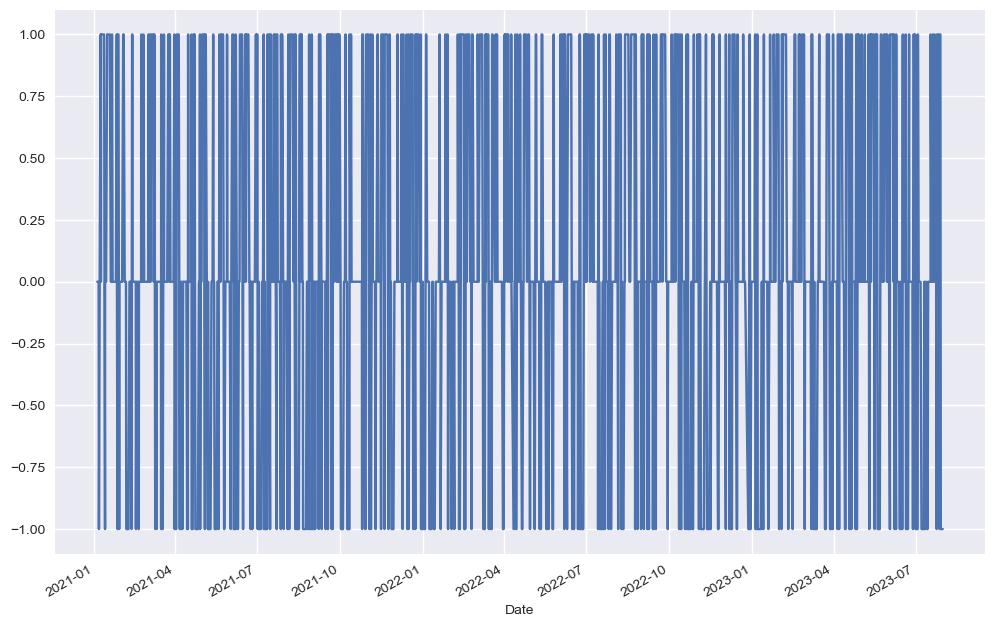

In [184]:
tester2.results.position.plot(figsize = (12,8))

In [185]:
tester2.results.trades.value_counts()

0.0000    63150
1.0000      963
Name: trades, dtype: int64

#### Combining both the strategies using unamious signal where we go long if all signals are long, go short if all signals are short or go netural if signals are nonunanimous

In [186]:
comb = tester.results.loc[:,["returns","position"]].copy()
comb.rename(columns = {"position" : "position_sma"}, inplace = True)
comb["position_mr"] = tester2.results.position.astype("int")

In [187]:
comb

returns  position_sma  position_mr
Date                                                         
2021-01-05 11:30:00+00:00   0.0000             1            0
2021-01-05 11:45:00+00:00  -0.0000             1            0
2021-01-05 12:00:00+00:00  -0.0004             1            0
2021-01-05 12:15:00+00:00  -0.0005             1            0
2021-01-05 12:30:00+00:00  -0.0000             1            0
...                            ...           ...          ...
2023-07-30 22:45:00+00:00   0.0001             1           -1
2023-07-30 23:00:00+00:00  -0.0000             1           -1
2023-07-30 23:15:00+00:00  -0.0001             1           -1
2023-07-30 23:30:00+00:00   0.0001             1           -1
2023-07-30 23:45:00+00:00  -0.0002             1           -1

[64038 rows x 3 columns]

In [188]:
comb["position_comb"] = np.where(comb.position_mr == comb.position_sma, comb.position_mr, 0)

In [189]:
comb.position_comb.value_counts()

 0    60884
 1     1600
-1     1554
Name: position_comb, dtype: int64

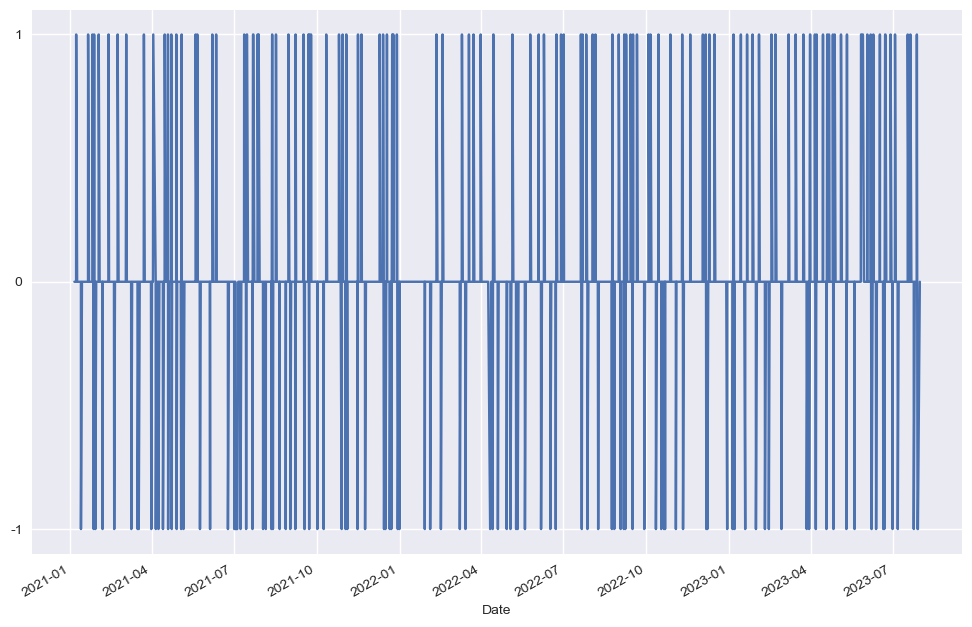

In [190]:
plt.yticks([-1, 0, 1], ['-1', '0', '1'])
comb.position_comb.plot(figsize=(12,8))
plt.show()

In [191]:
# adding busy trading time
comb["NYTime"] = comb.index.tz_convert("America/New_York")
comb["hour"] = comb.NYTime.dt.hour

In [192]:
comb.position_comb = np.where(comb.hour.between(2,12), comb.position_comb, 0)

In [193]:
comb.position_comb.value_counts()

 0    61449
 1     1314
-1     1275
Name: position_comb, dtype: int64

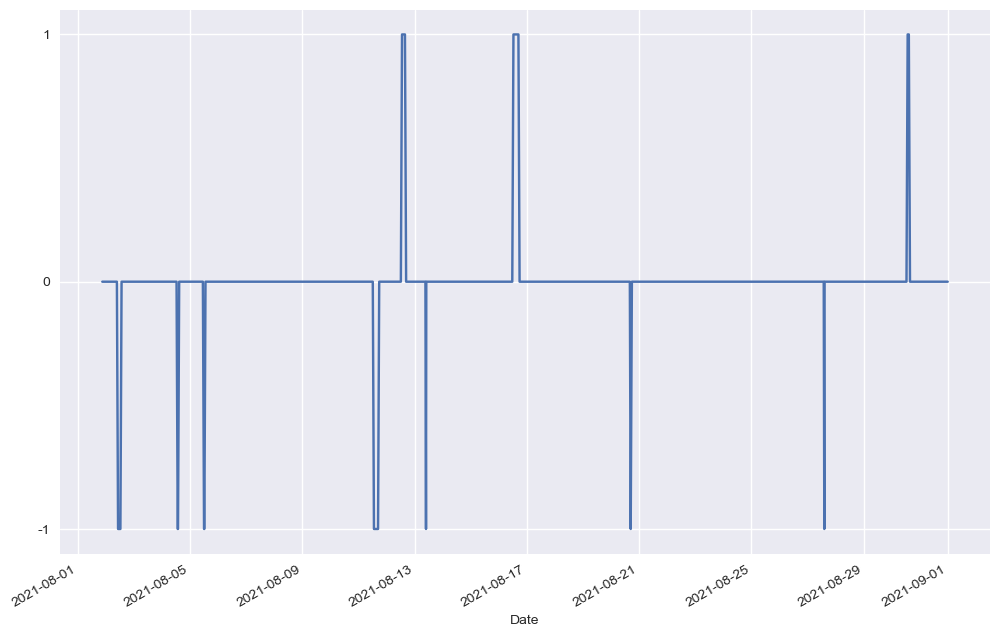

In [194]:
plt.yticks([-1, 0, 1], ['-1', '0', '1'])
comb.position_comb.loc["2021-08"].plot(figsize = (12,8))
plt.show()

In [195]:
comb["strategy"] = comb["position_comb"].shift(1)*comb["returns"]
comb.dropna(inplace = True)
comb["trades"] = comb.position_comb.diff().fillna(0).abs()

In [196]:
tc = 0.00007
comb.strategy = comb.strategy - comb.trades * tc
comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
comb["creturns"] = comb["returns"].cumsum().apply(np.exp)

In [197]:
comb.trades.value_counts()

0.0000    63625
1.0000      412
Name: trades, dtype: int64

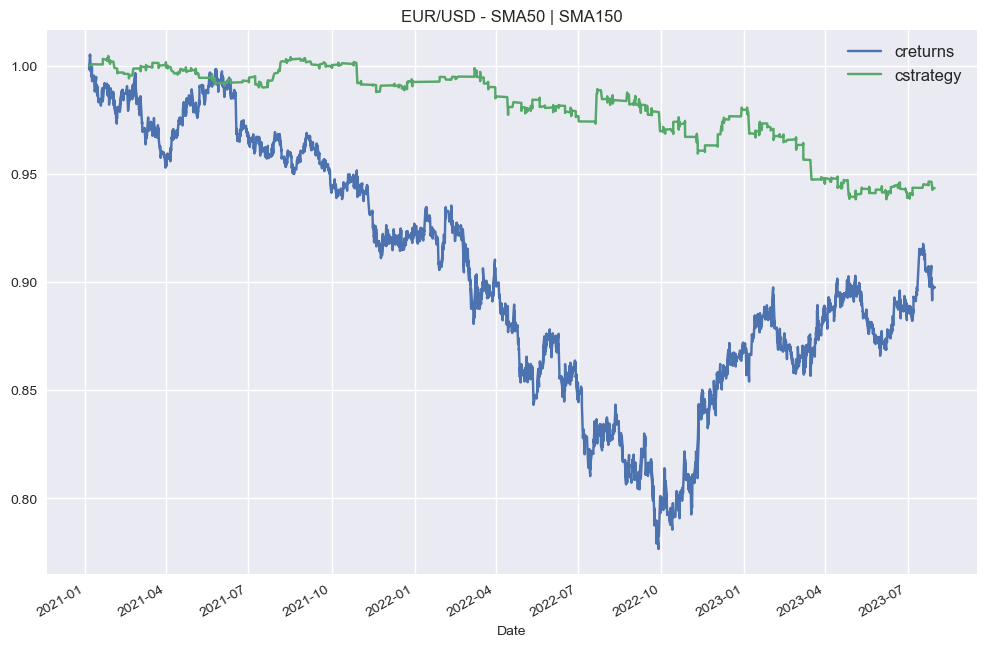

In [198]:
comb[["creturns","cstrategy"]].plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l))
plt.legend(fontsize = 12)
plt.show()

#### combining the strategy with  a different approach where we sum the majority of the signals. If the sum is positiive we go long, if we have negative sum we go short, if the sum is zero we go neutral.

In [199]:
comb = tester.results.loc[:,["returns","position"]].copy()
comb.rename(columns = {"position" : "position_sma"}, inplace = True)
comb["position_mr"] = tester2.results.position.astype("int")

In [200]:
comb["position_comb"] = np.sign(comb.position_mr + comb.position_sma)

In [201]:
comb

returns  position_sma  position_mr  position_comb
Date                                                                        
2021-01-05 11:30:00+00:00   0.0000             1            0              1
2021-01-05 11:45:00+00:00  -0.0000             1            0              1
2021-01-05 12:00:00+00:00  -0.0004             1            0              1
2021-01-05 12:15:00+00:00  -0.0005             1            0              1
2021-01-05 12:30:00+00:00  -0.0000             1            0              1
...                            ...           ...          ...            ...
2023-07-30 22:45:00+00:00   0.0001             1           -1              0
2023-07-30 23:00:00+00:00  -0.0000             1           -1              0
2023-07-30 23:15:00+00:00  -0.0001             1           -1              0
2023-07-30 23:30:00+00:00   0.0001             1           -1              0
2023-07-30 23:45:00+00:00  -0.0002             1           -1              0

[64038 rows x 4 columns]

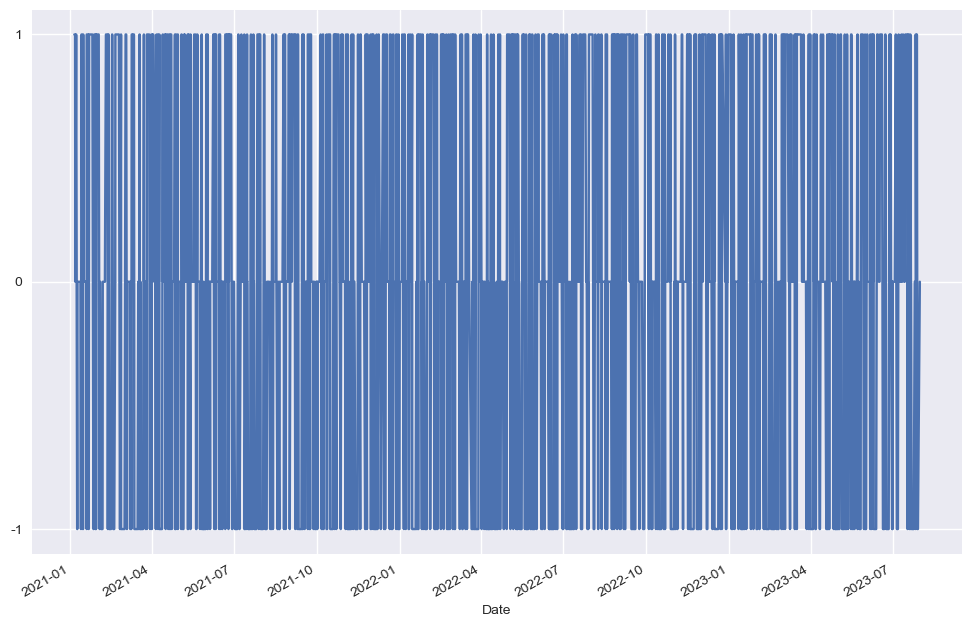

In [202]:
plt.yticks([-1, 0, 1], ['-1', '0', '1'])
comb.position_comb.plot(figsize= (12,8))
plt.show()

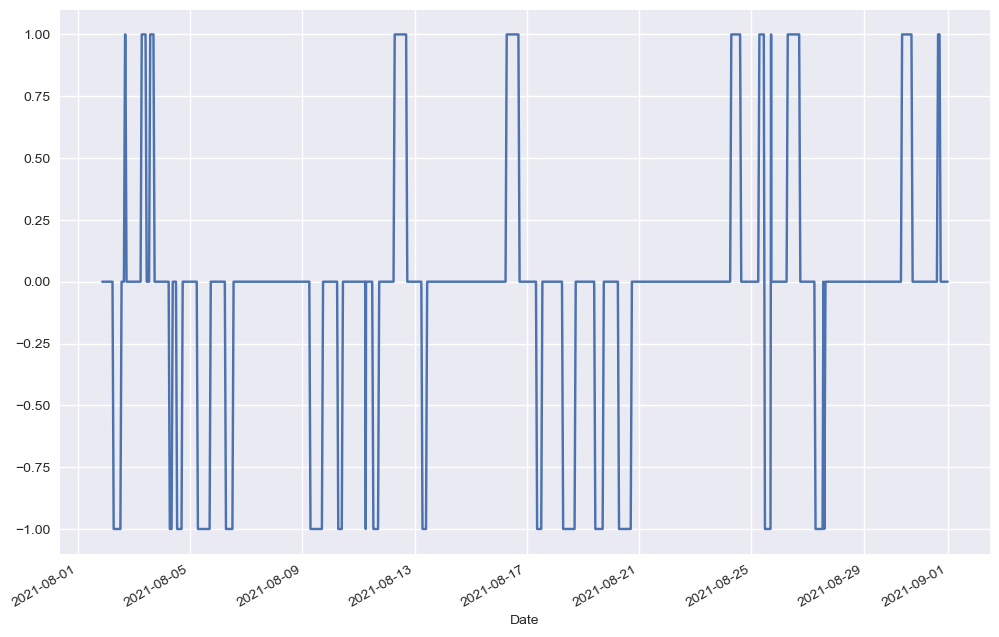

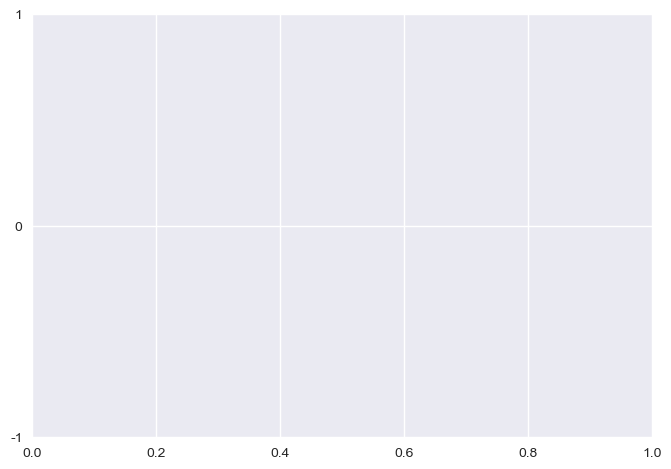

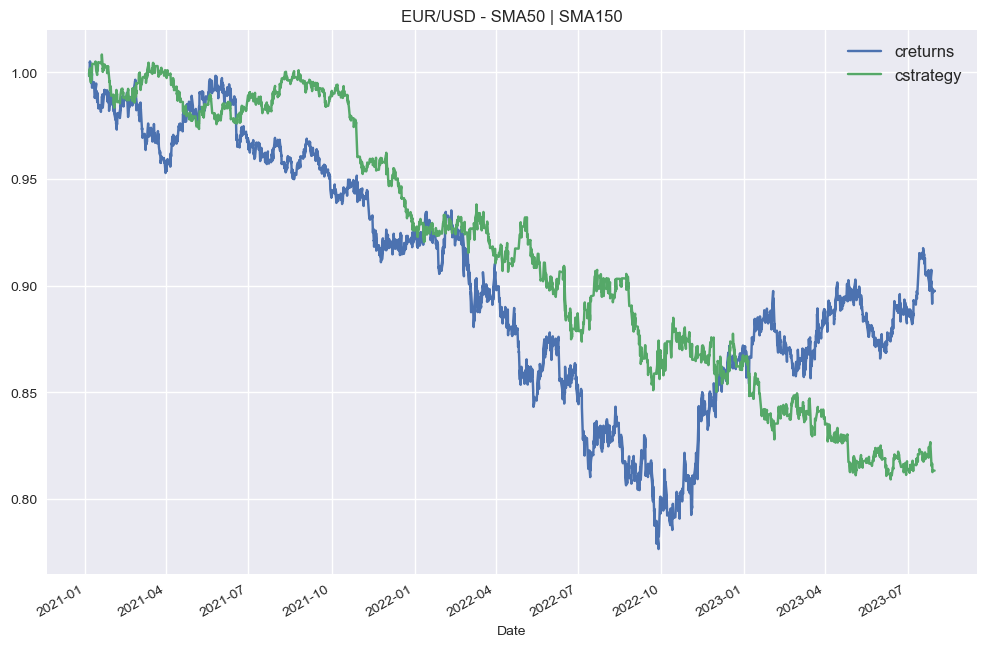

In [203]:
# adding busy trading time
comb["NYTime"] = comb.index.tz_convert("America/New_York")
comb["hour"] = comb.NYTime.dt.hour

comb.position_comb = np.where(comb.hour.between(2,12), comb.position_comb, 0)

comb.position_comb.value_counts()

plt.yticks([-1, 0, 1], ['-1', '0', '1'])
comb.position_comb.loc["2021-08"].plot(figsize = (12,8))
plt.show()

comb["strategy"] = comb["position_comb"].shift(1)*comb["returns"]
comb.dropna(inplace = True)
comb["trades"] = comb.position_comb.diff().fillna(0).abs()

tc = 0.00007
comb.strategy = comb.strategy - comb.trades * tc
comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
comb["creturns"] = comb["returns"].cumsum().apply(np.exp)

comb.trades.value_counts()

comb[["creturns","cstrategy"]].plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s,sma_l))
plt.legend(fontsize = 12)
plt.show()

In [204]:
comb.trades.value_counts()

0.0000    62429
1.0000     1477
2.0000      131
Name: trades, dtype: int64

In [205]:
def optimal_strategy(parameters, filename):
    
    start = "2021-01-01"
    end = "2023-07-31"
    symbol = "EUR/USD"
    tc = 0.000059
    
    # SMA
    
    tester1 = SMABacktester(symbol, int(parameters[0]),int(parameters[1]), start, end, tc, filename)
    tester1.test_strategy()
    
    # Bollinger
    
    tester2 = MeanRevBacktester(symbol, int(parameters[2]), int(parameters[3]), start, end, tc, filename)
    tester2.test_strategy()
    
    # create Combination of strategies
    comb = tester1.results.loc[:,["returns","position"]].copy()
    comb.rename(columns = {"position":"position_sma"}, inplace = True)
    comb["position_mr"] = tester2.results.position
    
    # Method to combine 
    comb["position_comb"] = np.sign(comb.position_mr + comb.position_sma)

    # comb["position_comb"] = np.where(comb.position_sma == comb.position_mr, comb.position_mr, 0)
    # adding busy hours
    comb["NYTime"] = comb.index.tz_convert("America/New_York")
    comb["hour"] = comb.NYTime.dt.hour
    comb.position_comb = np.where(comb.hour.between(2,12), comb.position_comb, 0)
    comb.position_comb.value_counts()
    
    # Back Testing
    comb["strategy"] = comb["position_comb"].shift(1)*comb["returns"]
    comb.dropna(inplace = True)
    comb["trades"] = comb.position_comb.diff().fillna(0).abs()

    tc = 0.00007
    comb.strategy = comb.strategy - comb.trades * tc
    comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
    comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
    
    return -comb["cstrategy"].iloc[-1] # negative absolute performance to be minimized

In [206]:
optimal_strategy((50,150,75,3), "twenty_minute.csv")

-0.8133676366586317

In [207]:

bnds = ((25,75),(100,200),(50,100),(1,5))
filename = "twenty_minute.csv"
start_par = (50,150,75,3)

opts = minimize(optimal_strategy, start_par, method = "Powell", bounds = bnds,args=(filename,))

opts

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.9182579996801787
       x: [ 6.973e+01  1.595e+02  7.141e+01  1.581e+00]
     nit: 6
   direc: [[ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
           [-6.567e-01 -2.522e-01 -1.298e-01  1.466e-02]
           [ 7.119e-01  4.636e+00 -2.351e+01  9.809e-03]]
    nfev: 596

### Iterative Backtesting

In [208]:
# getting the test intraday data with 1 Day candleStick
day_df1 = api.get_history(instrument = "EUR_USD", start = "2010-01-01", end = "2023-07-31",
                granularity = "D", price = "B")

day_df1.to_csv('day_bid.csv', float_format='%.9f')

day_df2 = api.get_history(instrument = "EUR_USD", start = "2010-01-01", end = "2023-07-31",
                granularity = "D", price = "A")

day_df2.to_csv('day_ask.csv', float_format='%.9f')

day_df1 = pd.read_csv("day_bid.csv",parse_dates=["time"], index_col="time")

day_df2 = pd.read_csv("day_ask.csv",parse_dates=["time"], index_col="time")

final_data = pd.DataFrame()
final_data['time'] = day_df1.index
mid_price = (day_df1['c']+day_df2['c'])/2
spread = day_df2['c'] - day_df1['c']
final_data['Price'] = mid_price.reset_index(drop=True).round(9)
final_data['spread'] = spread.reset_index(drop=True).round(9)

final_data = final_data.rename(columns={'time':'Date'})
final_data.to_csv("day_data.csv", float_format='%.9f')

data = pd.read_csv("day_data.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [209]:
data = data.round(5)

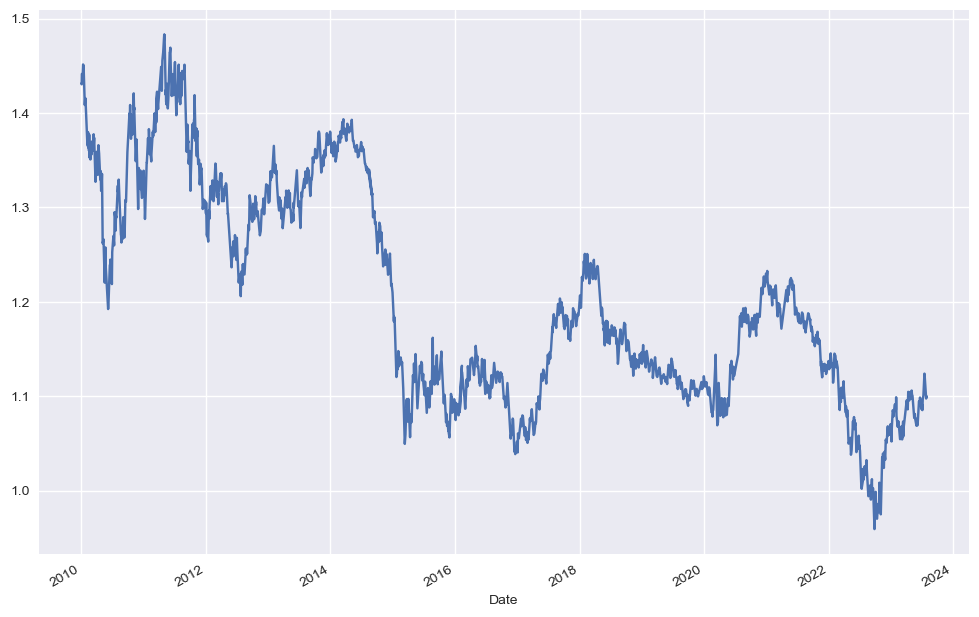

In [210]:
data.Price.plot(figsize = (12,8))
plt.show()

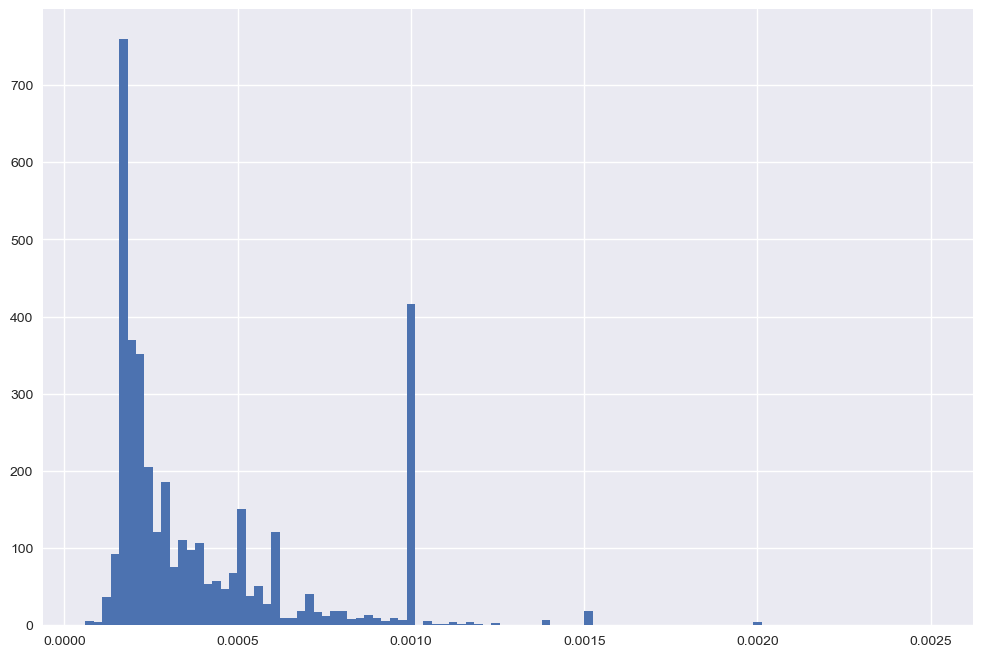

In [211]:
data.spread.hist(bins = 100, figsize = (12,8))
plt.show()

In [212]:
data

Price  spread
Date                              
2009-12-31 22:00:00 1.4312  0.0010
2010-01-02 22:00:00 1.4304  0.0004
2010-01-03 22:00:00 1.4413  0.0002
2010-01-04 22:00:00 1.4365  0.0002
2010-01-05 22:00:00 1.4408  0.0002
...                    ...     ...
2023-07-24 21:00:00 1.1055  0.0002
2023-07-25 21:00:00 1.1086  0.0002
2023-07-26 21:00:00 1.0976  0.0002
2023-07-27 21:00:00 1.1017  0.0008
2023-07-30 21:00:00 1.0998  0.0002

[3816 rows x 2 columns]

In [213]:
for bar in range(10):
    print(bar, data.index[bar].date(), data.Price[bar], data.spread[bar], sep = "|")

0|2009-12-31|1.4312|0.001
1|2010-01-02|1.43036|0.0004
2|2010-01-03|1.44127|0.00018
3|2010-01-04|1.4365|0.0002
4|2010-01-05|1.44078|0.00018
5|2010-01-06|1.43079|0.0002
6|2010-01-07|1.44055|0.001
7|2010-01-08|1.44098|0.001
8|2010-01-09|1.44268|0.0003
9|2010-01-10|1.45132|0.00018


In [214]:
for bar in range(10):
    print(bar, data.index[bar].date(), data.Price[bar], data.spread[bar], sep = "|")
    time.sleep(1)

0|2009-12-31|1.4312|0.001
1|2010-01-02|1.43036|0.0004
2|2010-01-03|1.44127|0.00018
3|2010-01-04|1.4365|0.0002
4|2010-01-05|1.44078|0.00018
5|2010-01-06|1.43079|0.0002
6|2010-01-07|1.44055|0.001
7|2010-01-08|1.44098|0.001
8|2010-01-09|1.44268|0.0003
9|2010-01-10|1.45132|0.00018


In [215]:
class IterativeBase():
    ''' Base class for iterative (event-driven) backtesting of trading strategies.
    '''

    def __init__(self, symbol, start, end, amount, use_spread = True):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        start: str
            start date for data import
        end: str
            end date for data import
        amount: float
            initial amount to be invested per trade
        use_spread: boolean (default = True) 
            whether trading costs (bid-ask spread) are included
        '''
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_balance = amount
        self.current_balance = amount
        self.units = 0
        self.trades = 0
        self.position = 0
        self.use_spread = use_spread
        self.get_data()
    
    def get_data(self):
        ''' Imports the data from detailed.csv (source can be changed).
        '''
        raw = pd.read_csv("day_data.csv", parse_dates = ["Date"], index_col = "Date").dropna()
        raw = raw.drop(['Unnamed: 0'], axis=1)
        raw = raw.loc[self.start:self.end].copy()
        raw["returns"] = np.log(raw.Price / raw.Price.shift(1))
        self.data = raw

    def plot_data(self, cols = None):  
        ''' Plots the closing price for the symbol.
        '''
        if cols is None:
            cols = "Price"
        self.data[cols].plot(figsize = (12, 8), title = self.symbol)
    
    def get_values(self, bar):
        ''' Returns the date, the price and the spread for the given bar.
        '''
        date = str(self.data.index[bar].date())
        price = round(self.data.Price.iloc[bar], 5)
        spread = round(self.data.spread.iloc[bar], 5)
        return date, price, spread
    
    def print_current_balance(self, bar):
        ''' Prints out the current (cash) balance.
        '''
        date, price, spread = self.get_values(bar)
        print("{} | Current Balance: {}".format(date, round(self.current_balance, 2)))
        
    def buy_instrument(self, bar, units = None, amount = None):
        ''' Places and executes a buy order (market order).
        '''
        date, price, spread = self.get_values(bar)
        if self.use_spread:
            price += spread/2 # ask price
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance -= units * price # reduce cash balance by "purchase price"
        self.units += units
        self.trades += 1
        print("{} |  Buying {} for {}".format(date, units, round(price, 5)))
    
    def sell_instrument(self, bar, units = None, amount = None):
        ''' Places and executes a sell order (market order).
        '''
        date, price, spread = self.get_values(bar)
        if self.use_spread:
            price -= spread/2 # bid price
        if amount is not None: # use units if units are passed, otherwise calculate units
            units = int(amount / price)
        self.current_balance += units * price # increases cash balance by "purchase price"
        self.units -= units
        self.trades += 1
        print("{} |  Selling {} for {}".format(date, units, round(price, 5)))
    
    def print_current_position_value(self, bar):
        ''' Prints out the current position value.
        '''
        date, price, spread = self.get_values(bar)
        cpv = self.units * price
        print("{} |  Current Position Value = {}".format(date, round(cpv, 2)))
    
    def print_current_nav(self, bar):
        ''' Prints out the current net asset value (nav).
        '''
        date, price, spread = self.get_values(bar)
        nav = self.current_balance + self.units * price
        print("{} |  Net Asset Value = {}".format(date, round(nav, 2)))
        
    def close_pos(self, bar):
        ''' Closes out a long or short position (go neutral).
        '''
        date, price, spread = self.get_values(bar)
        print(75 * "-")
        print("{} | +++ CLOSING FINAL POSITION +++".format(date))
        self.current_balance += self.units * price # closing final position (works with short and long!)
        self.current_balance -= (abs(self.units) * spread/2 * self.use_spread) # substract half-spread costs
        print("{} | closing position of {} for {}".format(date, self.units, price))
        self.units = 0 # setting position to neutral
        self.trades += 1
        perf = (self.current_balance - self.initial_balance) / self.initial_balance * 100
        self.print_current_balance(bar)
        print("{} | net performance (%) = {}".format(date, round(perf, 2) ))
        print("{} | number of trades executed = {}".format(date, self.trades))
        print(75 * "-")

In [216]:
class IterativeBacktest(IterativeBase):
    ''' Class for iterative (event-driven) backtesting of trading strategies.
    '''

    # helper method
    def go_long(self, bar, units = None, amount = None):
        if self.position == -1:
            self.buy_instrument(bar, units = -self.units) # if short position, go neutral first
        if units:
            self.buy_instrument(bar, units = units)
        elif amount:
            if amount == "all":
                amount = self.current_balance
            self.buy_instrument(bar, amount = amount) # go long

    # helper method
    def go_short(self, bar, units = None, amount = None):
        if self.position == 1:
            self.sell_instrument(bar, units = self.units) # if long position, go neutral first
        if units:
            self.sell_instrument(bar, units = units)
        elif amount:
            if amount == "all":
                amount = self.current_balance
            self.sell_instrument(bar, amount = amount) # go short

    def test_sma_strategy(self, SMA_S, SMA_L):
        ''' 
        Backtests an SMA crossover strategy with SMA_S (short) and SMA_L (long).
        
        Parameters
        ----------
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        '''
        
        # nice printout
        stm = "Testing SMA strategy | {} | SMA_S = {} & SMA_L = {}".format(self.symbol, SMA_S, SMA_L)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        # reset 
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.current_balance = self.initial_balance  # reset initial capital
        self.get_data() # reset dataset
        
        # prepare data
        self.data["SMA_S"] = self.data["Price"].rolling(SMA_S).mean()
        self.data["SMA_L"] = self.data["Price"].rolling(SMA_L).mean()
        self.data.dropna(inplace = True)

        # sma crossover strategy
        for bar in range(len(self.data)-1): # all bars (except the last bar)
            if self.data["SMA_S"].iloc[bar] > self.data["SMA_L"].iloc[bar]: # signal to go long
                if self.position in [0, -1]:
                    self.go_long(bar, amount = "all") # go long with full amount
                    self.position = 1  # long position
            elif self.data["SMA_S"].iloc[bar] < self.data["SMA_L"].iloc[bar]: # signal to go short
                if self.position in [0, 1]:
                    self.go_short(bar, amount = "all") # go short with full amount
                    self.position = -1 # short position
        self.close_pos(bar+1) # close position at the last bar
        
        
    def test_con_strategy(self, window = 1):
        ''' 
        Backtests a simple contrarian strategy.
        
        Parameters
        ----------
        window: int
            time window (number of bars) to be considered for the strategy.
        '''
        
        # nice printout
        stm = "Testing Contrarian strategy | {} | Window = {}".format(self.symbol, window)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        # reset 
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.current_balance = self.initial_balance  # reset initial capital
        self.get_data() # reset dataset
        
        # prepare data
        self.data["rolling_returns"] = self.data["returns"].rolling(window).mean()
        self.data.dropna(inplace = True)
        
        # Contrarian strategy
        for bar in range(len(self.data)-1): # all bars (except the last bar)
            if self.data["rolling_returns"].iloc[bar] <= 0: #signal to go long
                if self.position in [0, -1]:
                    self.go_long(bar, amount = "all") # go long with full amount
                    self.position = 1  # long position
            elif self.data["rolling_returns"].iloc[bar] > 0: #signal to go short
                if self.position in [0, 1]:
                    self.go_short(bar, amount = "all") # go short with full amount
                    self.position = -1 # short position
        self.close_pos(bar+1) # close position at the last bar
        
        
    def test_boll_strategy(self, SMA, dev):
        ''' 
        Backtests a Bollinger Bands mean-reversion strategy.
        
        Parameters
        ----------
        SMA: int
            moving window in bars (e.g. days) for simple moving average.
        dev: int
            distance for Lower/Upper Bands in Standard Deviation units
        '''
        
        # nice printout
        stm = "Testing Bollinger Bands Strategy | {} | SMA = {} & dev = {}".format(self.symbol, SMA, dev)
        print("-" * 75)
        print(stm)
        print("-" * 75)
        
        # reset 
        self.position = 0  # initial neutral position
        self.trades = 0  # no trades yet
        self.current_balance = self.initial_balance  # reset initial capital
        self.get_data() # reset dataset
        
        # prepare data
        self.data["SMA"] = self.data["Price"].rolling(SMA).mean()
        self.data["Lower"] = self.data["SMA"] - self.data["Price"].rolling(SMA).std() * dev
        self.data["Upper"] = self.data["SMA"] + self.data["Price"].rolling(SMA).std() * dev
        self.data.dropna(inplace = True) 
        
        # Bollinger strategy
        for bar in range(len(self.data)-1): # all bars (except the last bar)
            if self.position == 0: # when neutral
                if self.data["Price"].iloc[bar] < self.data["Lower"].iloc[bar]: # signal to go long
                    self.go_long(bar, amount = "all") # go long with full amount
                    self.position = 1  # long position
                elif self.data["Price"].iloc[bar] > self.data["Upper"].iloc[bar]: # signal to go Short
                    self.go_short(bar, amount = "all") # go short with full amount
                    self.position = -1 # short position
            elif self.position == 1: # when long
                if self.data["Price"].iloc[bar] > self.data["SMA"].iloc[bar]:
                    if self.data["Price"].iloc[bar] > self.data["Upper"].iloc[bar]: # signal to go short
                        self.go_short(bar, amount = "all") # go short with full amount
                        self.position = -1 # short position
                    else:
                        self.sell_instrument(bar, units = self.units) # go neutral
                        self.position = 0
            elif self.position == -1: # when short
                if self.data["Price"].iloc[bar] < self.data["SMA"].iloc[bar]:
                    if self.data["Price"].iloc[bar] < self.data["Lower"].iloc[bar]: # signal to go long
                        self.go_long(bar, amount = "all") # go long with full amount
                        self.position = 1 # long position
                    else:
                        self.buy_instrument(bar, units = -self.units) # go neutral
                        self.position = 0                
        self.close_pos(bar+1) # close position at the last bar
     

In [217]:
iterative_base = IterativeBase("EUR/USD","2010-01-01","2023-07-31",100000)

In [218]:
iterative_base.data

Price  spread  returns
Date                                       
2010-01-02 22:00:00 1.4304  0.0004      NaN
2010-01-03 22:00:00 1.4413  0.0002   0.0076
2010-01-04 22:00:00 1.4365  0.0002  -0.0033
2010-01-05 22:00:00 1.4408  0.0002   0.0030
2010-01-06 22:00:00 1.4308  0.0002  -0.0070
...                    ...     ...      ...
2023-07-24 21:00:00 1.1055  0.0002  -0.0009
2023-07-25 21:00:00 1.1086  0.0002   0.0028
2023-07-26 21:00:00 1.0976  0.0002  -0.0100
2023-07-27 21:00:00 1.1017  0.0008   0.0037
2023-07-30 21:00:00 1.0998  0.0002  -0.0017

[3815 rows x 3 columns]

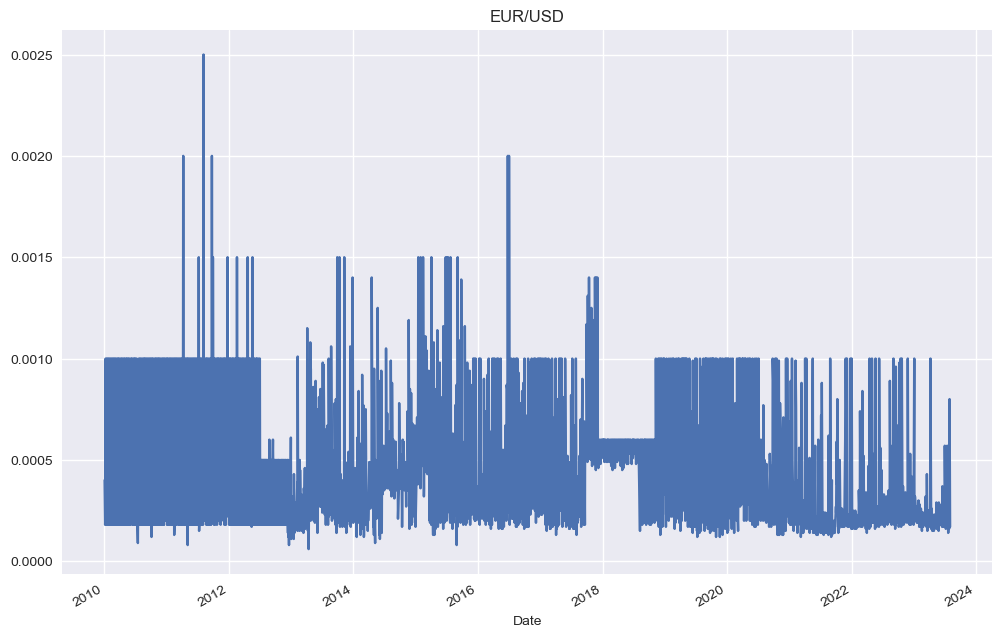

In [219]:
iterative_base.plot_data(cols = "spread")

In [220]:
iterative_backtest = IterativeBacktest("EUR/USD","2010-01-01","2023-07-31",100000, use_spread = True)

In [221]:
iterative_backtest.data

Price  spread  returns
Date                                       
2010-01-02 22:00:00 1.4304  0.0004      NaN
2010-01-03 22:00:00 1.4413  0.0002   0.0076
2010-01-04 22:00:00 1.4365  0.0002  -0.0033
2010-01-05 22:00:00 1.4408  0.0002   0.0030
2010-01-06 22:00:00 1.4308  0.0002  -0.0070
...                    ...     ...      ...
2023-07-24 21:00:00 1.1055  0.0002  -0.0009
2023-07-25 21:00:00 1.1086  0.0002   0.0028
2023-07-26 21:00:00 1.0976  0.0002  -0.0100
2023-07-27 21:00:00 1.1017  0.0008   0.0037
2023-07-30 21:00:00 1.0998  0.0002  -0.0017

[3815 rows x 3 columns]

In [222]:
iterative_backtest.test_sma_strategy(25,100)

---------------------------------------------------------------------------
Testing SMA strategy | EUR/USD | SMA_S = 25 & SMA_L = 100
---------------------------------------------------------------------------
2010-04-13 |  Selling 73246 for 1.36525
2010-07-22 |  Buying 73246 for 1.29155
2010-07-22 |  Buying 81606 for 1.29155
2010-12-04 |  Selling 81606 for 1.33751
2010-12-04 |  Selling 81606 for 1.33751
2011-02-01 |  Buying 81606 for 1.38115
2011-02-01 |  Buying 76449 for 1.38115
2011-05-30 |  Selling 76449 for 1.43956
2011-05-30 |  Selling 76449 for 1.43956
2011-06-04 |  Buying 76449 for 1.46153
2011-06-04 |  Buying 74150 for 1.46153
2011-06-29 |  Selling 74150 for 1.45008
2011-06-29 |  Selling 74150 for 1.45008
2011-08-11 |  Buying 74150 for 1.42535
2011-08-11 |  Buying 76723 for 1.42535
2011-08-23 |  Selling 76723 for 1.44133
2011-08-23 |  Selling 76723 for 1.44133
2011-08-25 |  Buying 76723 for 1.45039
2011-08-25 |  Buying 75765 for 1.45039
2011-09-07 |  Selling 75765 for 1.38808


In [223]:
iterative_backtest.test_boll_strategy(30,2)

---------------------------------------------------------------------------
Testing Bollinger Bands Strategy | EUR/USD | SMA = 30 & dev = 2
---------------------------------------------------------------------------
2010-03-11 |  Selling 72655 for 1.37636
2010-03-17 |  Buying 72655 for 1.36088
2010-03-23 |  Buying 75952 for 1.33142
2010-03-31 |  Selling 75952 for 1.35876
2010-04-26 |  Buying 78326 for 1.31757
2010-06-14 |  Selling 78326 for 1.23319
2010-07-14 |  Selling 74593 for 1.29492
2010-08-10 |  Buying 74593 for 1.28641
2010-09-13 |  Selling 74808 for 1.29968
2010-10-26 |  Buying 74808 for 1.37699
2010-11-02 |  Selling 64680 for 1.41377
2010-11-07 |  Buying 64680 for 1.39209
2010-11-10 |  Buying 67928 for 1.36681
2010-12-12 |  Selling 67928 for 1.339
2011-01-05 |  Buying 69943 for 1.30042
2011-01-12 |  Selling 69943 for 1.33626
2011-01-20 |  Selling 68640 for 1.36163
2011-02-10 |  Buying 68640 for 1.35624
2011-03-02 |  Selling 67175 for 1.39683
2011-04-17 |  Buying 67175 for 1.42

In [224]:
iterative_backtest.test_con_strategy(window =15)

---------------------------------------------------------------------------
Testing Contrarian strategy | EUR/USD | Window = 15
---------------------------------------------------------------------------
2010-01-17 |  Selling 69530 for 1.43821
2010-01-18 |  Buying 69530 for 1.42882
2010-01-18 |  Buying 70444 for 1.42882
2010-03-01 |  Selling 70444 for 1.3614
2010-03-01 |  Selling 70444 for 1.3614
2010-03-02 |  Buying 70444 for 1.36974
2010-03-02 |  Buying 69586 for 1.36974
2010-03-04 |  Selling 69586 for 1.362
2010-03-04 |  Selling 69586 for 1.362
2010-03-07 |  Buying 69586 for 1.36352
2010-03-07 |  Buying 69431 for 1.36352
2010-03-08 |  Selling 69431 for 1.36005
2010-03-08 |  Selling 69431 for 1.36005
2010-03-17 |  Buying 69431 for 1.36088
2010-03-17 |  Buying 69347 for 1.36088
2010-04-08 |  Selling 69347 for 1.34941
2010-04-08 |  Selling 69347 for 1.34941
2010-04-15 |  Buying 69347 for 1.35078
2010-04-15 |  Buying 69206 for 1.35078
2010-04-22 |  Selling 69206 for 1.33792
2010-04-22 |

### Using Machine Learning to predict returns

In [225]:
# getting the intraday data with 5 minutes interval
intraday5_df1 = api.get_history(instrument = "EUR_USD", start = "2022-01-01", end = "2022-12-31",
                granularity = "M5", price = "B")

intraday5_df1.to_csv('intraday5_bid.csv', float_format='%.9f')

intraday5_df2 = api.get_history(instrument = "EUR_USD", start = "2022-01-01", end = "2022-12-31",
                granularity = "M5", price = "A")

intraday5_df2.to_csv('intraday5_ask.csv', float_format='%.9f')

df1_min = pd.read_csv("intraday5_bid.csv",parse_dates=["time"], index_col="time")

df2_min = pd.read_csv("intraday5_ask.csv",parse_dates=["time"], index_col="time")

final_data = pd.DataFrame()
final_data['time'] = df1_min.index
mid_price = (df1_min['c']+df2_min['c'])/2
final_data['Price'] = mid_price.reset_index(drop=True).round(9)


In [226]:

final_data = final_data.rename(columns={'time':'Date'})
final_data.to_csv("five_minute.csv", float_format='%.9f')
data = pd.read_csv("five_minute.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [227]:
data

Price
Date                      
2022-01-02 22:00:00 1.1373
2022-01-02 22:05:00 1.1369
2022-01-02 22:10:00 1.1374
2022-01-02 22:15:00 1.1374
2022-01-02 22:20:00 1.1375
...                    ...
2022-12-30 21:35:00 1.0702
2022-12-30 21:40:00 1.0703
2022-12-30 21:45:00 1.0704
2022-12-30 21:50:00 1.0700
2022-12-30 21:55:00 1.0704

[74464 rows x 1 columns]

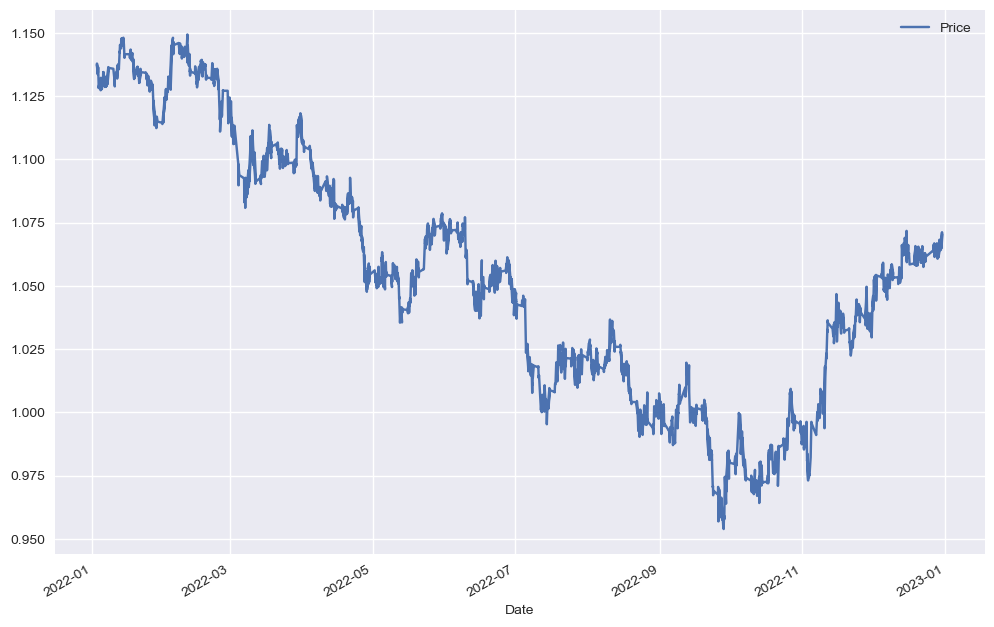

In [228]:
data.plot(figsize=(12,8))
plt.show()

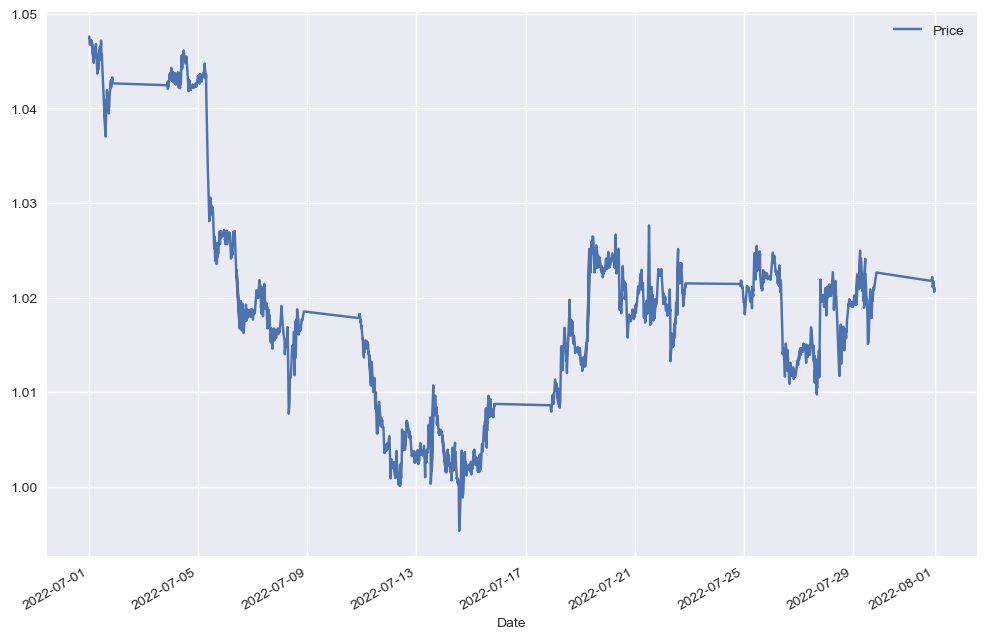

In [229]:
data.loc["2022-07"].plot(figsize = (12,8))
plt.show()

In [230]:
data["returns"] = np.log(data.div(data.shift(1)))

In [231]:
data

Price  returns
Date                               
2022-01-02 22:00:00 1.1373      NaN
2022-01-02 22:05:00 1.1369  -0.0003
2022-01-02 22:10:00 1.1374   0.0005
2022-01-02 22:15:00 1.1374   0.0000
2022-01-02 22:20:00 1.1375   0.0000
...                    ...      ...
2022-12-30 21:35:00 1.0702  -0.0001
2022-12-30 21:40:00 1.0703   0.0001
2022-12-30 21:45:00 1.0704   0.0001
2022-12-30 21:50:00 1.0700  -0.0003
2022-12-30 21:55:00 1.0704   0.0003

[74464 rows x 2 columns]

### Simple Linear Model

Using simple linear model to predict financial returns

In [232]:
data["lag1"] = data.returns.shift(1)

In [233]:
data.dropna(inplace = True)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74462 entries, 2022-01-02 22:10:00 to 2022-12-30 21:55:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    74462 non-null  float64
 1   returns  74462 non-null  float64
 2   lag1     74462 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


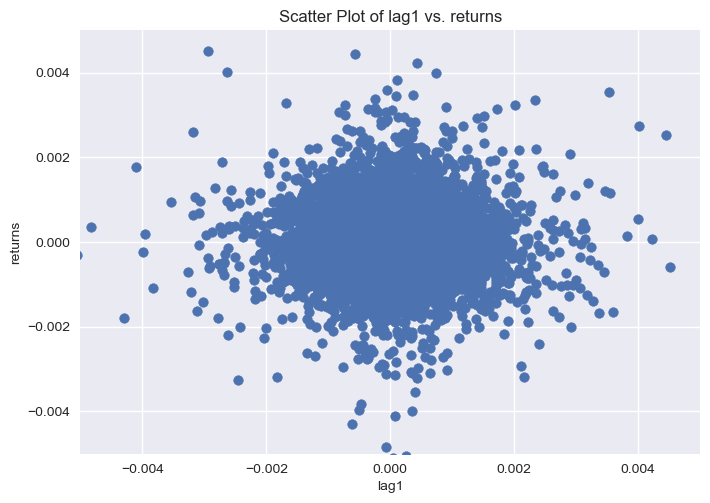

In [235]:
# Scatter plot
plt.scatter(data["lag1"], data["returns"])
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.xlabel("lag1")
plt.ylabel("returns")
plt.title("Scatter Plot of lag1 vs. returns")
plt.show()


In [236]:
lm = LinearRegression(fit_intercept = True)

lm.fit(data.lag1.to_frame(),data.returns)

LinearRegression()

In [237]:
slope = lm.coef_
slope

array([-0.01736965])

In [238]:
intercept = lm.intercept_
intercept

-8.232461528702637e-07

In [239]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [240]:
data

Price  returns    lag1    pred
Date                                               
2022-01-02 22:10:00 1.1374   0.0005 -0.0003  0.0000
2022-01-02 22:15:00 1.1374   0.0000  0.0005 -0.0000
2022-01-02 22:20:00 1.1375   0.0000  0.0000 -0.0000
2022-01-02 22:25:00 1.1375   0.0000  0.0000 -0.0000
2022-01-02 22:30:00 1.1374  -0.0001  0.0000 -0.0000
...                    ...      ...     ...     ...
2022-12-30 21:35:00 1.0702  -0.0001 -0.0001  0.0000
2022-12-30 21:40:00 1.0703   0.0001 -0.0001  0.0000
2022-12-30 21:45:00 1.0704   0.0001  0.0001 -0.0000
2022-12-30 21:50:00 1.0700  -0.0003  0.0001 -0.0000
2022-12-30 21:55:00 1.0704   0.0003 -0.0003  0.0000

[74462 rows x 4 columns]

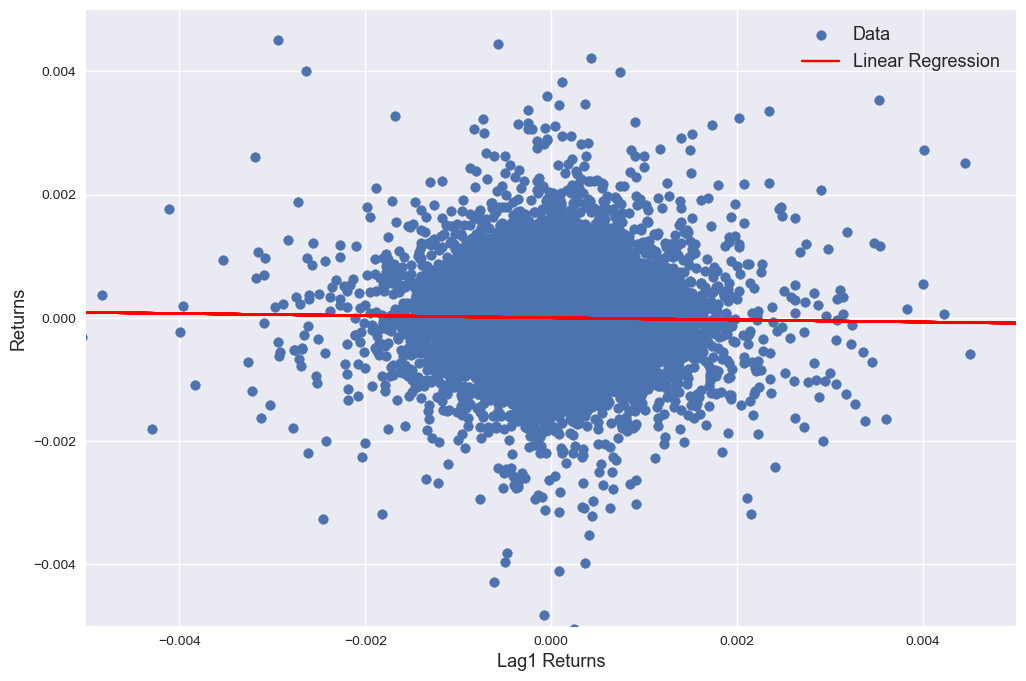

In [241]:
plt.figure(figsize=(12,8))
plt.scatter(x=data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005,0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

from the above plot we can infer that the model fails to predict the magnitude of the returns, as the linear relationship is rather weak as the regression line is somewhat downward sloping which suggest contrarium behaivour and if the return suggested is positive in this period then is very likely to have negative return in next period. As the regression line is almost horizontal and the magnitude of the forcast return is rather low as compared to actual values. 

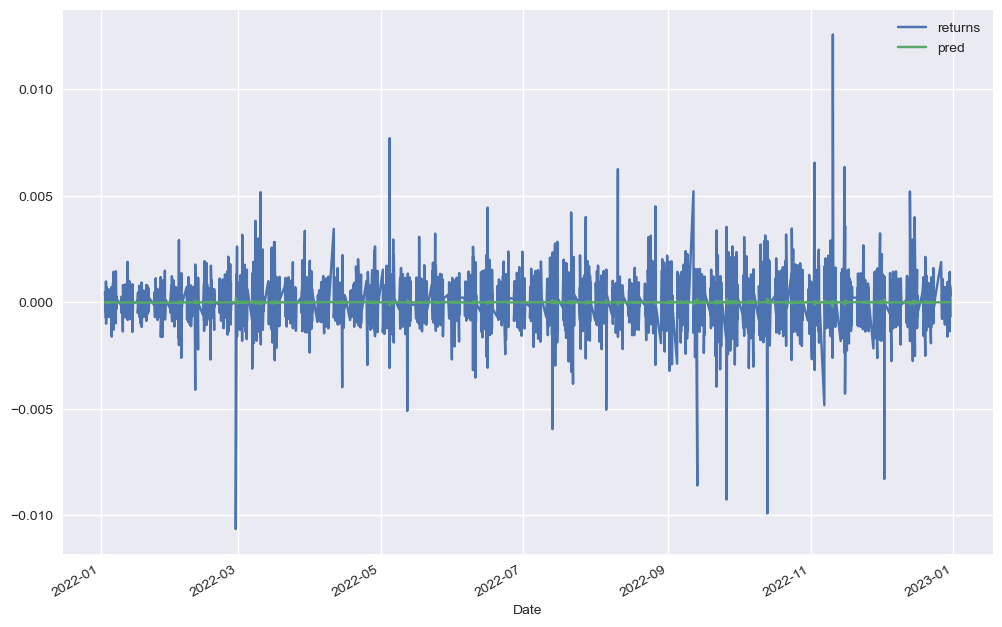

In [242]:
data[["returns","pred"]].plot(figsize= (12,8))
plt.show()

our model fails to predict the magnitude of the return hence the prediction return is very low as compared to the acutal return

In [243]:
mse = mean_squared_error(data["returns"], data["pred"])
print("Mean Squared Error:", mse)


Mean Squared Error: 1.5901831850163932e-07


In [244]:

print("R2 Score value is :", r2_score(data["returns"], data["pred"]))

R2 Score value is : 0.00030170507543458847


In [245]:
data.pred = np.sign(data.pred) # checking if our model can predict the direction of the market that is +1/-1

In [246]:
data

Price  returns    lag1    pred
Date                                               
2022-01-02 22:10:00 1.1374   0.0005 -0.0003  1.0000
2022-01-02 22:15:00 1.1374   0.0000  0.0005 -1.0000
2022-01-02 22:20:00 1.1375   0.0000  0.0000 -1.0000
2022-01-02 22:25:00 1.1375   0.0000  0.0000 -1.0000
2022-01-02 22:30:00 1.1374  -0.0001  0.0000 -1.0000
...                    ...      ...     ...     ...
2022-12-30 21:35:00 1.0702  -0.0001 -0.0001  1.0000
2022-12-30 21:40:00 1.0703   0.0001 -0.0001  1.0000
2022-12-30 21:45:00 1.0704   0.0001  0.0001 -1.0000
2022-12-30 21:50:00 1.0700  -0.0003  0.0001 -1.0000
2022-12-30 21:55:00 1.0704   0.0003 -0.0003  1.0000

[74462 rows x 4 columns]

In [247]:
np.sign(data.returns * data.pred)

Date
2022-01-02 22:10:00    1.0000
2022-01-02 22:15:00    0.0000
2022-01-02 22:20:00   -1.0000
2022-01-02 22:25:00   -1.0000
2022-01-02 22:30:00    1.0000
                        ...  
2022-12-30 21:35:00   -1.0000
2022-12-30 21:40:00    1.0000
2022-12-30 21:45:00   -1.0000
2022-12-30 21:50:00    1.0000
2022-12-30 21:55:00    1.0000
Length: 74462, dtype: float64

In [248]:
hits = np.sign(data.returns * data.pred).value_counts()

In [249]:
hits
# +1 is correct prediction of the market direction
# -1 is incorrect predicition of the market direction

1.0000     37685
-1.0000    35979
0.0000       798
dtype: int64

In [250]:
hits_ratio = hits[1.0]/sum(hits)
hits_ratio

0.5060970696462626

### Mupltiple Linear Regression Model
using multiple linear regression model as our simple linear model fails to predict the magnitude of the returns.

In [251]:
data = pd.read_csv("five_minute.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [252]:
data.dropna(inplace = True)

In [253]:
data["returns"] = np.log(data.div(data.shift(1)))

In [254]:
lags = 5
cols = []
for lags in range(1, lags +1):
    col = "lag{}".format(lags)
    data[col] = data.returns.shift(lags)
    cols.append(col)
data.dropna(inplace = True)

In [255]:
data

Price  returns    lag1    lag2    lag3    lag4    lag5
Date                                                                       
2022-01-02 22:30:00 1.1374  -0.0001  0.0000  0.0000  0.0000  0.0005 -0.0003
2022-01-02 22:35:00 1.1374   0.0000 -0.0001  0.0000  0.0000  0.0000  0.0005
2022-01-02 22:40:00 1.1375   0.0000  0.0000 -0.0001  0.0000  0.0000  0.0000
2022-01-02 22:45:00 1.1375   0.0001  0.0000  0.0000 -0.0001  0.0000  0.0000
2022-01-02 22:50:00 1.1375  -0.0000  0.0001  0.0000  0.0000 -0.0001  0.0000
...                    ...      ...     ...     ...     ...     ...     ...
2022-12-30 21:35:00 1.0702  -0.0001 -0.0001  0.0001  0.0001 -0.0001  0.0000
2022-12-30 21:40:00 1.0703   0.0001 -0.0001 -0.0001  0.0001  0.0001 -0.0001
2022-12-30 21:45:00 1.0704   0.0001  0.0001 -0.0001 -0.0001  0.0001  0.0001
2022-12-30 21:50:00 1.0700  -0.0003  0.0001  0.0001 -0.0001 -0.0001  0.0001
2022-12-30 21:55:00 1.0704   0.0003 -0.0003  0.0001  0.0001 -0.0001 -0.0001

[74458 rows x 7 columns]

In [256]:
mlm = LinearRegression(fit_intercept = True)
mlm.fit(data[cols],data.returns)

LinearRegression()

In [257]:
mlm.coef_

array([-0.01738315,  0.00064134, -0.00587485, -0.00565896, -0.00209845])

In [258]:
mlm.intercept_

-8.41069341477905e-07

In [259]:
data["pred"] = mlm.predict(data[cols].values)

/Users/kanishkgarg/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [260]:
data.pred = np.sign(data.pred)

In [261]:
data

Price  returns    lag1    lag2    lag3    lag4    lag5  \
Date                                                                          
2022-01-02 22:30:00 1.1374  -0.0001  0.0000  0.0000  0.0000  0.0005 -0.0003   
2022-01-02 22:35:00 1.1374   0.0000 -0.0001  0.0000  0.0000  0.0000  0.0005   
2022-01-02 22:40:00 1.1375   0.0000  0.0000 -0.0001  0.0000  0.0000  0.0000   
2022-01-02 22:45:00 1.1375   0.0001  0.0000  0.0000 -0.0001  0.0000  0.0000   
2022-01-02 22:50:00 1.1375  -0.0000  0.0001  0.0000  0.0000 -0.0001  0.0000   
...                    ...      ...     ...     ...     ...     ...     ...   
2022-12-30 21:35:00 1.0702  -0.0001 -0.0001  0.0001  0.0001 -0.0001  0.0000   
2022-12-30 21:40:00 1.0703   0.0001 -0.0001 -0.0001  0.0001  0.0001 -0.0001   
2022-12-30 21:45:00 1.0704   0.0001  0.0001 -0.0001 -0.0001  0.0001  0.0001   
2022-12-30 21:50:00 1.0700  -0.0003  0.0001  0.0001 -0.0001 -0.0001  0.0001   
2022-12-30 21:55:00 1.0704   0.0003 -0.0003  0.0001  0.0001 -0.0001 -0.0001   

                       pred  
Date                         
2022-01-02 22:30:00 -1.0000  
2022-01-02 22:35:00 -1.0000  
2022-01-02 22:40:00 -1.0000  
2022-01-02 22:45:00 -1.0000  
2022-01-02 22:50:00 -1.0000  
...                     ...  
2022-12-30 21:35:00  1.0000  
2022-12-30 21:40:00  1.0000  
2022-12-30 21:45:00 -1.0000  
2022-12-30 21:50:00 -1.0000  
2022-12-30 21:55:00  1.0000  

[74458 rows x 8 columns]

In [262]:
data.pred.value_counts()

-1.0000    42714
1.0000     31744
Name: pred, dtype: int64

In [263]:
mlm_hits = np.sign(data.returns * data.pred).value_counts()
mlm_hits

1.0000     37806
-1.0000    35855
0.0000       797
dtype: int64

In [264]:
mlm_hits_ratio = mlm_hits[1.0]/sum(mlm_hits)
mlm_hits_ratio

0.5077493351956808

#### In-Sample Backtesting with Linear model

In [265]:
data["strategy"] = data.pred * data.returns
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["creturns"] = data["returns"].cumsum().apply(np.exp)

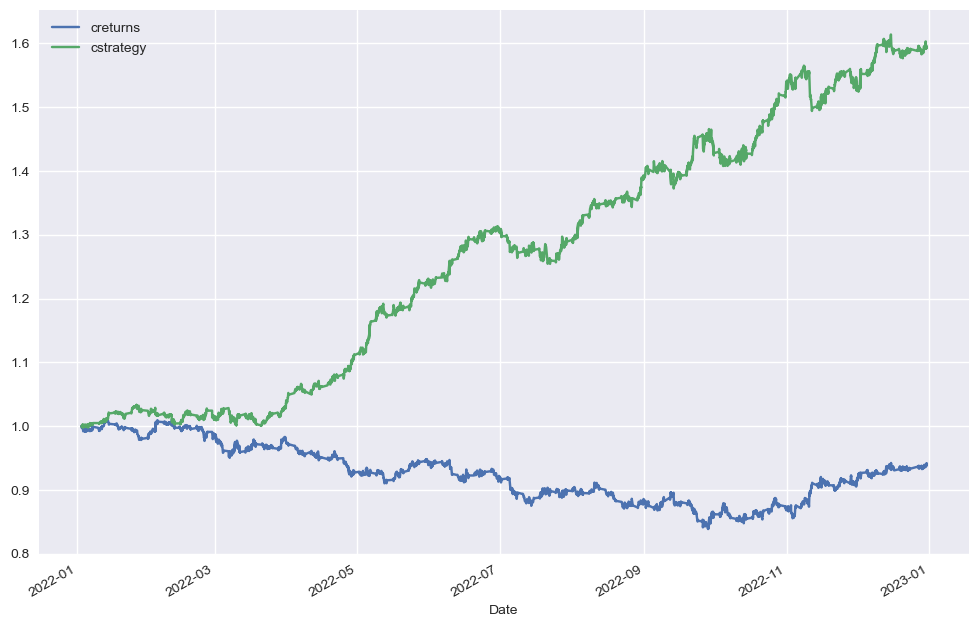

In [266]:
data[["creturns","cstrategy"]].plot(figsize = (12,8))
plt.show()

In [267]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [268]:
data.trades.value_counts()

0.0000    38907
2.0000    35551
Name: trades, dtype: int64

#### Out-Sample Forward Testing

In [269]:
# getting the test intraday data with 5 minutes interval
"""
test_df1 = api.get_history(instrument = "EUR_USD", start = "2023-01-01", end = "2023-07-31",
                granularity = "M5", price = "B")

test_df1.to_csv('test_bid.csv', float_format='%.9f')

test_df2 = api.get_history(instrument = "EUR_USD", start = "2023-01-01", end = "2023-07-31",
                granularity = "M5", price = "A")

test_df2.to_csv('test_ask.csv', float_format='%.9f')

test_df1 = pd.read_csv("test_bid.csv",parse_dates=["time"], index_col="time")

test_df2 = pd.read_csv("test_ask.csv",parse_dates=["time"], index_col="time")

final_data = pd.DataFrame()
final_data['time'] = test_df1.index
mid_price = (test_df1['c']+test_df2['c'])/2
final_data['Price'] = mid_price.reset_index(drop=True).round(9)

final_data = final_data.rename(columns={'time':'Date'})
final_data.to_csv("test_set.csv", float_format='%.9f')
"""
data = pd.read_csv("test_set.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [270]:
data

Price
Date                            
2023-01-01 23:05:00+00:00 1.0700
2023-01-01 23:10:00+00:00 1.0700
2023-01-01 23:15:00+00:00 1.0700
2023-01-01 23:20:00+00:00 1.0700
2023-01-01 23:30:00+00:00 1.0701
...                          ...
2023-07-30 23:35:00+00:00 1.1026
2023-07-30 23:40:00+00:00 1.1027
2023-07-30 23:45:00+00:00 1.1026
2023-07-30 23:50:00+00:00 1.1025
2023-07-30 23:55:00+00:00 1.1024

[43185 rows x 1 columns]

In [271]:
data["returns"] = np.log(data.div(data.shift(1)))

lags = 5
cols = []
for lags in range(1, lags +1):
    col = "lag{}".format(lags)
    data[col] = data.returns.shift(lags)
    cols.append(col)
data.dropna(inplace = True)

data

Price  returns    lag1    lag2    lag3    lag4  \
Date                                                                        
2023-01-02 00:00:00+00:00 1.0705  -0.0000  0.0005  0.0001 -0.0000  0.0001   
2023-01-02 00:15:00+00:00 1.0699  -0.0006 -0.0000  0.0005  0.0001 -0.0000   
2023-01-02 00:20:00+00:00 1.0700   0.0001 -0.0006 -0.0000  0.0005  0.0001   
2023-01-02 00:25:00+00:00 1.0700   0.0000  0.0001 -0.0006 -0.0000  0.0005   
2023-01-02 00:30:00+00:00 1.0700  -0.0000  0.0000  0.0001 -0.0006 -0.0000   
...                          ...      ...     ...     ...     ...     ...   
2023-07-30 23:35:00+00:00 1.1026   0.0001 -0.0001  0.0000  0.0000 -0.0001   
2023-07-30 23:40:00+00:00 1.1027   0.0001  0.0001 -0.0001  0.0000  0.0000   
2023-07-30 23:45:00+00:00 1.1026  -0.0001  0.0001  0.0001 -0.0001  0.0000   
2023-07-30 23:50:00+00:00 1.1025  -0.0000 -0.0001  0.0001  0.0001 -0.0001   
2023-07-30 23:55:00+00:00 1.1024  -0.0001 -0.0000 -0.0001  0.0001  0.0001   

                             lag5  
Date                               
2023-01-02 00:00:00+00:00 -0.0000  
2023-01-02 00:15:00+00:00  0.0001  
2023-01-02 00:20:00+00:00 -0.0000  
2023-01-02 00:25:00+00:00  0.0001  
2023-01-02 00:30:00+00:00  0.0005  
...                           ...  
2023-07-30 23:35:00+00:00  0.0000  
2023-07-30 23:40:00+00:00 -0.0001  
2023-07-30 23:45:00+00:00  0.0000  
2023-07-30 23:50:00+00:00  0.0000  
2023-07-30 23:55:00+00:00 -0.0001  

[43179 rows x 7 columns]

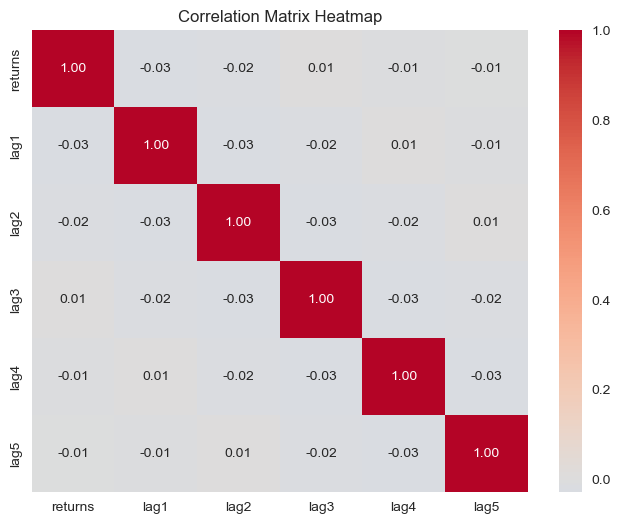

In [272]:
correlation_matrix = data[['returns', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [273]:
data["pred"] = mlm.predict(data[cols].values)

/Users/kanishkgarg/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [274]:
print("Mean Squared Error:", mean_squared_error(data["returns"], data["pred"]))
print("R2 Score:", r2_score(data["returns"], data["pred"]))

Mean Squared Error: 8.603082354340265e-08
R2 Score: 0.0005903485006176767


In [275]:
data

Price  returns    lag1    lag2    lag3    lag4  \
Date                                                                        
2023-01-02 00:00:00+00:00 1.0705  -0.0000  0.0005  0.0001 -0.0000  0.0001   
2023-01-02 00:15:00+00:00 1.0699  -0.0006 -0.0000  0.0005  0.0001 -0.0000   
2023-01-02 00:20:00+00:00 1.0700   0.0001 -0.0006 -0.0000  0.0005  0.0001   
2023-01-02 00:25:00+00:00 1.0700   0.0000  0.0001 -0.0006 -0.0000  0.0005   
2023-01-02 00:30:00+00:00 1.0700  -0.0000  0.0000  0.0001 -0.0006 -0.0000   
...                          ...      ...     ...     ...     ...     ...   
2023-07-30 23:35:00+00:00 1.1026   0.0001 -0.0001  0.0000  0.0000 -0.0001   
2023-07-30 23:40:00+00:00 1.1027   0.0001  0.0001 -0.0001  0.0000  0.0000   
2023-07-30 23:45:00+00:00 1.1026  -0.0001  0.0001  0.0001 -0.0001  0.0000   
2023-07-30 23:50:00+00:00 1.1025  -0.0000 -0.0001  0.0001  0.0001 -0.0001   
2023-07-30 23:55:00+00:00 1.1024  -0.0001 -0.0000 -0.0001  0.0001  0.0001   

                             lag5    pred  
Date                                       
2023-01-02 00:00:00+00:00 -0.0000 -0.0000  
2023-01-02 00:15:00+00:00  0.0001 -0.0000  
2023-01-02 00:20:00+00:00 -0.0000  0.0000  
2023-01-02 00:25:00+00:00  0.0001 -0.0000  
2023-01-02 00:30:00+00:00  0.0005  0.0000  
...                           ...     ...  
2023-07-30 23:35:00+00:00  0.0000  0.0000  
2023-07-30 23:40:00+00:00 -0.0001 -0.0000  
2023-07-30 23:45:00+00:00  0.0000 -0.0000  
2023-07-30 23:50:00+00:00  0.0000  0.0000  
2023-07-30 23:55:00+00:00 -0.0001 -0.0000  

[43179 rows x 8 columns]

In [276]:
data.pred = np.sign(data.pred)

In [277]:
data.pred.value_counts()

-1.0000    26335
1.0000     16844
Name: pred, dtype: int64

In [278]:
hits = np.sign(data.returns * data.pred).value_counts()
hits

1.0000     21759
-1.0000    20791
0.0000       629
dtype: int64

In [279]:
hit_ratio = hits[1.0]/sum(hits)
hit_ratio

0.5039255193496839

In [280]:
data["strategy"] = data.pred * data.returns
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

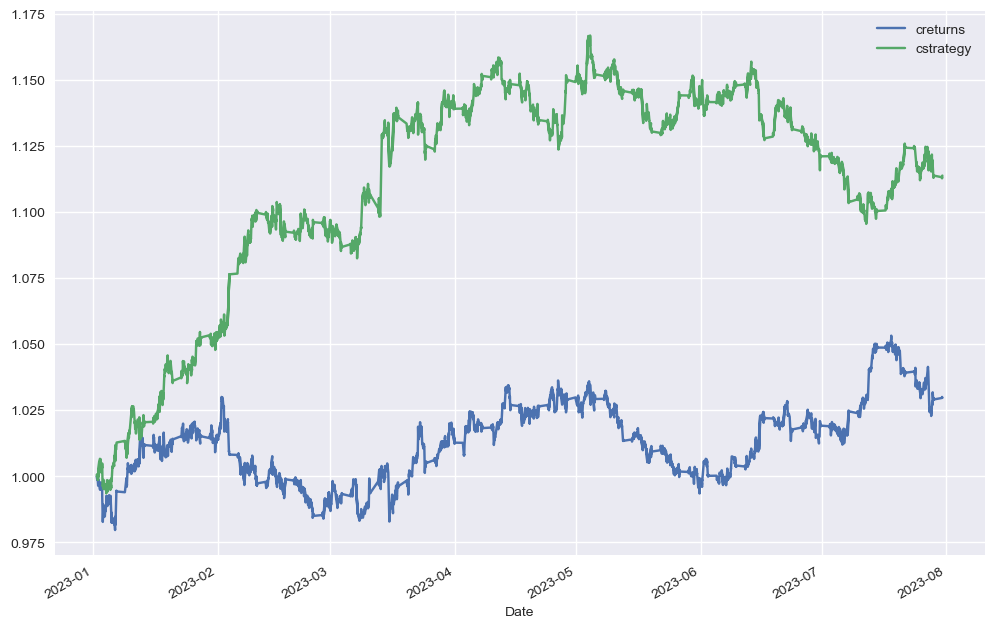

In [281]:
data[["creturns","cstrategy"]].plot(figsize = (12,8))
plt.show()

In [282]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [283]:
data.trades.value_counts()

0.0000    23365
2.0000    19814
Name: trades, dtype: int64

### Logisitic Regression

In [284]:
data = pd.read_csv("five_minute.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [285]:
data["returns"] = np.log(data.div(data.shift(1)))
data.dropna(inplace = True)

In [286]:
data["direction"] = np.sign(data.returns)

In [287]:
data

Price  returns  direction
Date                                          
2022-01-02 22:05:00 1.1369  -0.0003    -1.0000
2022-01-02 22:10:00 1.1374   0.0005     1.0000
2022-01-02 22:15:00 1.1374   0.0000     0.0000
2022-01-02 22:20:00 1.1375   0.0000     1.0000
2022-01-02 22:25:00 1.1375   0.0000     1.0000
...                    ...      ...        ...
2022-12-30 21:35:00 1.0702  -0.0001    -1.0000
2022-12-30 21:40:00 1.0703   0.0001     1.0000
2022-12-30 21:45:00 1.0704   0.0001     1.0000
2022-12-30 21:50:00 1.0700  -0.0003    -1.0000
2022-12-30 21:55:00 1.0704   0.0003     1.0000

[74463 rows x 3 columns]

In [288]:
data.direction.value_counts()

-1.0000    36945
1.0000     36720
0.0000       798
Name: direction, dtype: int64

In [289]:
lags = 5
cols = []
for lags in range(1, lags +1):
    col = "lag{}".format(lags)
    data[col] = data.returns.shift(lags)
    cols.append(col)
data.dropna(inplace = True)
data

Price  returns  direction    lag1    lag2    lag3  \
Date                                                                     
2022-01-02 22:30:00 1.1374  -0.0001    -1.0000  0.0000  0.0000  0.0000   
2022-01-02 22:35:00 1.1374   0.0000     1.0000 -0.0001  0.0000  0.0000   
2022-01-02 22:40:00 1.1375   0.0000     1.0000  0.0000 -0.0001  0.0000   
2022-01-02 22:45:00 1.1375   0.0001     1.0000  0.0000  0.0000 -0.0001   
2022-01-02 22:50:00 1.1375  -0.0000    -1.0000  0.0001  0.0000  0.0000   
...                    ...      ...        ...     ...     ...     ...   
2022-12-30 21:35:00 1.0702  -0.0001    -1.0000 -0.0001  0.0001  0.0001   
2022-12-30 21:40:00 1.0703   0.0001     1.0000 -0.0001 -0.0001  0.0001   
2022-12-30 21:45:00 1.0704   0.0001     1.0000  0.0001 -0.0001 -0.0001   
2022-12-30 21:50:00 1.0700  -0.0003    -1.0000  0.0001  0.0001 -0.0001   
2022-12-30 21:55:00 1.0704   0.0003     1.0000 -0.0003  0.0001  0.0001   

                       lag4    lag5  
Date                                 
2022-01-02 22:30:00  0.0005 -0.0003  
2022-01-02 22:35:00  0.0000  0.0005  
2022-01-02 22:40:00  0.0000  0.0000  
2022-01-02 22:45:00  0.0000  0.0000  
2022-01-02 22:50:00 -0.0001  0.0000  
...                     ...     ...  
2022-12-30 21:35:00 -0.0001  0.0000  
2022-12-30 21:40:00  0.0001 -0.0001  
2022-12-30 21:45:00  0.0001  0.0001  
2022-12-30 21:50:00 -0.0001  0.0001  
2022-12-30 21:55:00 -0.0001 -0.0001  

[74458 rows x 8 columns]

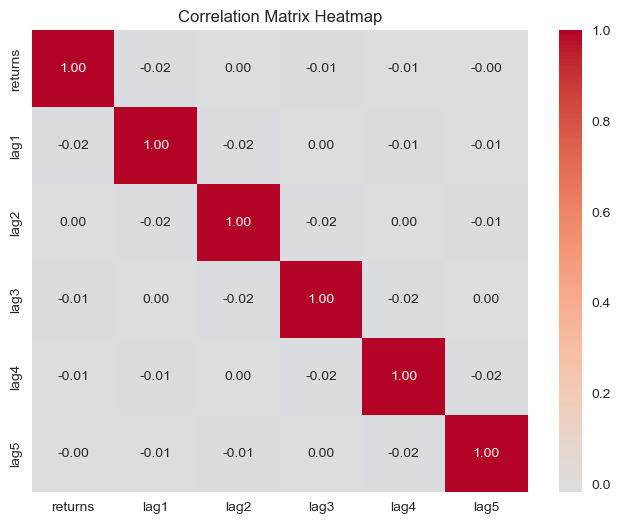

In [290]:
correlation_matrix = data[['returns', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [291]:
lgr = LogisticRegression(C = 1e6 , max_iter = 100000, multi_class = "ovr")

In [292]:
lgr.fit(data[cols],data.direction)

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [293]:
data["pred"] = lgr.predict(data[cols])

In [294]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['1', '0','-1'])
    ax.yaxis.set_ticklabels(['1', '0','-1'])
    plt.show()


Classification Report:               precision    recall  f1-score   support

        -1.0       0.51      0.58      0.55     36944
         0.0       1.00      0.00      0.00       797
         1.0       0.51      0.45      0.48     36717

    accuracy                           0.51     74458
   macro avg       0.67      0.34      0.34     74458
weighted avg       0.52      0.51      0.51     74458



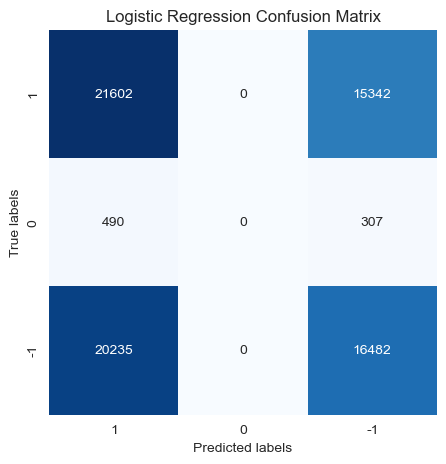

In [295]:
print("Classification Report:",classification_report(data["direction"],data["pred"], zero_division=1))
lgr_cm = confusion_matrix(data["direction"],data["pred"])
plot_confusion_matrix(lgr_cm, 'Logistic Regression Confusion Matrix')

In [296]:
data

Price  returns  direction    lag1    lag2    lag3  \
Date                                                                     
2022-01-02 22:30:00 1.1374  -0.0001    -1.0000  0.0000  0.0000  0.0000   
2022-01-02 22:35:00 1.1374   0.0000     1.0000 -0.0001  0.0000  0.0000   
2022-01-02 22:40:00 1.1375   0.0000     1.0000  0.0000 -0.0001  0.0000   
2022-01-02 22:45:00 1.1375   0.0001     1.0000  0.0000  0.0000 -0.0001   
2022-01-02 22:50:00 1.1375  -0.0000    -1.0000  0.0001  0.0000  0.0000   
...                    ...      ...        ...     ...     ...     ...   
2022-12-30 21:35:00 1.0702  -0.0001    -1.0000 -0.0001  0.0001  0.0001   
2022-12-30 21:40:00 1.0703   0.0001     1.0000 -0.0001 -0.0001  0.0001   
2022-12-30 21:45:00 1.0704   0.0001     1.0000  0.0001 -0.0001 -0.0001   
2022-12-30 21:50:00 1.0700  -0.0003    -1.0000  0.0001  0.0001 -0.0001   
2022-12-30 21:55:00 1.0704   0.0003     1.0000 -0.0003  0.0001  0.0001   

                       lag4    lag5    pred  
Date                                         
2022-01-02 22:30:00  0.0005 -0.0003 -1.0000  
2022-01-02 22:35:00  0.0000  0.0005 -1.0000  
2022-01-02 22:40:00  0.0000  0.0000 -1.0000  
2022-01-02 22:45:00  0.0000  0.0000 -1.0000  
2022-01-02 22:50:00 -0.0001  0.0000 -1.0000  
...                     ...     ...     ...  
2022-12-30 21:35:00 -0.0001  0.0000  1.0000  
2022-12-30 21:40:00  0.0001 -0.0001  1.0000  
2022-12-30 21:45:00  0.0001  0.0001 -1.0000  
2022-12-30 21:50:00 -0.0001  0.0001 -1.0000  
2022-12-30 21:55:00 -0.0001 -0.0001  1.0000  

[74458 rows x 9 columns]

In [297]:
data.pred.value_counts()

-1.0000    42327
1.0000     32131
Name: pred, dtype: int64

In [298]:
hits = np.sign(data.direction * data.pred).value_counts()
hits

1.0000     38084
-1.0000    35577
0.0000       797
dtype: int64

In [299]:
hit_ratio = hits[1.0]/sum(hits)
hit_ratio

0.5114829836955062

#### In-Sample Backtesting

In [300]:
data["strategy"] = data.pred * data.returns
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

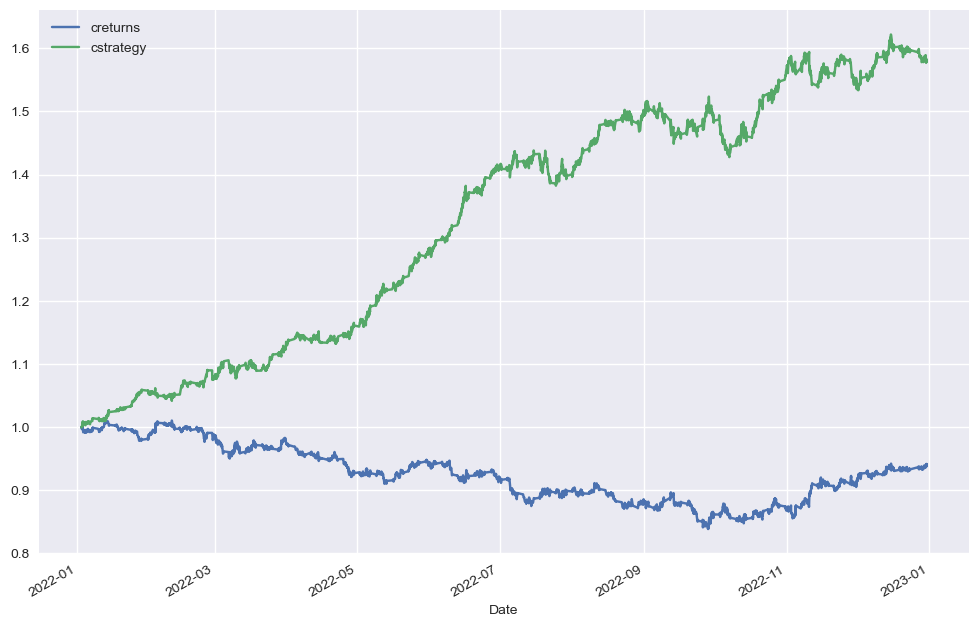

In [301]:
data[["creturns","cstrategy"]].plot(figsize = (12,8))
plt.show()

In [302]:
data["trades"] = data.pred.diff().fillna(0).abs()
data.trades.value_counts()

0.0000    52871
2.0000    21587
Name: trades, dtype: int64

#### Out-Sample Forward testing

In [303]:
data = pd.read_csv("test_set.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

data["returns"] = np.log(data.div(data.shift(1)))

lags = 5
cols = []
for lags in range(1, lags +1):
    col = "lag{}".format(lags)
    data[col] = data.returns.shift(lags)
    cols.append(col)
data.dropna(inplace = True)

data

Price  returns    lag1    lag2    lag3    lag4  \
Date                                                                        
2023-01-02 00:00:00+00:00 1.0705  -0.0000  0.0005  0.0001 -0.0000  0.0001   
2023-01-02 00:15:00+00:00 1.0699  -0.0006 -0.0000  0.0005  0.0001 -0.0000   
2023-01-02 00:20:00+00:00 1.0700   0.0001 -0.0006 -0.0000  0.0005  0.0001   
2023-01-02 00:25:00+00:00 1.0700   0.0000  0.0001 -0.0006 -0.0000  0.0005   
2023-01-02 00:30:00+00:00 1.0700  -0.0000  0.0000  0.0001 -0.0006 -0.0000   
...                          ...      ...     ...     ...     ...     ...   
2023-07-30 23:35:00+00:00 1.1026   0.0001 -0.0001  0.0000  0.0000 -0.0001   
2023-07-30 23:40:00+00:00 1.1027   0.0001  0.0001 -0.0001  0.0000  0.0000   
2023-07-30 23:45:00+00:00 1.1026  -0.0001  0.0001  0.0001 -0.0001  0.0000   
2023-07-30 23:50:00+00:00 1.1025  -0.0000 -0.0001  0.0001  0.0001 -0.0001   
2023-07-30 23:55:00+00:00 1.1024  -0.0001 -0.0000 -0.0001  0.0001  0.0001   

                             lag5  
Date                               
2023-01-02 00:00:00+00:00 -0.0000  
2023-01-02 00:15:00+00:00  0.0001  
2023-01-02 00:20:00+00:00 -0.0000  
2023-01-02 00:25:00+00:00  0.0001  
2023-01-02 00:30:00+00:00  0.0005  
...                           ...  
2023-07-30 23:35:00+00:00  0.0000  
2023-07-30 23:40:00+00:00 -0.0001  
2023-07-30 23:45:00+00:00  0.0000  
2023-07-30 23:50:00+00:00  0.0000  
2023-07-30 23:55:00+00:00 -0.0001  

[43179 rows x 7 columns]

In [304]:
data["pred"] = lgr.predict(data[cols].values)

/Users/kanishkgarg/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [305]:
data

Price  returns    lag1    lag2    lag3    lag4  \
Date                                                                        
2023-01-02 00:00:00+00:00 1.0705  -0.0000  0.0005  0.0001 -0.0000  0.0001   
2023-01-02 00:15:00+00:00 1.0699  -0.0006 -0.0000  0.0005  0.0001 -0.0000   
2023-01-02 00:20:00+00:00 1.0700   0.0001 -0.0006 -0.0000  0.0005  0.0001   
2023-01-02 00:25:00+00:00 1.0700   0.0000  0.0001 -0.0006 -0.0000  0.0005   
2023-01-02 00:30:00+00:00 1.0700  -0.0000  0.0000  0.0001 -0.0006 -0.0000   
...                          ...      ...     ...     ...     ...     ...   
2023-07-30 23:35:00+00:00 1.1026   0.0001 -0.0001  0.0000  0.0000 -0.0001   
2023-07-30 23:40:00+00:00 1.1027   0.0001  0.0001 -0.0001  0.0000  0.0000   
2023-07-30 23:45:00+00:00 1.1026  -0.0001  0.0001  0.0001 -0.0001  0.0000   
2023-07-30 23:50:00+00:00 1.1025  -0.0000 -0.0001  0.0001  0.0001 -0.0001   
2023-07-30 23:55:00+00:00 1.1024  -0.0001 -0.0000 -0.0001  0.0001  0.0001   

                             lag5    pred  
Date                                       
2023-01-02 00:00:00+00:00 -0.0000 -1.0000  
2023-01-02 00:15:00+00:00  0.0001 -1.0000  
2023-01-02 00:20:00+00:00 -0.0000  1.0000  
2023-01-02 00:25:00+00:00  0.0001 -1.0000  
2023-01-02 00:30:00+00:00  0.0005  1.0000  
...                           ...     ...  
2023-07-30 23:35:00+00:00  0.0000  1.0000  
2023-07-30 23:40:00+00:00 -0.0001 -1.0000  
2023-07-30 23:45:00+00:00  0.0000 -1.0000  
2023-07-30 23:50:00+00:00  0.0000 -1.0000  
2023-07-30 23:55:00+00:00 -0.0001 -1.0000  

[43179 rows x 8 columns]

In [306]:
data.pred = np.sign(data.pred)

data.pred.value_counts()

hits = np.sign(data.returns * data.pred).value_counts()
hits

hit_ratio = hits[1.0]/sum(hits)
hit_ratio

0.5066120104680516

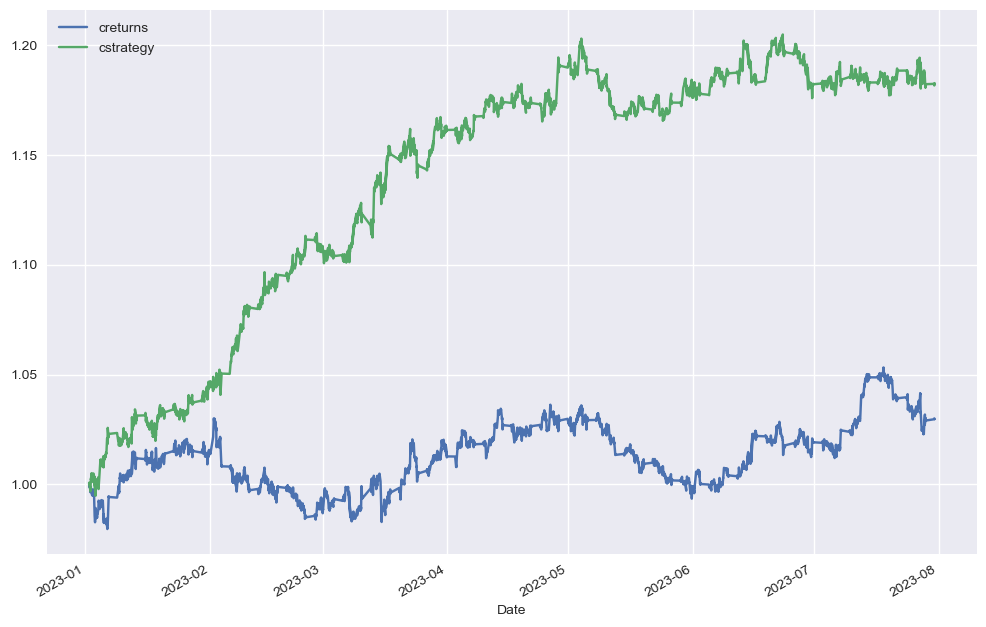

In [307]:
data["strategy"] = data.pred * data.returns
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

data[["creturns","cstrategy"]].plot(figsize = (12,8))
plt.show()

In [308]:
data["trades"] = data.pred.diff().fillna(0).abs()

data.trades.value_counts()

0.0000    31041
2.0000    12138
Name: trades, dtype: int64

In [309]:
class MLBacktester():
    ''' Class for the vectorized backtesting of Machine Learning-based trading strategies (Classification).
    '''

    def __init__(self, symbol, start, end, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        start: str
            start date for data import
        end: str
            end date for data import
        tc: float
            proportional transaction/trading costs per trade
        '''
        self.symbol = symbol
        self.start = start
        self.end = end
        self.tc = tc
        self.model = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")
        self.results = None
        self.get_data()
    
    def __repr__(self):
        rep = "MLBacktester(symbol = {}, start = {}, end = {}, tc = {})"
        return rep.format(self.symbol, self.start, self.end, self.tc)
                             
    def get_data(self):
        ''' Imports the data from five_minute_pairs.csv (source can be changed).
        '''
        raw = pd.read_csv("five_minute.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw.drop(['Unnamed: 0'], axis=1)
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "Price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
                             
    def split_data(self, start, end):
        ''' Splits the data into training set & test set.
        '''
        data = self.data.loc[start:end].copy()
        return data
    
    def prepare_features(self, start, end):
        ''' Prepares the feature columns for training set and test set.
        '''
        self.data_subset = self.split_data(start, end)
        self.feature_columns = []
        for lag in range(1, self.lags + 1):
            col = "lag{}".format(lag)
            self.data_subset[col] = self.data_subset["returns"].shift(lag)
            self.feature_columns.append(col)
        self.data_subset.dropna(inplace=True)
        
    def fit_model(self, start, end):
        ''' Fitting the ML Model.
        '''
        self.prepare_features(start, end)
        self.model.fit(self.data_subset[self.feature_columns], np.sign(self.data_subset["returns"]))
        
    def test_strategy(self, train_ratio = 0.7, lags = 5):
        ''' 
        Backtests the ML-based strategy.
        
        Parameters
        ----------
        train_ratio: float (between 0 and 1.0 excl.)
            Splitting the dataset into training set (train_ratio) and test set (1 - train_ratio).
        lags: int
            number of lags serving as model features.
        '''
        self.lags = lags
                  
        # determining datetime for start, end and split (for training an testing period)
        full_data = self.data.copy()
        split_index = int(len(full_data) * train_ratio)
        split_date = full_data.index[split_index-1]
        train_start = full_data.index[0]
        test_end = full_data.index[-1]
        
        # fit the model on the training set
        self.fit_model(train_start, split_date)
        
        # prepare the test set
        self.prepare_features(split_date, test_end)
                  
        # make predictions on the test set
        predict = self.model.predict(self.data_subset[self.feature_columns])
        self.data_subset["pred"] = predict
        
        # calculate Strategy Returns
        self.data_subset["strategy"] = self.data_subset["pred"] * self.data_subset["returns"]
        
        # determine the number of trades in each bar
        self.data_subset["trades"] = self.data_subset["pred"].diff().fillna(0).abs()
        
        # subtract transaction/trading costs from pre-cost return
        self.data_subset.strategy = self.data_subset.strategy - self.data_subset.trades * self.tc
        
        # calculate cumulative returns for strategy & buy and hold
        self.data_subset["creturns"] = self.data_subset["returns"].cumsum().apply(np.exp)
        self.data_subset["cstrategy"] = self.data_subset['strategy'].cumsum().apply(np.exp)
        self.results = self.data_subset
        
        perf = self.results["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - self.results["creturns"].iloc[-1] # out-/underperformance of strategy
        
        return round(perf, 6), round(outperf, 6)
        
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "Logistic Regression: {} | TC = {}".format(self.symbol, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            fig, ax1 = plt.subplots(figsize=(12,8))

            title = "{} | Lags = {}".format(self.symbol, self.lags)
            ax1.set_title(title)

            self.results['Price'].plot(ax=ax1, color='#708EBB', label = "Price")

            ax2 = ax1.twinx()

            ax2.scatter(self.results.index, self.results['pred'], color='#fc9272', label = "Position")

            ax2.set_ylabel('Position')
            ax2.yaxis.label.set_color('blue')

            lines1, labels1 = ax1.get_legend_handles_labels()  
            lines2, labels2 = ax2.get_legend_handles_labels()

            ax2.legend(lines1+lines2, labels1+labels2)


In [310]:
ptc = 0.0007
lgr_ml = MLBacktester("EUR/USD","2021-01-01","2023-07-31",ptc)

In [311]:
lgr_ml

MLBacktester(symbol = EUR/USD, start = 2021-01-01, end = 2023-07-31, tc = 0.0007)

In [312]:
lgr_ml.data

Price  returns
Date                               
2022-01-02 22:00:00 1.1373      NaN
2022-01-02 22:05:00 1.1369  -0.0003
2022-01-02 22:10:00 1.1374   0.0005
2022-01-02 22:15:00 1.1374   0.0000
2022-01-02 22:20:00 1.1375   0.0000
...                    ...      ...
2022-12-30 21:35:00 1.0702  -0.0001
2022-12-30 21:40:00 1.0703   0.0001
2022-12-30 21:45:00 1.0704   0.0001
2022-12-30 21:50:00 1.0700  -0.0003
2022-12-30 21:55:00 1.0704   0.0003

[74464 rows x 2 columns]

In [313]:
lgr_ml.test_strategy(train_ratio = 0.7, lags = 5)

(0.000117, -1.054839)

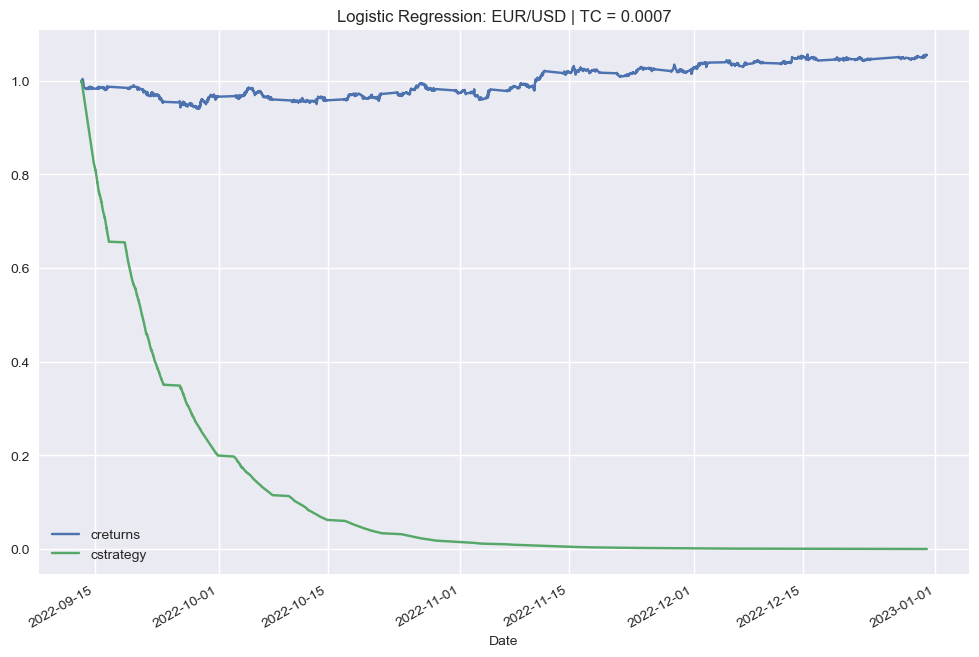

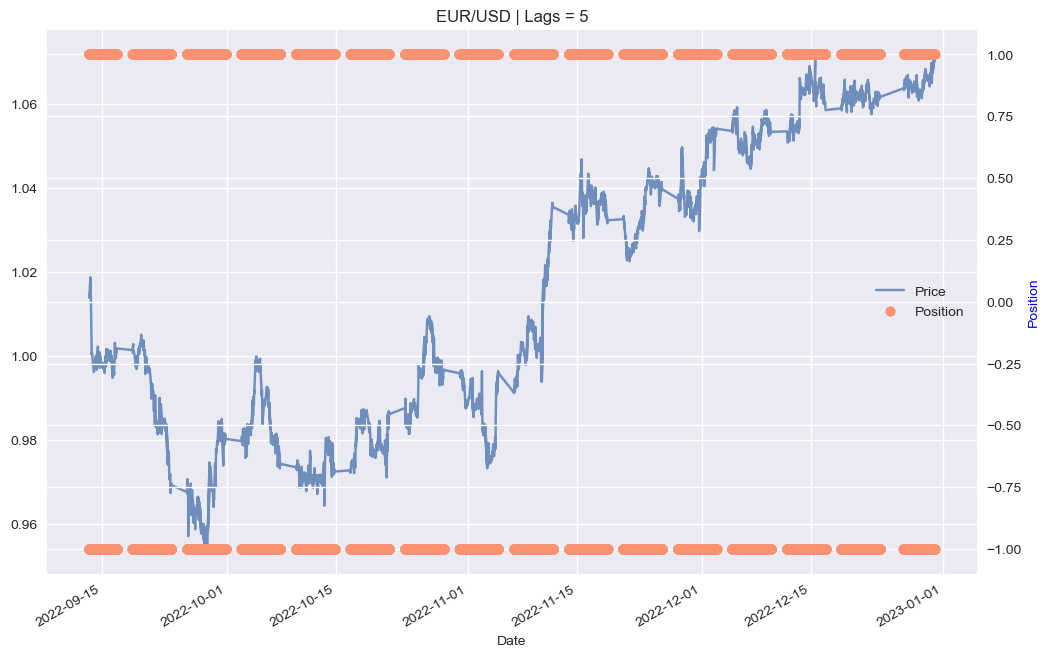

In [314]:
lgr_ml.plot_results()

In [315]:
lgr_ml.results

Price  returns    lag1    lag2    lag3    lag4    lag5  \
Date                                                                          
2022-09-13 07:30:00 1.0146  -0.0000  0.0003  0.0008  0.0005 -0.0005 -0.0014   
2022-09-13 07:35:00 1.0145  -0.0001 -0.0000  0.0003  0.0008  0.0005 -0.0005   
2022-09-13 07:40:00 1.0142  -0.0003 -0.0001 -0.0000  0.0003  0.0008  0.0005   
2022-09-13 07:45:00 1.0142  -0.0000 -0.0003 -0.0001 -0.0000  0.0003  0.0008   
2022-09-13 07:50:00 1.0144   0.0002 -0.0000 -0.0003 -0.0001 -0.0000  0.0003   
...                    ...      ...     ...     ...     ...     ...     ...   
2022-12-30 21:35:00 1.0702  -0.0001 -0.0001  0.0001  0.0001 -0.0001  0.0000   
2022-12-30 21:40:00 1.0703   0.0001 -0.0001 -0.0001  0.0001  0.0001 -0.0001   
2022-12-30 21:45:00 1.0704   0.0001  0.0001 -0.0001 -0.0001  0.0001  0.0001   
2022-12-30 21:50:00 1.0700  -0.0003  0.0001  0.0001 -0.0001 -0.0001  0.0001   
2022-12-30 21:55:00 1.0704   0.0003 -0.0003  0.0001  0.0001 -0.0001 -0.0001   

                       pred  strategy  trades  creturns  cstrategy  
Date                                                                
2022-09-13 07:30:00 -1.0000    0.0000  0.0000    1.0000     1.0000  
2022-09-13 07:35:00 -1.0000    0.0001  0.0000    0.9999     1.0001  
2022-09-13 07:40:00 -1.0000    0.0003  0.0000    0.9996     1.0004  
2022-09-13 07:45:00 -1.0000    0.0000  0.0000    0.9996     1.0004  
2022-09-13 07:50:00  1.0000   -0.0012  2.0000    0.9997     0.9992  
...                     ...       ...     ...       ...        ...  
2022-12-30 21:35:00 -1.0000    0.0001  0.0000    1.0547     0.0001  
2022-12-30 21:40:00  1.0000   -0.0013  2.0000    1.0548     0.0001  
2022-12-30 21:45:00 -1.0000   -0.0015  2.0000    1.0549     0.0001  
2022-12-30 21:50:00 -1.0000    0.0003  0.0000    1.0546     0.0001  
2022-12-30 21:55:00  1.0000   -0.0011  2.0000    1.0550     0.0001  

[22336 rows x 12 columns]

In [316]:
for lags in range (1,21):
    print(lags, lgr_ml.test_strategy(train_ratio=0.7, lags = lags))

1 (0.0, -1.056158)
2 (1.5e-05, -1.056707)
3 (3.7e-05, -1.056126)
4 (9.2e-05, -1.055181)
5 (0.000117, -1.054839)
6 (0.000107, -1.054854)
7 (6.1e-05, -1.054989)
8 (4.6e-05, -1.055326)
9 (4.1e-05, -1.055352)
10 (4e-05, -1.055187)
11 (3.6e-05, -1.054827)
12 (3.6e-05, -1.054775)
13 (3.5e-05, -1.054875)
14 (4.5e-05, -1.054947)
15 (3.2e-05, -1.055486)
16 (3.1e-05, -1.05569)
17 (2.6e-05, -1.055825)
18 (3.1e-05, -1.055648)
19 (2.8e-05, -1.054606)
20 (2e-05, -1.054676)


In [317]:
lgr_ml.results.trades.value_counts()

0.0000    14502
2.0000     7819
Name: trades, dtype: int64

### Deep Neural Network

In [318]:
# getting the  intraday data with 15 minute candleStick
"""
minute15_df1 = api.get_history(instrument = "EUR_USD", start = "2015-01-01", end = "2023-07-31",
                granularity = "M15", price = "B")

minute15_df1.to_csv('minute15_bid.csv', float_format='%.9f')

minute15_df2 = api.get_history(instrument = "EUR_USD", start = "2015-01-01", end = "2023-07-31",
                granularity = "M15", price = "A")

minute15_df2.to_csv('minute15_ask.csv', float_format='%.9f')

minute15_df1 = pd.read_csv("minute15_bid.csv",parse_dates=["time"], index_col="time")

minute15_df2 = pd.read_csv("minute15_ask.csv",parse_dates=["time"], index_col="time")

final_data = pd.DataFrame()
final_data['time'] = minute15_df1.index
mid_price = (minute15_df1['c']+minute15_df2['c'])/2
final_data['Price'] = mid_price.reset_index(drop=True).round(9)

final_data = final_data.rename(columns={'time':'Date'})
final_data.to_csv("fiften_minute.csv", float_format='%.9f')
"""

'\nminute15_df1 = api.get_history(instrument = "EUR_USD", start = "2015-01-01", end = "2023-07-31",\n                granularity = "M15", price = "B")\n\nminute15_df1.to_csv(\'minute15_bid.csv\', float_format=\'%.9f\')\n\nminute15_df2 = api.get_history(instrument = "EUR_USD", start = "2015-01-01", end = "2023-07-31",\n                granularity = "M15", price = "A")\n\nminute15_df2.to_csv(\'minute15_ask.csv\', float_format=\'%.9f\')\n\nminute15_df1 = pd.read_csv("minute15_bid.csv",parse_dates=["time"], index_col="time")\n\nminute15_df2 = pd.read_csv("minute15_ask.csv",parse_dates=["time"], index_col="time")\n\nfinal_data = pd.DataFrame()\nfinal_data[\'time\'] = minute15_df1.index\nmid_price = (minute15_df1[\'c\']+minute15_df2[\'c\'])/2\nfinal_data[\'Price\'] = mid_price.reset_index(drop=True).round(9)\n\nfinal_data = final_data.rename(columns={\'time\':\'Date\'})\nfinal_data.to_csv("fiften_minute.csv", float_format=\'%.9f\')\n'

In [319]:
data = pd.read_csv("fiften_minute.csv", parse_dates=["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)

In [320]:
data

Price
Date                            
2015-01-01 22:00:00+00:00 1.2105
2015-01-01 22:15:00+00:00 1.2103
2015-01-01 22:30:00+00:00 1.2104
2015-01-01 22:45:00+00:00 1.2102
2015-01-01 23:00:00+00:00 1.2101
...                          ...
2023-07-30 22:45:00+00:00 1.1027
2023-07-30 23:00:00+00:00 1.1027
2023-07-30 23:15:00+00:00 1.1025
2023-07-30 23:30:00+00:00 1.1027
2023-07-30 23:45:00+00:00 1.1024

[213300 rows x 1 columns]

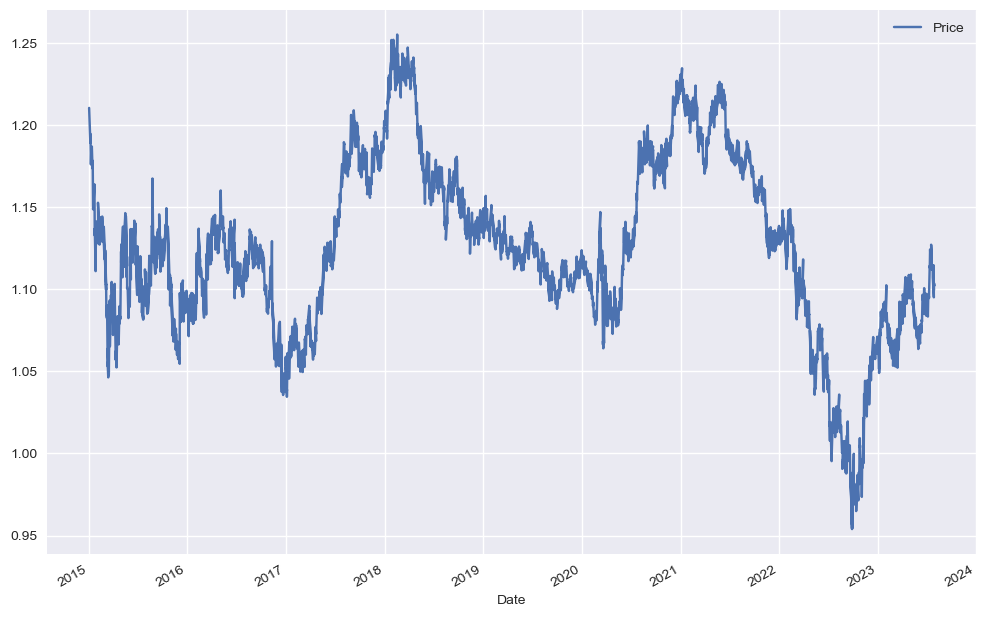

In [321]:
data.plot(figsize=(12,8))
plt.show()

In [322]:
price = data.columns[0]
data["returns"] = np.log(data[price]/data[price].shift())

In [323]:
data

Price  returns
Date                                     
2015-01-01 22:00:00+00:00 1.2105      NaN
2015-01-01 22:15:00+00:00 1.2103  -0.0002
2015-01-01 22:30:00+00:00 1.2104   0.0001
2015-01-01 22:45:00+00:00 1.2102  -0.0002
2015-01-01 23:00:00+00:00 1.2101  -0.0001
...                          ...      ...
2023-07-30 22:45:00+00:00 1.1027   0.0001
2023-07-30 23:00:00+00:00 1.1027  -0.0000
2023-07-30 23:15:00+00:00 1.1025  -0.0001
2023-07-30 23:30:00+00:00 1.1027   0.0001
2023-07-30 23:45:00+00:00 1.1024  -0.0002

[213300 rows x 2 columns]

In [324]:
window = 50
df = data.copy()
df["dir"] = np.where(df["returns"]>0,1,0)
df["sma"] = df["Price"].rolling(window).mean() - df["Price"].rolling(150).mean()
df["boll"] = (df["Price"] - df["Price"].rolling(window).mean())
df["min"] = df["Price"].rolling(window).min()/df["Price"]-1 # rolling minimum
df["max"] = df["Price"].rolling(window).max()/df["Price"]-1 # rolling maximum
df["mom"] = df["returns"].rolling(3).mean() # rolling mean returns
df["vol"] = df["returns"].rolling(window).std() # returns volatility
df.dropna(inplace = True)

In [325]:
df

Price  returns  dir     sma    boll     min    max  \
Date                                                                            
2015-01-05 11:15:00+00:00 1.1917   0.0000    1 -0.0061 -0.0031 -0.0000 0.0045   
2015-01-05 11:30:00+00:00 1.1905  -0.0010    0 -0.0060 -0.0043  0.0000 0.0055   
2015-01-05 11:45:00+00:00 1.1906   0.0001    1 -0.0060 -0.0041 -0.0001 0.0054   
2015-01-05 12:00:00+00:00 1.1915   0.0008    1 -0.0059 -0.0031 -0.0009 0.0046   
2015-01-05 12:15:00+00:00 1.1906  -0.0007    0 -0.0058 -0.0039 -0.0002 0.0053   
...                          ...      ...  ...     ...     ...     ...    ...   
2023-07-30 22:45:00+00:00 1.1027   0.0001    1  0.0013  0.0007 -0.0030 0.0010   
2023-07-30 23:00:00+00:00 1.1027  -0.0000    0  0.0014  0.0006 -0.0030 0.0010   
2023-07-30 23:15:00+00:00 1.1025  -0.0001    0  0.0016  0.0004 -0.0025 0.0012   
2023-07-30 23:30:00+00:00 1.1027   0.0001    1  0.0017  0.0005 -0.0026 0.0011   
2023-07-30 23:45:00+00:00 1.1024  -0.0002    0  0.0018  0.0002 -0.0024 0.0013   

                              mom    vol  
Date                                      
2015-01-05 11:15:00+00:00 -0.0003 0.0006  
2015-01-05 11:30:00+00:00 -0.0004 0.0006  
2015-01-05 11:45:00+00:00 -0.0003 0.0006  
2015-01-05 12:00:00+00:00 -0.0001 0.0006  
2015-01-05 12:15:00+00:00  0.0001 0.0006  
...                           ...    ...  
2023-07-30 22:45:00+00:00  0.0001 0.0005  
2023-07-30 23:00:00+00:00  0.0001 0.0005  
2023-07-30 23:15:00+00:00 -0.0000 0.0005  
2023-07-30 23:30:00+00:00 -0.0000 0.0005  
2023-07-30 23:45:00+00:00 -0.0001 0.0005  

[213151 rows x 9 columns]

In [326]:
lags = 5
cols = []
features = ["dir","sma", "boll", "min", "max", "mom","vol"]

for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag_{}".format(f,lag)
        df[col] = df[f].shift(lag)
        cols.append(col)
df.dropna(inplace = True)

In [327]:
df

Price  returns  dir     sma    boll     min    max  \
Date                                                                            
2015-01-05 12:30:00+00:00 1.1894  -0.0011    0 -0.0059 -0.0050  0.0000 0.0064   
2015-01-05 12:45:00+00:00 1.1900   0.0005    1 -0.0059 -0.0043 -0.0005 0.0059   
2015-01-05 13:00:00+00:00 1.1915   0.0013    1 -0.0059 -0.0026 -0.0018 0.0045   
2015-01-05 13:15:00+00:00 1.1917   0.0001    1 -0.0058 -0.0024 -0.0019 0.0044   
2015-01-05 13:30:00+00:00 1.1924   0.0006    1 -0.0058 -0.0016 -0.0025 0.0036   
...                          ...      ...  ...     ...     ...     ...    ...   
2023-07-30 22:45:00+00:00 1.1027   0.0001    1  0.0013  0.0007 -0.0030 0.0010   
2023-07-30 23:00:00+00:00 1.1027  -0.0000    0  0.0014  0.0006 -0.0030 0.0010   
2023-07-30 23:15:00+00:00 1.1025  -0.0001    0  0.0016  0.0004 -0.0025 0.0012   
2023-07-30 23:30:00+00:00 1.1027   0.0001    1  0.0017  0.0005 -0.0026 0.0011   
2023-07-30 23:45:00+00:00 1.1024  -0.0002    0  0.0018  0.0002 -0.0024 0.0013   

                              mom    vol  dir_lag_1  ...  mom_lag_1  \
Date                                                 ...              
2015-01-05 12:30:00+00:00 -0.0003 0.0006     0.0000  ...     0.0001   
2015-01-05 12:45:00+00:00 -0.0004 0.0006     0.0000  ...    -0.0003   
2015-01-05 13:00:00+00:00  0.0002 0.0006     1.0000  ...    -0.0004   
2015-01-05 13:15:00+00:00  0.0006 0.0006     1.0000  ...     0.0002   
2015-01-05 13:30:00+00:00  0.0007 0.0006     1.0000  ...     0.0006   
...                           ...    ...        ...  ...        ...   
2023-07-30 22:45:00+00:00  0.0001 0.0005     1.0000  ...     0.0001   
2023-07-30 23:00:00+00:00  0.0001 0.0005     1.0000  ...     0.0001   
2023-07-30 23:15:00+00:00 -0.0000 0.0005     0.0000  ...     0.0001   
2023-07-30 23:30:00+00:00 -0.0000 0.0005     0.0000  ...    -0.0000   
2023-07-30 23:45:00+00:00 -0.0001 0.0005     1.0000  ...    -0.0000   

                           mom_lag_2  mom_lag_3  mom_lag_4  mom_lag_5  \
Date                                                                    
2015-01-05 12:30:00+00:00    -0.0001    -0.0003    -0.0004    -0.0003   
2015-01-05 12:45:00+00:00     0.0001    -0.0001    -0.0003    -0.0004   
2015-01-05 13:00:00+00:00    -0.0003     0.0001    -0.0001    -0.0003   
2015-01-05 13:15:00+00:00    -0.0004    -0.0003     0.0001    -0.0001   
2015-01-05 13:30:00+00:00     0.0002    -0.0004    -0.0003     0.0001   
...                              ...        ...        ...        ...   
2023-07-30 22:45:00+00:00     0.0001     0.0001     0.0000     0.0001   
2023-07-30 23:00:00+00:00     0.0001     0.0001     0.0001     0.0000   
2023-07-30 23:15:00+00:00     0.0001     0.0001     0.0001     0.0001   
2023-07-30 23:30:00+00:00     0.0001     0.0001     0.0001     0.0001   
2023-07-30 23:45:00+00:00    -0.0000     0.0001     0.0001     0.0001   

                           vol_lag_1  vol_lag_2  vol_lag_3  vol_lag_4  \
Date                                                                    
2015-01-05 12:30:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 12:45:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 13:00:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 13:15:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 13:30:00+00:00     0.0006     0.0006     0.0006     0.0006   
...                              ...        ...        ...        ...   
2023-07-30 22:45:00+00:00     0.0006     0.0006     0.0006     0.0006   
2023-07-30 23:00:00+00:00     0.0005     0.0006     0.0006     0.0006   
2023-07-30 23:15:00+00:00     0.0005     0.0005     0.0006     0.0006   
2023-07-30 23:30:00+00:00     0.0005     0.0005     0.0005     0.0006   
2023-07-30 23:45:00+00:00     0.0005     0.0005     0.0005     0.0005   

                           vol_lag_5  
Date                                  
2015-01-05 12:30:00+00:00     0.0006  
2015-01-05 12:45:00+00:00     0.

In [328]:
# splitting data into training and test set
split = int(len(df)*0.66)
train = df.iloc[:split].copy()
test = df.iloc[split:].copy()

In [329]:
train

Price  returns  dir     sma    boll     min    max  \
Date                                                                            
2015-01-05 12:30:00+00:00 1.1894  -0.0011    0 -0.0059 -0.0050  0.0000 0.0064   
2015-01-05 12:45:00+00:00 1.1900   0.0005    1 -0.0059 -0.0043 -0.0005 0.0059   
2015-01-05 13:00:00+00:00 1.1915   0.0013    1 -0.0059 -0.0026 -0.0018 0.0045   
2015-01-05 13:15:00+00:00 1.1917   0.0001    1 -0.0058 -0.0024 -0.0019 0.0044   
2015-01-05 13:30:00+00:00 1.1924   0.0006    1 -0.0058 -0.0016 -0.0025 0.0036   
...                          ...      ...  ...     ...     ...     ...    ...   
2020-09-01 13:00:00+00:00 1.1998   0.0008    1  0.0037  0.0018 -0.0048 0.0000   
2020-09-01 13:15:00+00:00 1.1994  -0.0003    0  0.0038  0.0013 -0.0040 0.0003   
2020-09-01 13:30:00+00:00 1.1971  -0.0019    0  0.0038 -0.0011 -0.0018 0.0022   
2020-09-01 13:45:00+00:00 1.1975   0.0003    1  0.0038 -0.0008 -0.0017 0.0019   
2020-09-01 14:00:00+00:00 1.1954  -0.0017    0  0.0038 -0.0028  0.0000 0.0037   

                              mom    vol  dir_lag_1  ...  mom_lag_1  \
Date                                                 ...              
2015-01-05 12:30:00+00:00 -0.0003 0.0006     0.0000  ...     0.0001   
2015-01-05 12:45:00+00:00 -0.0004 0.0006     0.0000  ...    -0.0003   
2015-01-05 13:00:00+00:00  0.0002 0.0006     1.0000  ...    -0.0004   
2015-01-05 13:15:00+00:00  0.0006 0.0006     1.0000  ...     0.0002   
2015-01-05 13:30:00+00:00  0.0007 0.0006     1.0000  ...     0.0006   
...                           ...    ...        ...  ...        ...   
2020-09-01 13:00:00+00:00  0.0006 0.0006     1.0000  ...     0.0001   
2020-09-01 13:15:00+00:00  0.0003 0.0006     1.0000  ...     0.0006   
2020-09-01 13:30:00+00:00 -0.0005 0.0007     0.0000  ...     0.0003   
2020-09-01 13:45:00+00:00 -0.0006 0.0007     0.0000  ...    -0.0005   
2020-09-01 14:00:00+00:00 -0.0011 0.0007     1.0000  ...    -0.0006   

                           mom_lag_2  mom_lag_3  mom_lag_4  mom_lag_5  \
Date                                                                    
2015-01-05 12:30:00+00:00    -0.0001    -0.0003    -0.0004    -0.0003   
2015-01-05 12:45:00+00:00     0.0001    -0.0001    -0.0003    -0.0004   
2015-01-05 13:00:00+00:00    -0.0003     0.0001    -0.0001    -0.0003   
2015-01-05 13:15:00+00:00    -0.0004    -0.0003     0.0001    -0.0001   
2015-01-05 13:30:00+00:00     0.0002    -0.0004    -0.0003     0.0001   
...                              ...        ...        ...        ...   
2020-09-01 13:00:00+00:00    -0.0001    -0.0004     0.0000     0.0001   
2020-09-01 13:15:00+00:00     0.0001    -0.0001    -0.0004     0.0000   
2020-09-01 13:30:00+00:00     0.0006     0.0001    -0.0001    -0.0004   
2020-09-01 13:45:00+00:00     0.0003     0.0006     0.0001    -0.0001   
2020-09-01 14:00:00+00:00    -0.0005     0.0003     0.0006     0.0001   

                           vol_lag_1  vol_lag_2  vol_lag_3  vol_lag_4  \
Date                                                                    
2015-01-05 12:30:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 12:45:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 13:00:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 13:15:00+00:00     0.0006     0.0006     0.0006     0.0006   
2015-01-05 13:30:00+00:00     0.0006     0.0006     0.0006     0.0006   
...                              ...        ...        ...        ...   
2020-09-01 13:00:00+00:00     0.0006     0.0006     0.0006     0.0006   
2020-09-01 13:15:00+00:00     0.0006     0.0006     0.0006     0.0006   
2020-09-01 13:30:00+00:00     0.0006     0.0006     0.0006     0.0006   
2020-09-01 13:45:00+00:00     0.0007     0.0006     0.0006     0.0006   
2020-09-01 14:00:00+00:00     0.0007     0.0007     0.0006     0.0006   

                           vol_lag_5  
Date                                  
2015-01-05 12:30:00+00:00     0.0006  
2015-01-05 12:45:00+00:00     0.

In [330]:
test

Price  returns  dir    sma    boll     min    max  \
Date                                                                           
2020-09-01 14:15:00+00:00 1.1945  -0.0008    0 0.0037 -0.0037  0.0000 0.0045   
2020-09-01 14:30:00+00:00 1.1940  -0.0004    0 0.0036 -0.0041  0.0000 0.0048   
2020-09-01 14:45:00+00:00 1.1963   0.0019    1 0.0036 -0.0018 -0.0019 0.0029   
2020-09-01 15:00:00+00:00 1.1962  -0.0001    0 0.0035 -0.0019 -0.0018 0.0031   
2020-09-01 15:15:00+00:00 1.1949  -0.0011    0 0.0033 -0.0031 -0.0007 0.0041   
...                          ...      ...  ...    ...     ...     ...    ...   
2023-07-30 22:45:00+00:00 1.1027   0.0001    1 0.0013  0.0007 -0.0030 0.0010   
2023-07-30 23:00:00+00:00 1.1027  -0.0000    0 0.0014  0.0006 -0.0030 0.0010   
2023-07-30 23:15:00+00:00 1.1025  -0.0001    0 0.0016  0.0004 -0.0025 0.0012   
2023-07-30 23:30:00+00:00 1.1027   0.0001    1 0.0017  0.0005 -0.0026 0.0011   
2023-07-30 23:45:00+00:00 1.1024  -0.0002    0 0.0018  0.0002 -0.0024 0.0013   

                              mom    vol  dir_lag_1  ...  mom_lag_1  \
Date                                                 ...              
2020-09-01 14:15:00+00:00 -0.0007 0.0007     0.0000  ...    -0.0011   
2020-09-01 14:30:00+00:00 -0.0010 0.0007     0.0000  ...    -0.0007   
2020-09-01 14:45:00+00:00  0.0003 0.0007     0.0000  ...    -0.0010   
2020-09-01 15:00:00+00:00  0.0005 0.0007     1.0000  ...     0.0003   
2020-09-01 15:15:00+00:00  0.0002 0.0007     0.0000  ...     0.0005   
...                           ...    ...        ...  ...        ...   
2023-07-30 22:45:00+00:00  0.0001 0.0005     1.0000  ...     0.0001   
2023-07-30 23:00:00+00:00  0.0001 0.0005     1.0000  ...     0.0001   
2023-07-30 23:15:00+00:00 -0.0000 0.0005     0.0000  ...     0.0001   
2023-07-30 23:30:00+00:00 -0.0000 0.0005     0.0000  ...    -0.0000   
2023-07-30 23:45:00+00:00 -0.0001 0.0005     1.0000  ...    -0.0000   

                           mom_lag_2  mom_lag_3  mom_lag_4  mom_lag_5  \
Date                                                                    
2020-09-01 14:15:00+00:00    -0.0006    -0.0005     0.0003     0.0006   
2020-09-01 14:30:00+00:00    -0.0011    -0.0006    -0.0005     0.0003   
2020-09-01 14:45:00+00:00    -0.0007    -0.0011    -0.0006    -0.0005   
2020-09-01 15:00:00+00:00    -0.0010    -0.0007    -0.0011    -0.0006   
2020-09-01 15:15:00+00:00     0.0003    -0.0010    -0.0007    -0.0011   
...                              ...        ...        ...        ...   
2023-07-30 22:45:00+00:00     0.0001     0.0001     0.0000     0.0001   
2023-07-30 23:00:00+00:00     0.0001     0.0001     0.0001     0.0000   
2023-07-30 23:15:00+00:00     0.0001     0.0001     0.0001     0.0001   
2023-07-30 23:30:00+00:00     0.0001     0.0001     0.0001     0.0001   
2023-07-30 23:45:00+00:00    -0.0000     0.0001     0.0001     0.0001   

                           vol_lag_1  vol_lag_2  vol_lag_3  vol_lag_4  \
Date                                                                    
2020-09-01 14:15:00+00:00     0.0007     0.0007     0.0007     0.0006   
2020-09-01 14:30:00+00:00     0.0007     0.0007     0.0007     0.0007   
2020-09-01 14:45:00+00:00     0.0007     0.0007     0.0007     0.0007   
2020-09-01 15:00:00+00:00     0.0007     0.0007     0.0007     0.0007   
2020-09-01 15:15:00+00:00     0.0007     0.0007     0.0007     0.0007   
...                              ...        ...        ...        ...   
2023-07-30 22:45:00+00:00     0.0006     0.0006     0.0006     0.0006   
2023-07-30 23:00:00+00:00     0.0005     0.0006     0.0006     0.0006   
2023-07-30 23:15:00+00:00     0.0005     0.0005     0.0006     0.0006   
2023-07-30 23:30:00+00:00     0.0005     0.0005     0.0005     0.0006   
2023-07-30 23:45:00+00:00     0.0005     0.0005     0.0005     0.0005   

                           vol_lag_5  
Date                                  
2020-09-01 14:15:00+00:00     0.0006  
2020-09-01 14:30:00+00:00     0.0006  
2020-0

In [331]:
# Scaling Features
mu , std = train.mean(), train.std() # train set parameters (mu, std) for standardization -> mu is mean 
# std is standard deviation

In [332]:
mu

Price         1.1281
returns       0.0000
dir           0.4978
sma          -0.0000
boll          0.0000
min          -0.0023
max           0.0023
mom           0.0000
vol           0.0005
dir_lag_1     0.4978
dir_lag_2     0.4978
dir_lag_3     0.4978
dir_lag_4     0.4978
dir_lag_5     0.4978
sma_lag_1    -0.0000
sma_lag_2    -0.0000
sma_lag_3    -0.0000
sma_lag_4    -0.0000
sma_lag_5    -0.0000
boll_lag_1    0.0000
boll_lag_2    0.0000
boll_lag_3    0.0000
boll_lag_4    0.0000
boll_lag_5    0.0000
min_lag_1    -0.0023
min_lag_2    -0.0023
min_lag_3    -0.0023
min_lag_4    -0.0023
min_lag_5    -0.0023
max_lag_1     0.0023
max_lag_2     0.0023
max_lag_3     0.0023
max_lag_4     0.0023
max_lag_5     0.0023
mom_lag_1     0.0000
mom_lag_2     0.0000
mom_lag_3     0.0000
mom_lag_4     0.0000
mom_lag_5     0.0000
vol_lag_1     0.0005
vol_lag_2     0.0005
vol_lag_3     0.0005
vol_lag_4     0.0005
vol_lag_5     0.0005
dtype: float64

In [333]:
train_s = (train - mu)/std # standardization of train set features
train_s

Price  returns     dir     sma    boll     min  \
Date                                                                        
2015-01-05 12:30:00+00:00 1.4556  -1.9563 -0.9956 -2.1025 -2.0824  0.9108   
2015-01-05 12:45:00+00:00 1.4705   0.9593  1.0044 -2.1060 -1.7667  0.7001   
2015-01-05 13:00:00+00:00 1.5068   2.3202  1.0044 -2.1051 -1.0894  0.1910   
2015-01-05 13:15:00+00:00 1.5106   0.2432  1.0044 -2.0975 -0.9846  0.1377   
2015-01-05 13:30:00+00:00 1.5266   1.0258  1.0044 -2.0915 -0.6674 -0.0872   
...                          ...      ...     ...     ...     ...     ...   
2020-09-01 13:00:00+00:00 1.7043   1.4501  1.0044  1.3418  0.7297 -0.9831   
2020-09-01 13:15:00+00:00 1.6946  -0.6117 -0.9956  1.3614  0.5179 -0.6785   
2020-09-01 13:30:00+00:00 1.6406  -3.4396 -0.9956  1.3660 -0.4454  0.1911   
2020-09-01 13:45:00+00:00 1.6488   0.5220  1.0044  1.3688 -0.3233  0.2511   
2020-09-01 14:00:00+00:00 1.5996  -3.1344 -0.9956  1.3578 -1.1802  0.9108   

                              max     mom    vol  dir_lag_1  ...  mom_lag_1  \
Date                                                         ...              
2015-01-05 12:30:00+00:00  1.6089 -1.0705 0.2639    -0.9956  ...     0.1610   
2015-01-05 12:45:00+00:00  1.4005 -1.3429 0.2873    -0.9956  ...    -1.0706   
2015-01-05 13:00:00+00:00  0.8573  0.7785 0.4003     1.0044  ...    -1.3430   
2015-01-05 13:15:00+00:00  0.8045  2.0726 0.3881     1.0044  ...     0.7785   
2015-01-05 13:30:00+00:00  0.5000  2.1117 0.3954     1.0044  ...     2.0727   
...                           ...     ...    ...        ...  ...        ...   
2020-09-01 13:00:00+00:00 -0.9061  1.8138 0.4253     1.0044  ...     0.1955   
2020-09-01 13:15:00+00:00 -0.7740  0.8445 0.4367     1.0044  ...     1.8138   
2020-09-01 13:30:00+00:00 -0.0302 -1.5305 0.6608    -0.9956  ...     0.8445   
2020-09-01 13:45:00+00:00 -0.1432 -2.0765 0.6606    -0.9956  ...    -1.5306   
2020-09-01 14:00:00+00:00  0.5357 -3.5608 0.8213     1.0044  ...    -2.0767   

                           mom_lag_2  mom_lag_3  mom_lag_4  mom_lag_5  \
Date                                                                    
2015-01-05 12:30:00+00:00    -0.1656    -0.9578    -1.4274    -0.8987   
2015-01-05 12:45:00+00:00     0.1610    -0.1657    -0.9577    -1.4274   
2015-01-05 13:00:00+00:00    -1.0706     0.1610    -0.1656    -0.9577   
2015-01-05 13:15:00+00:00    -1.3430    -1.0707     0.1610    -0.1656   
2015-01-05 13:30:00+00:00     0.7785    -1.3430    -1.0706     0.1610   
...                              ...        ...        ...        ...   
2020-09-01 13:00:00+00:00    -0.2625    -1.1476     0.0265     0.3467   
2020-09-01 13:15:00+00:00     0.1955    -0.2625    -1.1476     0.0266   
2020-09-01 13:30:00+00:00     1.8138     0.1955    -0.2625    -1.1476   
2020-09-01 13:45:00+00:00     0.8445     1.8138     0.1955    -0.2625   
2020-09-01 14:00:00+00:00    -1.5306     0.8445     1.8138     0.1955   

                           vol_lag_1  vol_lag_2  vol_lag_3  vol_lag_4  \
Date                                                                    
2015-01-05 12:30:00+00:00     0.3584     0.3321     0.3550     0.3715   
2015-01-05 12:45:00+00:00     0.2639     0.3584     0.3321     0.3550   
2015-01-05 13:00:00+00:00     0.2874     0.2639     0.3584     0.3321   
2015-01-05 13:15:00+00:00     0.4003     0.2874     0.2639     0.3584   
2015-01-05 13:30:00+00:00     0.3881     0.4003     0.2874     0.2639   
...                              ...        ...        ...        ...   
2020-09-01 13:00:00+00:00     0.4073     0.4111     0.4365     0.4015   
2020-09-01 13:15:00+00:00     0.4253     0.4073     0.4111     0.4365   
2020-09-01 13:30:00+00:00     0.4367     0.4253     0.4073     0.4111   
2020-09-01 13:45:00+00:00     0.6608     0.4367     0.4253     0.4073   
2020-09-01 14:00:00+00:00     0.6606     0.6608     0.4367     0.4253   

                           vol_lag_5  
Date                                  
2015-01-05 12:30:00

In [334]:
train_s.describe()

Price     returns         dir         sma        boll         min  \
count 140676.0000 140676.0000 140676.0000 140676.0000 140676.0000 140676.0000   
mean      -0.0000     -0.0000      0.0000      0.0000      0.0000      0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -2.2238    -29.6874     -0.9956     -6.9576    -15.1723    -14.7105   
25%       -0.6516     -0.3949     -0.9956     -0.5670     -0.4557     -0.3283   
50%       -0.1362     -0.0001     -0.9956     -0.0118      0.0034      0.2964   
75%        0.5028      0.3959      1.0044      0.5567      0.4611      0.6569   
max        3.0201     37.4153      1.0044      7.5946     12.3259      0.9108   

              max         mom         vol   dir_lag_1  ...   mom_lag_1  \
count 140676.0000 140676.0000 140676.0000 140676.0000  ... 140676.0000   
mean       0.0000     -0.0000     -0.0000      0.0000  ...     -0.0000   
std        1.0000      1.0000      1.0000      1.0000  ...      1.0000   
min       -0.9061    -20.0060     -1.5321     -0.9956  ...    -20.0069   
25%       -0.6588     -0.3965     -0.6308     -0.9956  ...     -0.3965   
50%       -0.2890     -0.0001     -0.2177     -0.9956  ...     -0.0001   
75%        0.3270      0.3965      0.3619      1.0044  ...      0.3965   
max       16.1914     22.1036     10.8168      1.0044  ...     22.1046   

        mom_lag_2   mom_lag_3   mom_lag_4   mom_lag_5   vol_lag_1   vol_lag_2  \
count 140676.0000 140676.0000 140676.0000 140676.0000 140676.0000 140676.0000   
mean      -0.0000     -0.0000     -0.0000     -0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min      -20.0072    -20.0073    -20.0072    -20.0074     -1.5321     -1.5321   
25%       -0.3965     -0.3965     -0.3965     -0.3965     -0.6308     -0.6308   
50%       -0.0002     -0.0002     -0.0001     -0.0001     -0.2177     -0.2177   
75%        0.3965      0.3965      0.3965      0.3965      0.3619      0.3619   
max       22.1049     22.1050     22.1050     22.1052     10.8168     10.8168   

        vol_lag_3   vol_lag_4   vol_lag_5  
count 140676.0000 140676.0000 140676.0000  
mean      -0.0000     -0.0000     -0.0000  
std        1.0000      1.0000      1.0000  
min       -1.5321     -1.5321     -1.5321  
25%       -0.6308     -0.6308     -0.6308  
50%       -0.2177     -0.2177     -0.2177  
75%        0.3618      0.3618      0.3618  
max       10.8168     10.8168     10.8168  

[8 rows x 44 columns]

In [335]:
def set_seeds(seed = 100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
def cw(df):
    c0, c1 = np.bincount(df["dir"])
    w0 = (1/c0) * (len(df)) / 2
    w1 = (1/c1) * (len(df)) / 2
    return {0:w0, 1:w1}

optimizer = Adam(learning_rate = 0.0001)

def create_model(hl = 2, hu = 100, dropout = False, rate = 0.3, regularize = False,
                 reg = l1(0.0005), optimizer = optimizer, input_dim = None):
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim = input_dim, activity_regularizer = reg ,activation = "relu"))
    if dropout: 
        model.add(Dropout(rate, seed = 100))
    for layer in range(hl):
        model.add(Dense(hu, activation = "relu", activity_regularizer = reg))
        if dropout:
            model.add(Dropout(rate, seed = 100))
    model.add(Dense(1, activation = "sigmoid"))
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model


Metal device set to: Apple M1


In [336]:
set_seeds(100)
 # hl -> hidden layer 3, hu > hidden node 50
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
         validation_split = 0.2, shuffle = False, class_weight = cw(train))

In [337]:
model.evaluate(train_s[cols],train['dir']) # evaluate the fit on the train set

4397/4397 [==============================] - 22s 5ms/step - loss: 0.6961 - accuracy: 0.5150


[0.6961358189582825, 0.5150274634361267]

accuracy of  51.5% was acheieved in training set

In [338]:
pred = model.predict(train_s[cols]) # prediction (probabilities of market directon going up)

4397/4397 [==============================] - 9s 2ms/step


In [339]:
pred

array([[0.5341743 ],
       [0.5344023 ],
       [0.5272212 ],
       ...,
       [0.42606387],
       [0.4388269 ],
       [0.5076207 ]], dtype=float32)

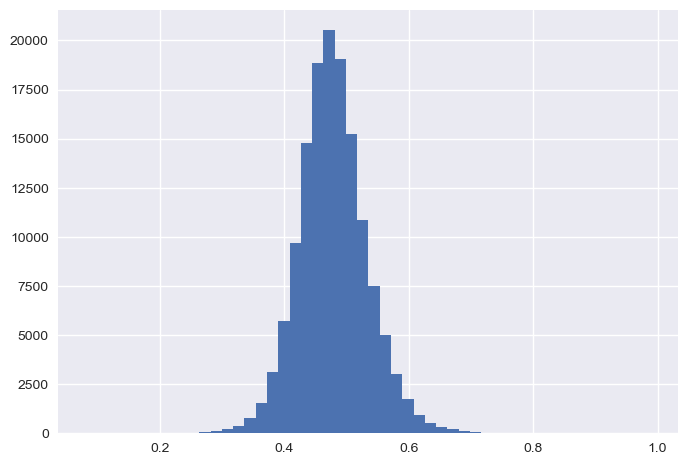

In [340]:
plt.hist(pred, bins = 50)
plt.show()

#### Out Sample Prediction and Backtesting

In [341]:
test_s = (test-mu)/std # standardization of test set features ( with train set parameters!!!)

In [342]:
model.evaluate(test_s[cols],test["dir"])

2265/2265 [==============================] - 11s 5ms/step - loss: 0.6975 - accuracy: 0.5121


[0.6974642872810364, 0.5121015906333923]

In [343]:
pred = model.predict(test_s[cols])

2265/2265 [==============================] - 4s 2ms/step


In [344]:
pred

array([[0.44716206],
       [0.4416459 ],
       [0.66360176],
       ...,
       [0.48025796],
       [0.47055134],
       [0.4784782 ]], dtype=float32)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 8.000e+00, 1.300e+01, 3.300e+01, 7.000e+01,
        1.080e+02, 1.980e+02, 3.570e+02, 7.310e+02, 1.160e+03, 2.252e+03,
        3.638e+03, 5.610e+03, 7.673e+03, 9.068e+03, 9.253e+03, 8.814e+03,
        7.160e+03, 5.360e+03, 3.828e+03, 2.636e+03, 1.744e+03, 1.063e+03,
        6.560e+02, 3.770e+02, 2.440e+02, 1.780e+02, 8.600e+01, 5.400e+01,
        3.400e+01, 1.500e+01, 8.000e+00, 7.000e+00, 6.000e+00, 6.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.11435646, 0.13040219, 0.14644793, 0.16249366, 0.1785394 ,
        0.19458513, 0.21063086, 0.2266766 , 0.24272233, 0.25876805,
        0.2748138 , 0.29085952, 0.30690527, 0.32295099, 0.33899674,
        0.35504246, 0.37108821, 0.38713393, 0.40317968, 0.41922539,
        0.43527114, 0.45131686, 0.46736261, 0.48340833, 0.49945408,
        0.51549983, 0.53154552, 0.54

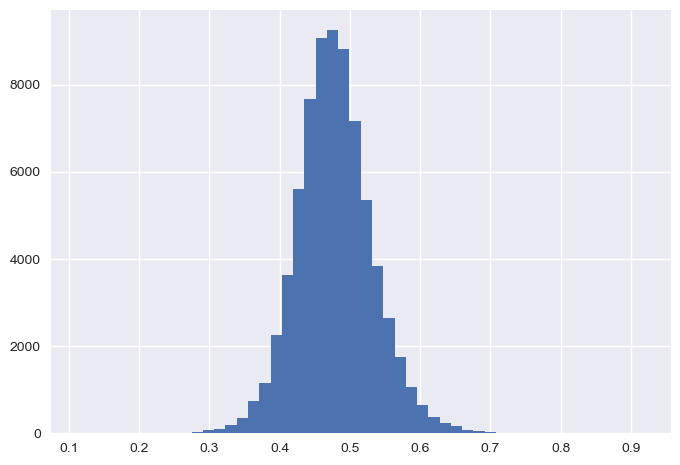

In [345]:
plt.hist(pred, bins = 50)

In [346]:
test["probability"] = model.predict(test_s[cols])
test["position"] = np.where(test.probability < 0.47, -1, np.nan) # short where probability is less then 0.47
test["position"] = np.where(test.probability > 0.53, 1, test.position) # long where position is > 0.53

2265/2265 [==============================] - 276s 122ms/step


In [347]:
test['NYTime'] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour

In [348]:
test["position"] = np.where(~test.hour.between(2,12),0, test.position) # neutral in non busy trading hours
test["position"] = test.position.ffill() # in all other cases the positions remains unchanged

test.position.value_counts(dropna = False)

0.0000     39716
-1.0000    23542
1.0000      9212
Name: position, dtype: int64

In [349]:
test["strategy"] = test["position"] * test["returns"]
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

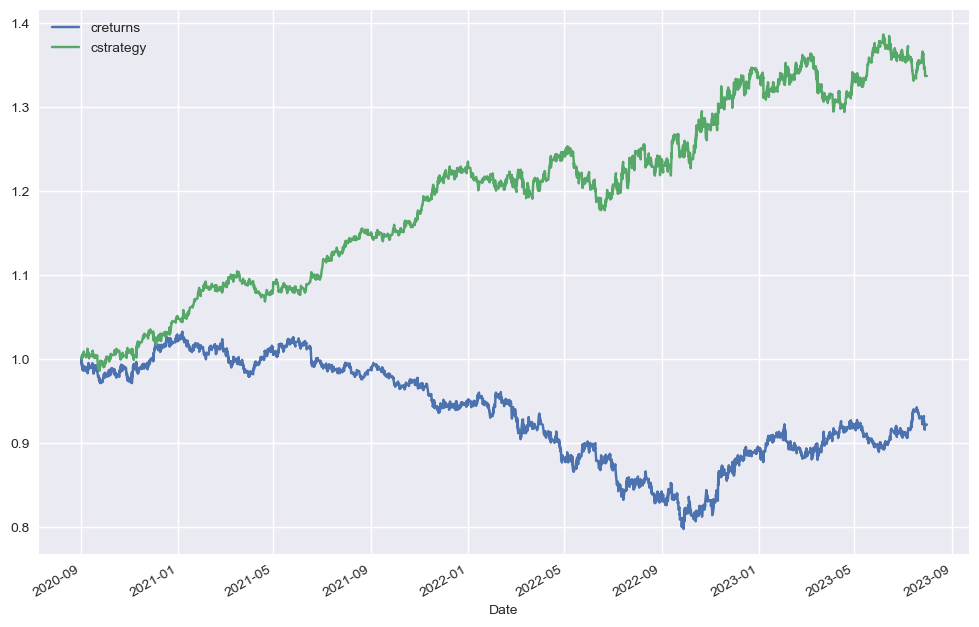

In [350]:
test[["creturns","cstrategy"]].plot(figsize = (12,8))
plt.show()

In [351]:
trading_cost = 0.000059
test["trades"] = test.position.diff().abs()
test.trades.value_counts()

0.0000    65403
2.0000     5555
1.0000     1511
Name: trades, dtype: int64

In [352]:
test["strategy_net"] = test.strategy - test.trades * trading_cost
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

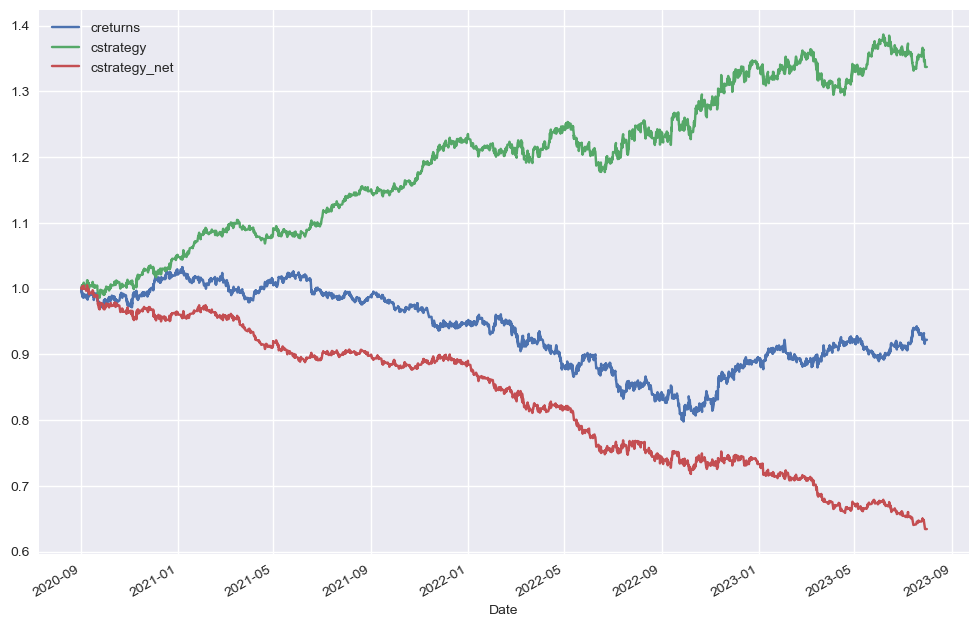

In [353]:
test[["creturns","cstrategy", "cstrategy_net"]].plot(figsize = (12,8))
plt.show()

In [354]:
model.save("DNN_Model")
params = {"mu": mu, "std":std}
pickle.dump(params, open("params.pkl","wb"))


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

INFO:tensorflow:Assets written to: DNN_Model/assets


INFO:tensorflow:Assets written to: DNN_Model/assets


### Working on Real time data using Simple Contrarium Strategy

In [355]:
class ConTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes are present here******************
        self.window = window
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** defining strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0:
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [356]:
trader = ConTrader(r"oanda.cfg", "EUR_USD", "1min", window = 1, units = 100000)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 100)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True)         
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

1 2 
----------------------------------------------------------------------------------------------------
2023-08-21T00:45:02.027882596Z | GOING LONG
2023-08-21T00:45:02.027882596Z | units = 100000.0 | price = 1.08816 | P&L = 197.4764 | Cum P&L = 197.4764
----------------------------------------------------------------------------------------------------

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 

V20Timeout: v20 REST request to https://stream-fxpractice.oanda.com:443/v3/accounts/101-004-26161627-001/pricing/stream?instruments=EUR_USD&snapshot=True has timed out (stream)

### Working on Real time data using Simple Moving Average

In [ ]:
class SMATrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, SMA_S, SMA_L,units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes are present here******************
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** defining strategy here ************************
        df["SMA_S"] = df[self.instrument].rolling(self.SMA_S).mean()
        df["SMA_L"] = df[self.instrument].rolling(self.SMA_L).mean()
        df["position"] = np.where(df["SMA_S"] > df["SMA_L"],1,-1)
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0:
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [ ]:
trader = SMATrader(r"oanda.cfg", "EUR_USD", "1min", SMA_S = 50, SMA_L = 200, units = 100000)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 200)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True)         
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

In [ ]:
trader.data

In [ ]:
trader.data.plot(figsize = (14,8), secondary_y = "position")
plt.show()

### Working on Real time data with Bollingers Band

In [ ]:
class BollingerTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, SMA, dev, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes are present here******************
        self.SMA = SMA
        self.dev = dev
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** defining strategy here ************************
        df["SMA"] = df[self.instrument].rolling(self.SMA).mean()
        df["Lower"] = df["SMA"] - df[self.instrument].rolling(self.SMA).std() * self.dev
        df["Upper"] = df["SMA"] + df[self.instrument].rolling(self.SMA).std() * self.dev 
        df["upper"] = df["SMA"] + df[self.instrument].rolling(self.SMA).std() * self.dev
        df["distance"] = df[self.instrument] - df.SMA
        df["position"] = np.where(df[self.instrument] < df.Lower, 1, np.nan)
        df['position'] = np.where(df[self.instrument] > df.Upper, -1, df["position"]) 
        df["position"] = np.where(df.distance * df.distance.shift(1) < 0, 0, df["position"])
        df["position"] = df.position.ffill().fillna(0)
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0:
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [ ]:
trader = BollingerTrader(r"oanda.cfg", "EUR_USD", "1min", SMA= 20, dev = 1, units = 100000)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 200)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True)         
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

In [ ]:
trader.data

In [ ]:
trader.data[["EUR_USD","SMA", "Lower","Upper"]].plot(figsize = (12,8))
plt.show()

In [ ]:
trader.data.tail(15)[["EUR_USD","SMA", "Lower","Upper"]].plot(figsize = (12,8))
plt.show()

### Machine learning Strategy on real time basis

In [ ]:
data = pd.read_csv("five_minute.csv", parse_dates = ["Date"], index_col = "Date")
data = data.drop(['Unnamed: 0'], axis=1)
data

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))
data.dropna(inplace = True)
data["direction"] = np.sign(data.returns)

In [ ]:
lags = 5
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
mlm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")
mlm

In [ ]:
mlm.fit(data[cols],data.direction)

In [ ]:
# in-sample predition

data["pred"] = mlm.predict(data[cols])
data

In [ ]:
hits = np.sign(data.direction * data.pred).value_counts()
hits
hit_ratio = hits[1.0]/sum(hits)
hit_ratio

above model is underfitted as the hit ratio is not that great but regardless of the underfitting we will use as an example

In [ ]:
# saving the model for real time use
pickle.dump(mlm, open("logreg.pkl","wb"))

In [ ]:
class MLTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, lags, model, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes are here******************
        self.lags = lags
        self.model = model
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ",flush=True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) # new with pd.concat()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** defining my strategy here ************************
        df = pd.concat([df, self.tick_data]) # new with pd.concat
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        cols = []
        for lag in range(1, self.lags + 1):
            col = "lag{}".format(lag)
            df[col] = df.returns.shift(lag)
            cols.append(col)
        df.dropna(inplace = True)
        df["position"] = self.model.predict(df[cols])
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")    

In [ ]:
mlm = pickle.load(open("logreg.pkl","rb"))

In [ ]:
trader = MLTrader('oanda.cfg',"EUR_USD", "5min", lags = 5, model = mlm, units = 100000)
trader.model

In [ ]:
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 300)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units, 
                                      suppress = True, ret = True)         
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

In [ ]:
trader.data.tail(10)

In [ ]:
trader.tick_data

In [ ]:
model = keras.models.load_model("DNN_model")
model

In [ ]:
params = pickle.load(open("params.pkl","rb"))
mu =params["mu"]
std = params["std"]

In [ ]:
class DNNTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, lags, model, mu, std, units):
        super().__init__(conf_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()
        self.raw_data = None
        self.data = None 
        self.last_bar = None
        self.units = units
        self.position = 0
        self.profits = []
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        self.lags = lags
        self.model = model
        self.mu = mu
        self.std = std
        #************************************************************************
    
    def get_most_recent(self, days = 5):
        while True:
            time.sleep(2)
            now = datetime.utcnow()
            now = now - timedelta(microseconds = now.microsecond)
            past = now - timedelta(days = days)
            df = self.get_history(instrument = self.instrument, start = past, end = now,
                                   granularity = "S5", price = "M", localize = False).c.dropna().to_frame()
            df.rename(columns = {"c":self.instrument}, inplace = True)
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()).tz_localize("UTC") - self.last_bar < self.bar_length:
                self.start_time = pd.to_datetime(datetime.utcnow()).tz_localize("UTC") # NEW -> Start Time of Trading Session
                break
                
    def on_success(self, time, bid, ask):
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(time)
        df = pd.DataFrame({self.instrument:(ask + bid)/2}, 
                          index = [recent_tick])
        self.tick_data = pd.concat([self.tick_data, df]) 
        
        if recent_tick - self.last_bar > self.bar_length:
            self.resample_and_join()
            self.define_strategy()
            self.execute_trades()
    
    def resample_and_join(self):
        self.raw_data = pd.concat([self.raw_data, self.tick_data.resample(self.bar_length, 
                                                                          label="right").last().ffill().iloc[:-1]])
        self.tick_data = self.tick_data.iloc[-1:]
        self.last_bar = self.raw_data.index[-1]
    
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        #create features
        df = df.append(self.tick_data) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["dir"] = np.where(df["returns"] > 0, 1, 0)
        df["sma"] = df[self.instrument].rolling(self.window).mean() - df[self.instrument].rolling(150).mean()
        df["boll"] = (df[self.instrument] - df[self.instrument].rolling(self.window).mean()) / df[self.instrument].rolling(self.window).std()
        df["min"] = df[self.instrument].rolling(self.window).min() / df[self.instrument] - 1
        df["max"] = df[self.instrument].rolling(self.window).max() / df[self.instrument] - 1
        df["mom"] = df["returns"].rolling(3).mean()
        df["vol"] = df["returns"].rolling(self.window).std()
        df.dropna(inplace = True)
        
        # create lags
        self.cols = []
        features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

        for f in features:
            for lag in range(1, self.lags + 1):
                col = "{}_lag_{}".format(f, lag)
                df[col] = df[f].shift(lag)
                self.cols.append(col)
        df.dropna(inplace = True)
        
        # standardization
        df_s = (df - self.mu) / self.std
        # predict
        df["proba"] = self.model.predict(df_s[self.cols])
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position"] = np.where(df.proba < 0.47, -1, np.nan)
        df["position"] = np.where(df.proba > 0.53, 1, df.position)
        df["position"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING LONG")
            elif self.position == -1:
                order = self.create_order(self.instrument, self.units * 2, suppress = True, ret = True) 
                self.report_trade(order, "GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units * 2, suppress = True, ret = True)
                self.report_trade(order, "GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = self.create_order(self.instrument, self.units, suppress = True, ret = True) 
                self.report_trade(order, "GOING NEUTRAL")
            elif self.position == 1:
                order = self.create_order(self.instrument, -self.units, suppress = True, ret = True)
                self.report_trade(order, "GOING NEUTRAL")
            self.position = 0
    
    def report_trade(self, order, going):
        time = order["time"]
        units = order["units"]
        price = order["price"]
        pl = float(order["pl"])
        self.profits.append(pl)
        cumpl = sum(self.profits)
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | P&L = {} | Cum P&L = {}".format(time, units, price, pl, cumpl))
        print(100 * "-" + "\n")  

In [ ]:
trader = DNNTrader("oanda.cfg", "EUR_USD", bar_length = "5min", window = 50, lags = 5, model = model,
                    mu = mu, std = std, units = 100000)
trader.get_most_recent()
trader.stream_data(trader.instrument, stop = 300)
if trader.position != 0:
    close_order = trader.create_order(trader.instrument, units = -trader.position * trader.units,
                                      suppress = True, ret = True) 
    trader.report_trade(close_order, "GOING NEUTRAL")
    trader.position = 0

In [ ]:
trader.data